#Drive Mount

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


#Libraries

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import seaborn as sns

In [7]:
from sklearn.svm import SVR

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.preprocessing import StandardScaler

#Loading data

In [11]:
df0 = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')

In [12]:
df0

iso_code continent  ... life_expectancy human_development_index
0          AUT    Europe  ...           81.54                   0.922
1          AUT    Europe  ...           81.54                   0.922
2          AUT    Europe  ...           81.54                   0.922
3          AUT    Europe  ...           81.54                   0.922
4          AUT    Europe  ...           81.54                   0.922
...        ...       ...  ...             ...                     ...
21181      ZWE    Africa  ...            1.70                   0.571
21182      ZWE    Africa  ...            1.70                   0.571
21183      ZWE    Africa  ...            1.70                   0.571
21184      ZWE    Africa  ...            1.70                   0.571
21185      ZWE    Africa  ...            1.70                   0.571

[21186 rows x 40 columns]

In [13]:
print(df0.dtypes)

iso_code                                object
continent                               object
location                                object
date                                    object
total_cases                            float64
new_cases                              float64
total_deaths                           float64
new_deaths                             float64
total_cases_per_million                float64
new_cases_per_million                  float64
total_deaths_per_million               float64
new_deaths_per_million                 float64
hosp_patients                          float64
hosp_patients_per_million              float64
new_tests                              float64
total_tests                            float64
total_tests_per_thousand               float64
new_tests_per_thousand                 float64
positive_rate                          float64
tests_per_case                         float64
total_vaccinations                     float64
people_vaccin

In [14]:
print(df0.nunique(axis=0).to_string())

iso_code                                  33
continent                                  4
location                                  33
date                                     667
total_cases                            18795
new_cases                               7373
total_deaths                           11031
new_deaths                              1292
total_cases_per_million                19725
new_cases_per_million                  15375
total_deaths_per_million               15850
new_deaths_per_million                  3961
hosp_patients                           5550
hosp_patients_per_million              11147
new_tests                              15773
total_tests                            17231
total_tests_per_thousand               16878
new_tests_per_thousand                  8019
positive_rate                            393
tests_per_case                          3381
total_vaccinations                      8890
people_vaccinated                       8529
people_ful

In [15]:
print(df0.isna().sum())

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                              126
new_cases                                129
total_deaths                            1014
new_deaths                              1014
total_cases_per_million                  126
new_cases_per_million                    129
total_deaths_per_million                1014
new_deaths_per_million                  1014
hosp_patients                           5776
hosp_patients_per_million               5776
new_tests                               2791
total_tests                             3904
total_tests_per_thousand                3904
new_tests_per_thousand                  2791
positive_rate                           2453
tests_per_case                          2474
total_vaccinations                     12271
people_vaccinated                      12620
people_ful

#Cleaning Data

In [16]:
date_start,date_end = [],[]
date = np.array(df0['date'], ndmin=1)
date_start = np.argwhere(date=='01/05/20')
date_end = np.argwhere(date=='01/10/21')
df1 = pd.DataFrame()
for i in range(len(date_start)):
  df1 = df1.append(df0.iloc[date_start[i][0]:date_end[i][0]+1],ignore_index=True)

In [17]:
df1

iso_code continent  ... life_expectancy human_development_index
0          AUT    Europe  ...           81.54                   0.922
1          AUT    Europe  ...           81.54                   0.922
2          AUT    Europe  ...           81.54                   0.922
3          AUT    Europe  ...           81.54                   0.922
4          AUT    Europe  ...           81.54                   0.922
...        ...       ...  ...             ...                     ...
17122      ZWE    Africa  ...            1.70                   0.571
17123      ZWE    Africa  ...            1.70                   0.571
17124      ZWE    Africa  ...            1.70                   0.571
17125      ZWE    Africa  ...            1.70                   0.571
17126      ZWE    Africa  ...            1.70                   0.571

[17127 rows x 40 columns]

In [18]:
print(df1.dtypes)

iso_code                                object
continent                               object
location                                object
date                                    object
total_cases                            float64
new_cases                              float64
total_deaths                           float64
new_deaths                             float64
total_cases_per_million                float64
new_cases_per_million                  float64
total_deaths_per_million               float64
new_deaths_per_million                 float64
hosp_patients                          float64
hosp_patients_per_million              float64
new_tests                              float64
total_tests                            float64
total_tests_per_thousand               float64
new_tests_per_thousand                 float64
positive_rate                          float64
tests_per_case                         float64
total_vaccinations                     float64
people_vaccin

In [19]:
print(df1.nunique(axis=0).to_string())

iso_code                                  33
continent                                  4
location                                  33
date                                     519
total_cases                            16148
new_cases                               6742
total_deaths                            9903
new_deaths                              1187
total_cases_per_million                16428
new_cases_per_million                  13272
total_deaths_per_million               13471
new_deaths_per_million                  3579
hosp_patients                           5058
hosp_patients_per_million               9705
new_tests                              13936
total_tests                            14684
total_tests_per_thousand               14598
new_tests_per_thousand                  7514
positive_rate                            381
tests_per_case                          3187
total_vaccinations                      7702
people_vaccinated                       7356
people_ful

In [20]:
print(df1.isna().sum())

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  1
total_deaths                               0
new_deaths                                 0
total_cases_per_million                    0
new_cases_per_million                      1
total_deaths_per_million                   0
new_deaths_per_million                     0
hosp_patients                           3898
hosp_patients_per_million               3898
new_tests                               1323
total_tests                             2436
total_tests_per_thousand                2436
new_tests_per_thousand                  1323
positive_rate                           1075
tests_per_case                          1075
total_vaccinations                      9401
people_vaccinated                       9737
people_ful

In [21]:
def blownan(df):
  for colname in df:
    if(df[colname].isna().sum()>0):
      nanarr=np.array(df[colname].isna(),ndmin=1)
      nanidx=np.argwhere(nanarr==True)		            #Column vector
      allidx=np.arange(0,df.shape[0]).T             #Row vector without transpose
      nidx=np.delete(allidx,nanidx)
      for i in range(1,len(nidx)):
        if((nidx[i]-nidx[i-1]!=1) and (df['iso_code'][nidx[i]]==df['iso_code'][nidx[i-1]])):
          df[colname][nidx[i-1]+1:nidx[i]]=0.5*(df[colname][nidx[i-1]]+df[colname][nidx[i]])
  return df

df2=blownan(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [22]:
df2

iso_code continent  ... life_expectancy human_development_index
0          AUT    Europe  ...           81.54                   0.922
1          AUT    Europe  ...           81.54                   0.922
2          AUT    Europe  ...           81.54                   0.922
3          AUT    Europe  ...           81.54                   0.922
4          AUT    Europe  ...           81.54                   0.922
...        ...       ...  ...             ...                     ...
17122      ZWE    Africa  ...            1.70                   0.571
17123      ZWE    Africa  ...            1.70                   0.571
17124      ZWE    Africa  ...            1.70                   0.571
17125      ZWE    Africa  ...            1.70                   0.571
17126      ZWE    Africa  ...            1.70                   0.571

[17127 rows x 40 columns]

#EDA

In [23]:
print('Number of records =',df2.shape[0])
print('Number of variables =',df2.shape[1])

Number of records = 17127
Number of variables = 40


In [24]:
print(df2.dtypes)

iso_code                                object
continent                               object
location                                object
date                                    object
total_cases                            float64
new_cases                              float64
total_deaths                           float64
new_deaths                             float64
total_cases_per_million                float64
new_cases_per_million                  float64
total_deaths_per_million               float64
new_deaths_per_million                 float64
hosp_patients                          float64
hosp_patients_per_million              float64
new_tests                              float64
total_tests                            float64
total_tests_per_thousand               float64
new_tests_per_thousand                 float64
positive_rate                          float64
tests_per_case                         float64
total_vaccinations                     float64
people_vaccin

In [25]:
print(df2.nunique(axis=0).to_string())

iso_code                                  33
continent                                  4
location                                  33
date                                     519
total_cases                            16148
new_cases                               6743
total_deaths                            9903
new_deaths                              1187
total_cases_per_million                16428
new_cases_per_million                  13273
total_deaths_per_million               13471
new_deaths_per_million                  3579
hosp_patients                           5101
hosp_patients_per_million               9782
new_tests                              14026
total_tests                            14930
total_tests_per_thousand               14842
new_tests_per_thousand                  7579
positive_rate                            432
tests_per_case                          3231
total_vaccinations                      8141
people_vaccinated                       7800
people_ful

In [26]:
print(df2.isna().sum())

iso_code                                  0
continent                                 0
location                                  0
date                                      0
total_cases                               0
new_cases                                 0
total_deaths                              0
new_deaths                                0
total_cases_per_million                   0
new_cases_per_million                     0
total_deaths_per_million                  0
new_deaths_per_million                    0
hosp_patients                          3708
hosp_patients_per_million              3708
new_tests                               993
total_tests                            1678
total_tests_per_thousand               1678
new_tests_per_thousand                  993
positive_rate                           630
tests_per_case                          630
total_vaccinations                     8206
people_vaccinated                      8313
people_fully_vaccinated         

In [27]:
dtype = {}
for i in range(df2.shape[1]):
  if(i in [0,1,2]):
    dtype[df2.columns[i]] = 'Categorical'
  elif(i==3):
    dtype[df2.columns[i]] = 'Temporal'
  elif(i in [4,5,6,7,12,14,15,19,20,21,22,23,28]):
    dtype[df2.columns[i]] = 'Numerical (Discrete)'
  else:
    dtype[df2.columns[i]] = 'Numerical (Continuous)'

print("{:<40}{:<40}".format('VARIABLE','DATA TYPE'))
for key,value in dtype.items():
  print("{:<40}{:<40}".format(key,value))

VARIABLE                                DATA TYPE                               
iso_code                                Categorical                             
continent                               Categorical                             
location                                Categorical                             
date                                    Temporal                                
total_cases                             Numerical (Discrete)                    
new_cases                               Numerical (Discrete)                    
total_deaths                            Numerical (Discrete)                    
new_deaths                              Numerical (Discrete)                    
total_cases_per_million                 Numerical (Continuous)                  
new_cases_per_million                   Numerical (Continuous)                  
total_deaths_per_million                Numerical (Continuous)                  
new_deaths_per_million      

##Discrete Variables

###Histogram

In [28]:
def getkey(dic,val):
  keylist = []
  for key,value in dic.items():
    if(value==val):
      keylist.append(key)
  return keylist

discrete = getkey(dtype, 'Numerical (Discrete)')

In [29]:
print('Discrete numerical variables are :',discrete)

Discrete numerical variables are : ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'hosp_patients', 'new_tests', 'total_tests', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'population']


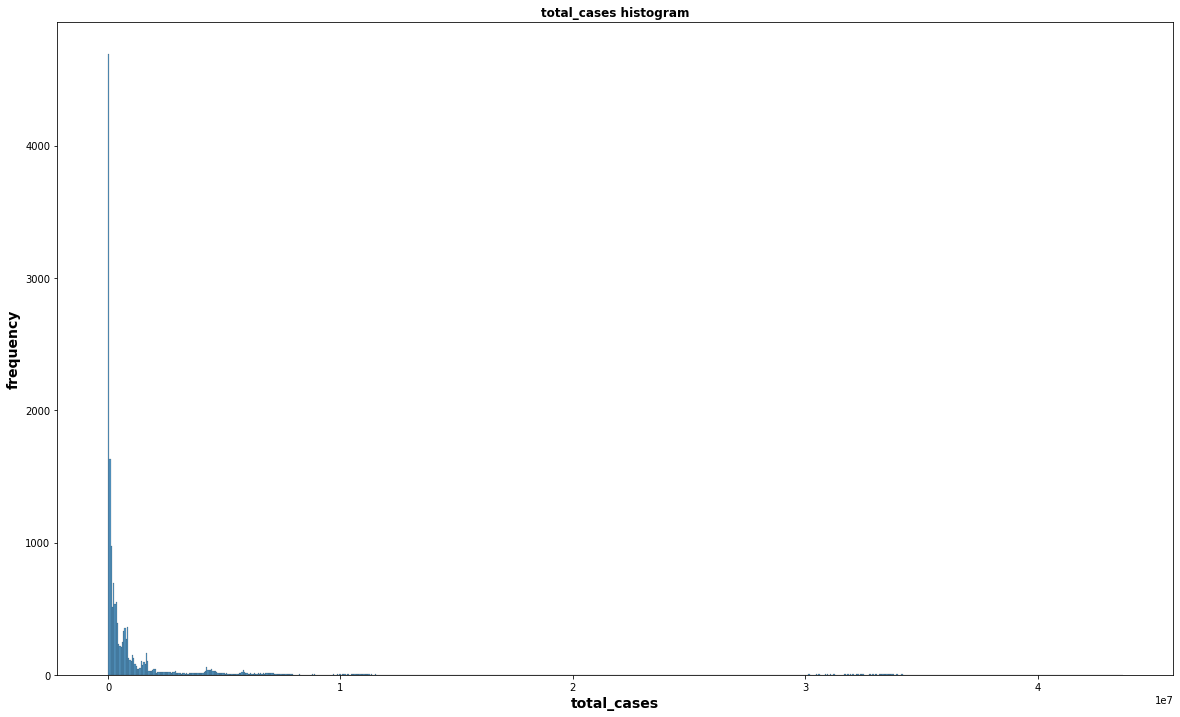

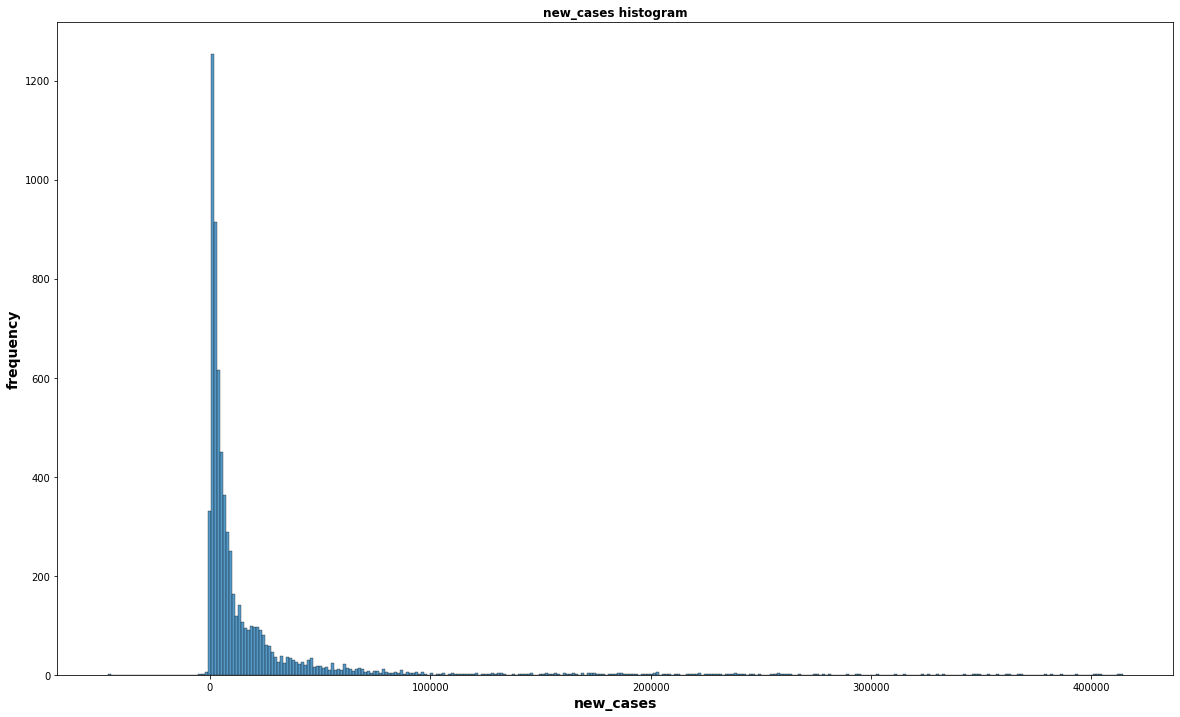

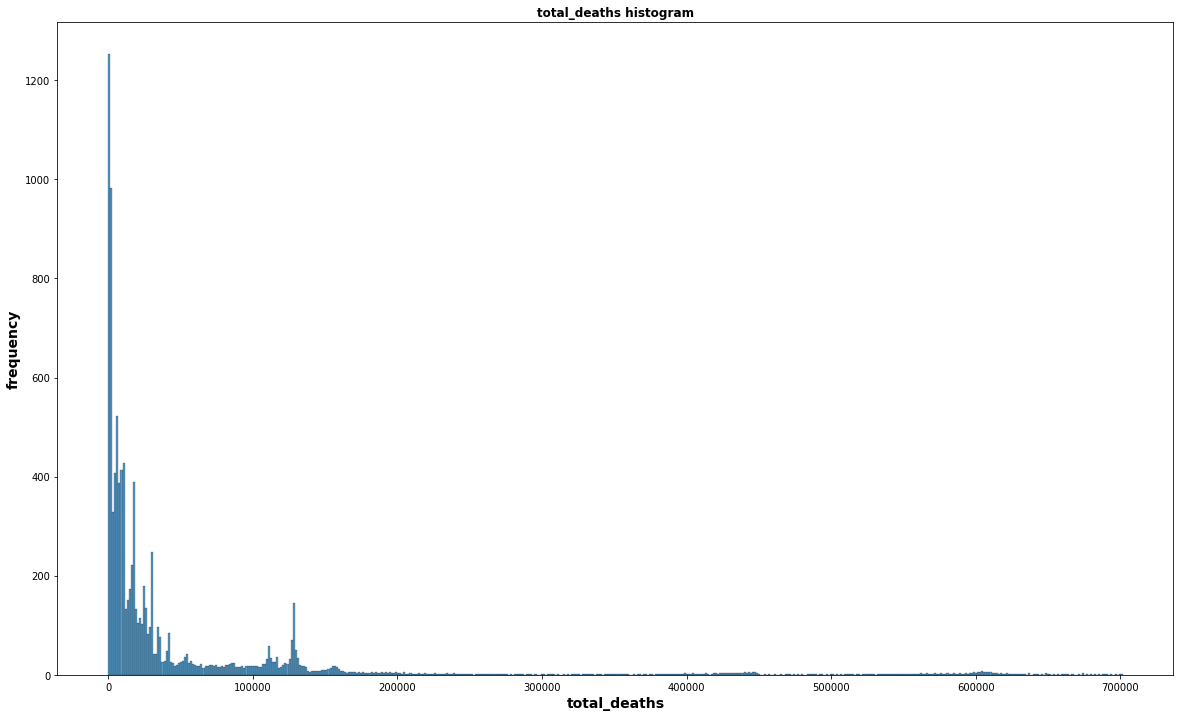

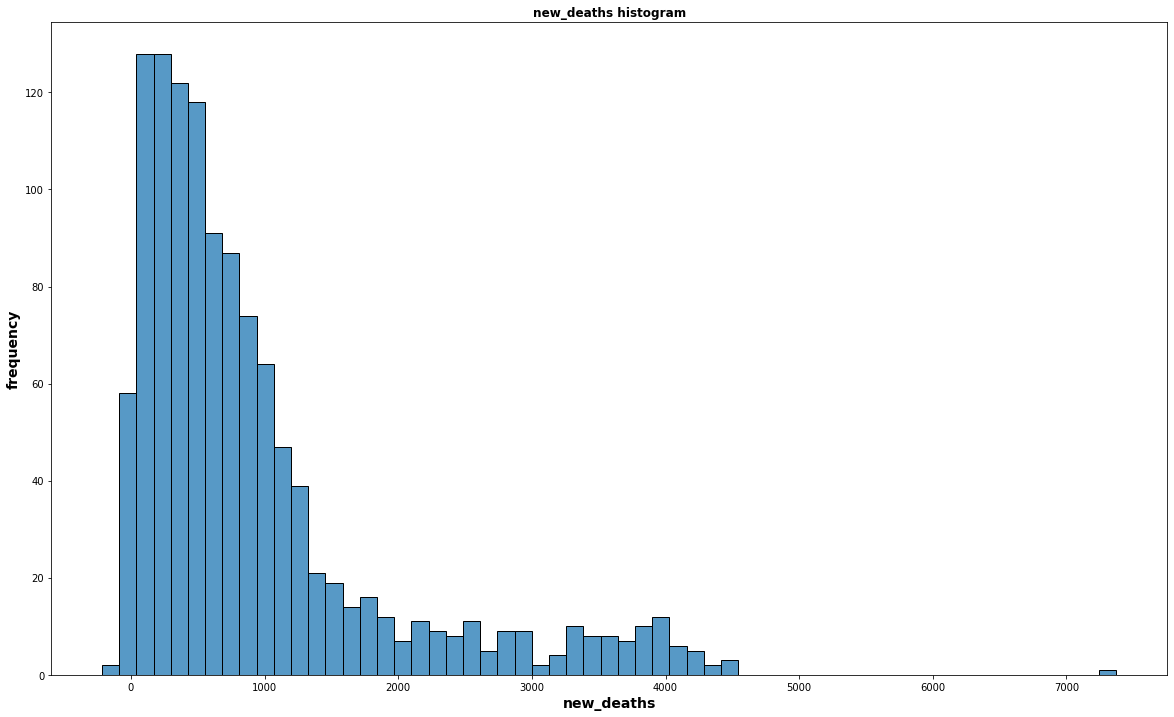

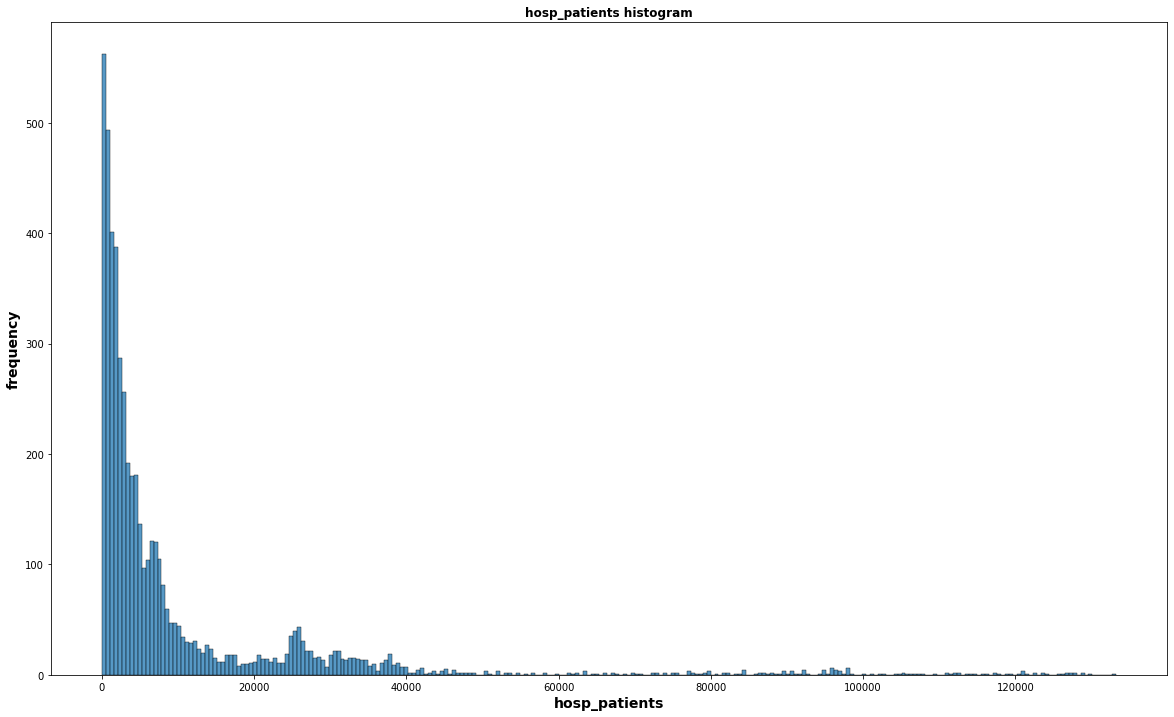

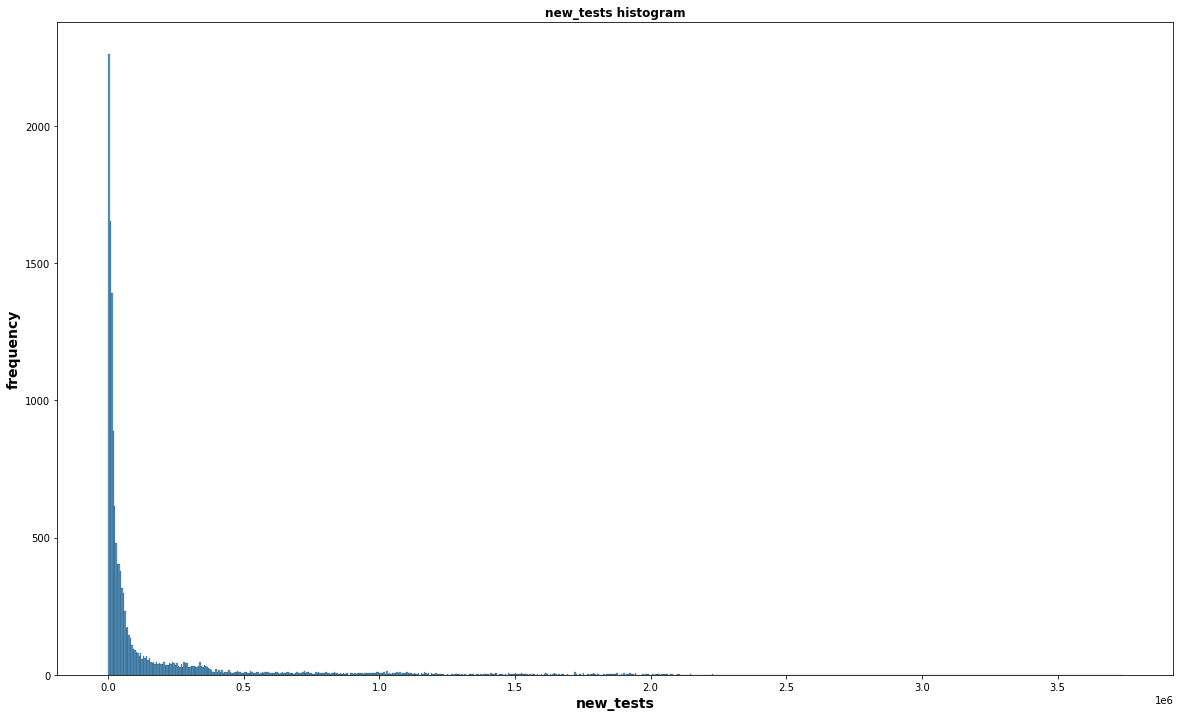

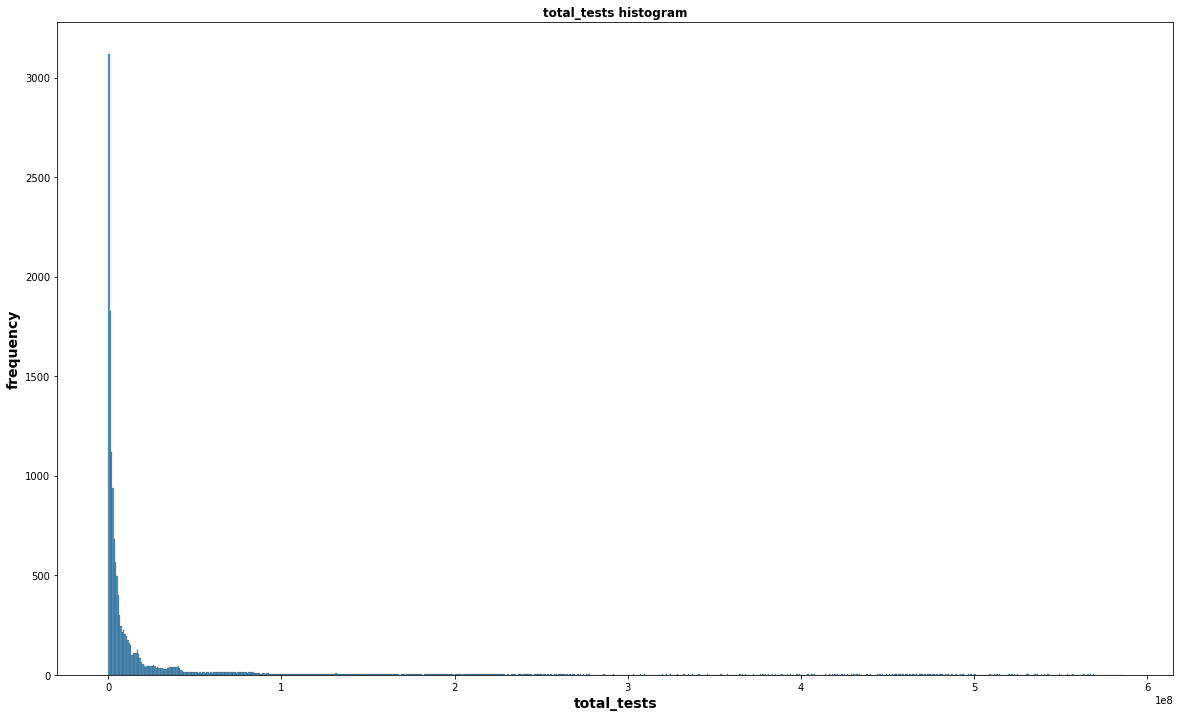

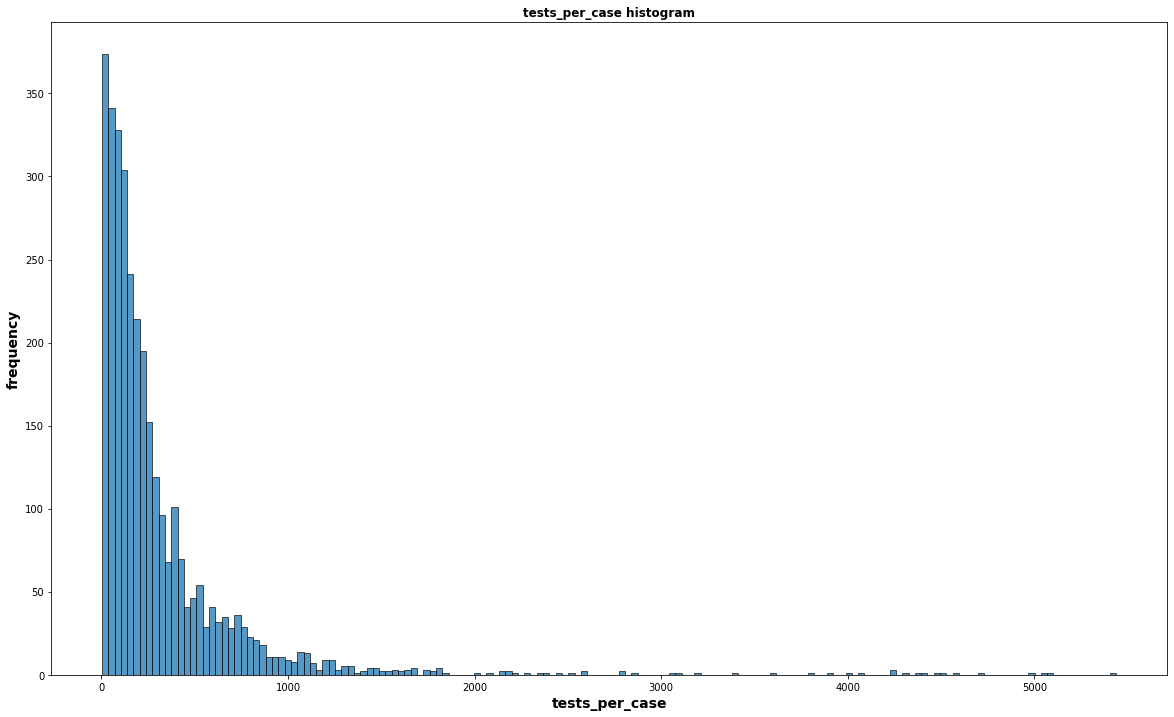

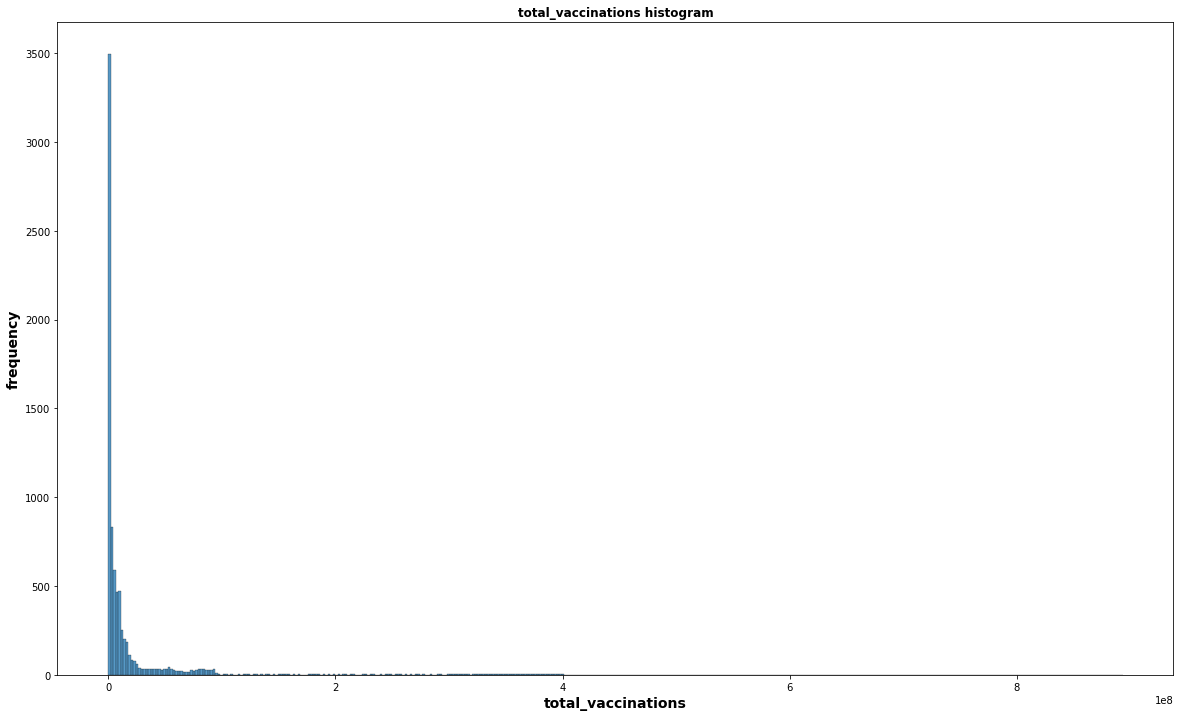

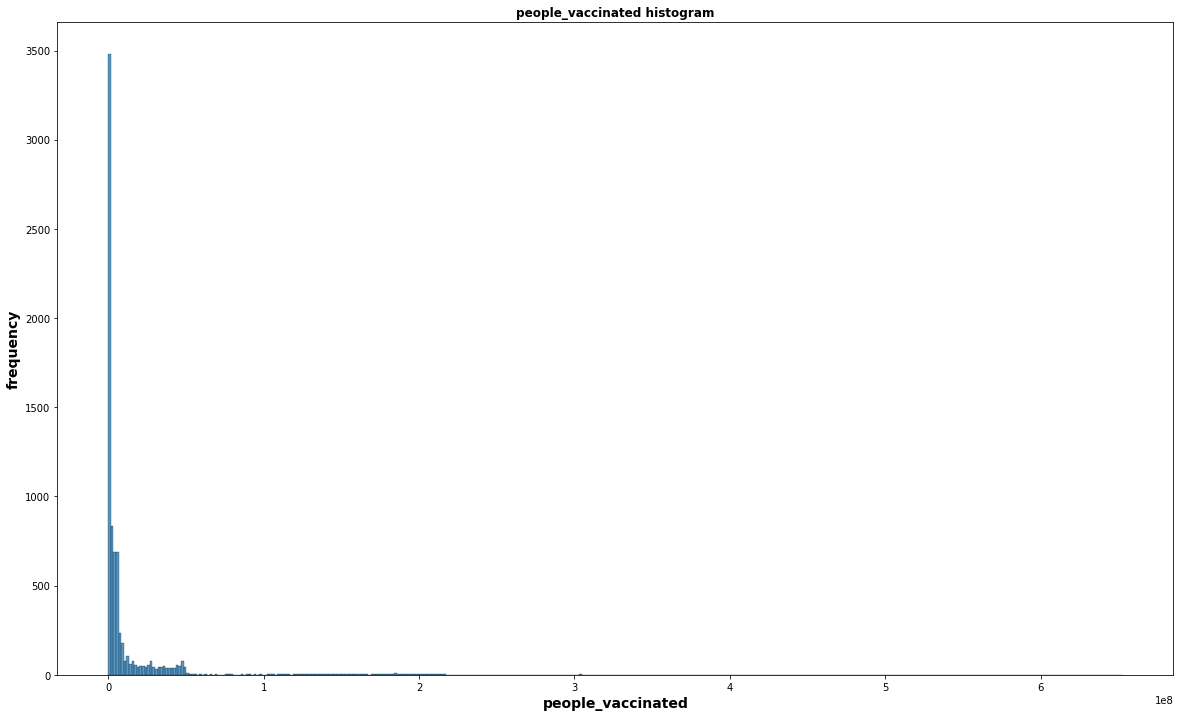

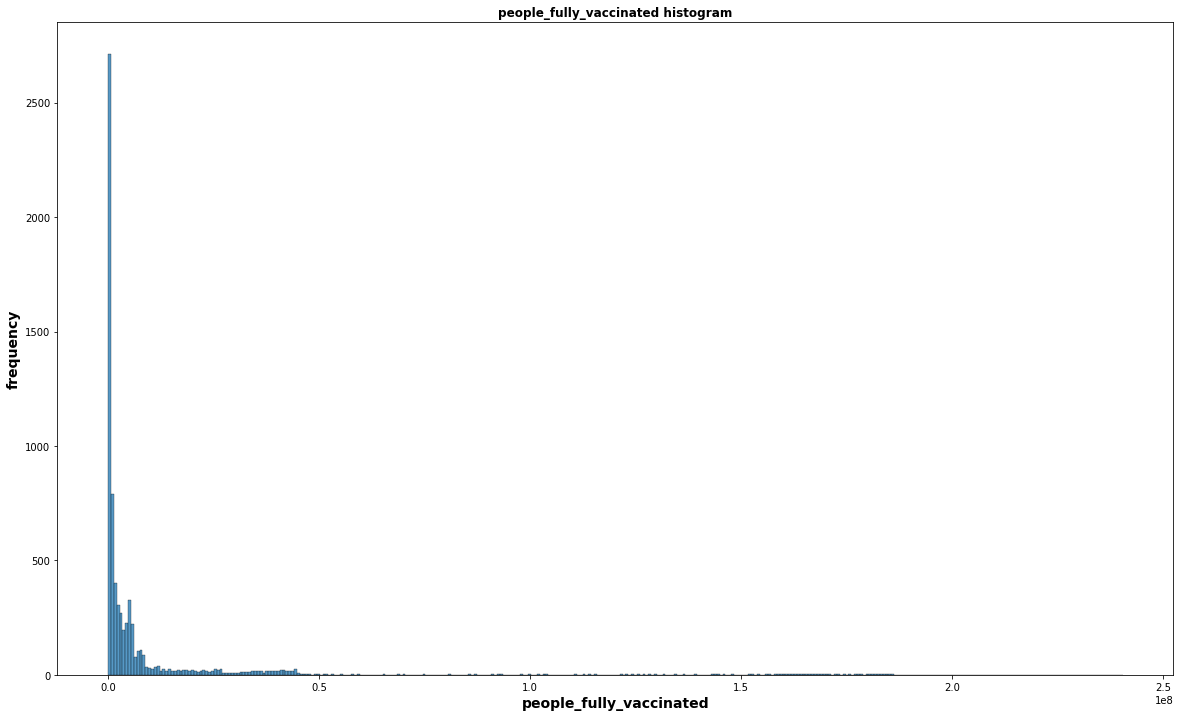

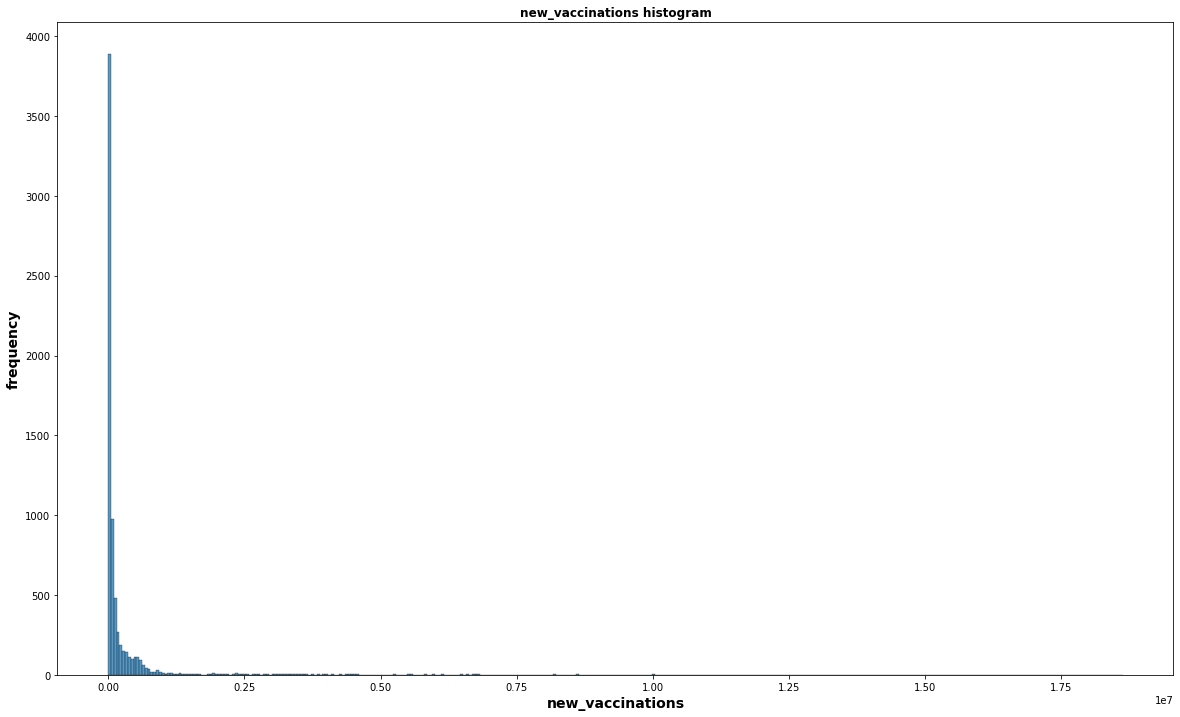

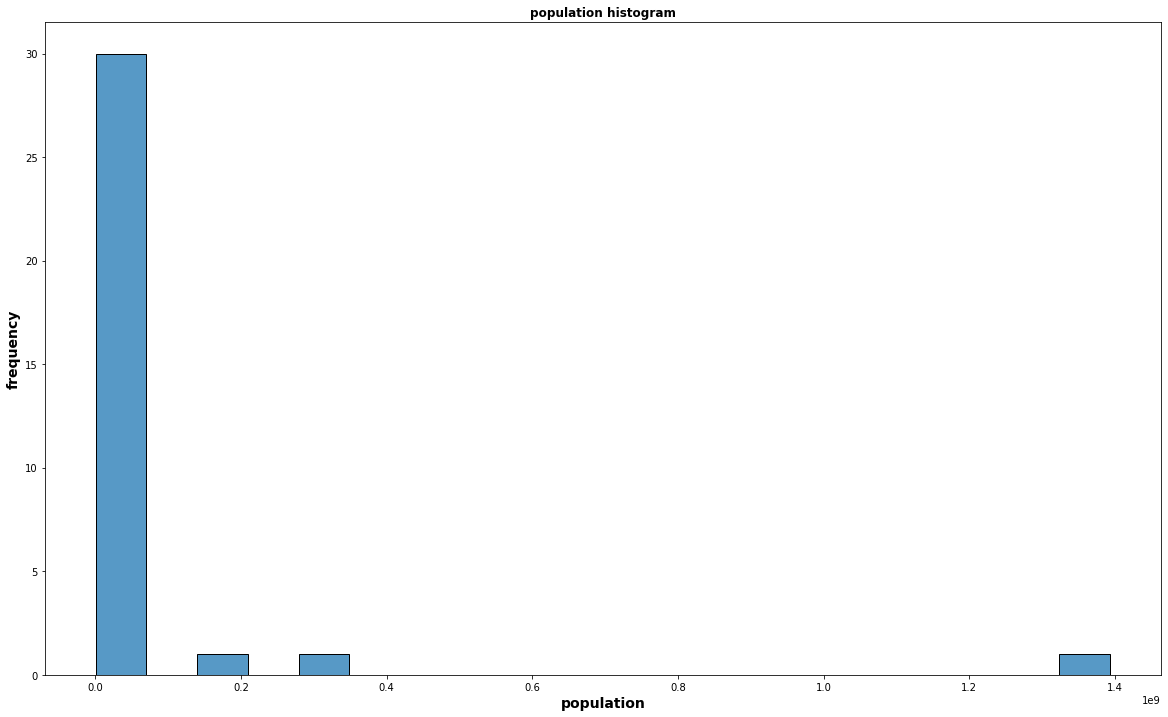

In [30]:
for var in discrete:
  unique_val = df2[var].unique()
  plt.subplots(figsize=(20,12))
  sns.histplot(data=unique_val,bins=max(df2[var].nunique()//20,20))
  plt.xlabel(var,size=14,fontweight='bold')
  plt.ylabel('frequency',size=14,fontweight='bold')
  plt.title(var+' histogram',fontweight='bold')
  plt.show()

###Mode for each variable

In [31]:
for var in discrete:
  print(f'Mode of {var} is\n',df2[var].mode(),'\n\n',sep='')

Mode of total_cases is
0    674.0
dtype: float64


Mode of new_cases is
0    0.0
dtype: float64


Mode of total_deaths is
0    9.0
dtype: float64


Mode of new_deaths is
0    0.0
dtype: float64


Mode of hosp_patients is
0    4.0
dtype: float64


Mode of new_tests is
0    22671.0
dtype: float64


Mode of total_tests is
0       253175.0
1       284021.5
2       314783.0
3       346136.5
4       392550.0
         ...    
69    12607220.0
70    12755156.0
71    12914906.5
72    13079117.5
73    13230221.5
Length: 74, dtype: float64


Mode of tests_per_case is
0    20.8
dtype: float64


Mode of total_vaccinations is
0    10680525.0
dtype: float64


Mode of people_vaccinated is
0    6200428.0
dtype: float64


Mode of people_fully_vaccinated is
0    5083235.0
dtype: float64


Mode of new_vaccinations is
0    30846.5
dtype: float64


Mode of population is
0         516100
1         634814
2         896005
3        1325188
4        1866934
5        4081657
6        4982904
7        5548361
8  

###Entropy of discrete variables

In [32]:
for var in discrete:
  frequency = df2[var].dropna().value_counts()
  n = sum(frequency)
  entropy = sum(-frequency*np.log(frequency/n)/n)
  print(f'Entropy of {var} is',entropy,'\n')

Entropy of total_cases is 9.654904803738294 

Entropy of new_cases is 7.979505274663202 

Entropy of total_deaths is 8.765173307337523 

Entropy of new_deaths is 4.440728427769255 

Entropy of hosp_patients is 7.837504926314709 

Entropy of new_tests is 9.466365939781465 

Entropy of total_tests is 9.578765042818395 

Entropy of tests_per_case is 7.241268913188358 

Entropy of total_vaccinations is 8.866204977936537 

Entropy of people_vaccinated is 8.791235029218342 

Entropy of people_fully_vaccinated is 8.675496846888315 

Entropy of new_vaccinations is 8.764872354997673 

Entropy of population is 3.4965075614664793 



##Continuous Variables

In [33]:
def getkey(dic,val):
  keylist = []
  for key,value in dic.items():
    if(value==val):
      keylist.append(key)
  return keylist

continuous = getkey(dtype,'Numerical (Continuous)')

In [34]:
print('Continuous numerical variables are :',continuous)

Continuous numerical variables are : ['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'hosp_patients_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']


###Mean

In [35]:
for var in continuous:
  print(f'Mean of {var} is',df2[var].mean(),'\n')                   #NaN values are skipped

Mean of total_cases_per_million is 36415.27843422658 

Mean of new_cases_per_million is 160.32827515034853 

Mean of total_deaths_per_million is 664.1080665615739 

Mean of new_deaths_per_million is 2.2951898172476017 

Mean of hosp_patients_per_million is 153.4509056934192 

Mean of total_tests_per_thousand is 936.3546040520407 

Mean of new_tests_per_thousand is 5.135342382546159 

Mean of positive_rate is 0.053998363338787825 

Mean of total_vaccinations_per_hundred is 52.87103912117488 

Mean of people_vaccinated_per_hundred is 31.38856591785799 

Mean of people_fully_vaccinated_per_hundred is 23.225148052586476 

Mean of stringency_index is 57.69189875634878 

Mean of population_density is 199.31666666665942 

Mean of median_age is 39.49090909091275 

Mean of aged_65_older is 15.706121212121074 

Mean of gdp_per_capita is 35998.04193939221 

Mean of cardiovasc_death_rate is 198.43096969696512 

Mean of diabetes_prevalence is 7.060606060605349 

Mean of female_smokers is 19.0060606

###Variance

In [36]:
for var in continuous:
  print(f'Variance of {var} is',df2[var].var(),'\n')                    #NaN values are skipped

Variance of total_cases_per_million is 1419802416.8450813 

Variance of new_cases_per_million is 55977.629079989994 

Variance of total_deaths_per_million is 494600.8873842588 

Variance of new_deaths_per_million is 15.662263319624257 

Variance of hosp_patients_per_million is 43922.155577680736 

Variance of total_tests_per_thousand is 2715842.6654670457 

Variance of new_tests_per_thousand is 92.30133881049287 

Variance of positive_rate is 0.00401389870003694 

Variance of total_vaccinations_per_hundred is 2361.3156426532746 

Variance of people_vaccinated_per_hundred is 665.5305088021352 

Variance of people_fully_vaccinated_per_hundred is 548.5713826365925 

Variance of stringency_index is 227.78432770362923 

Variance of population_density is 70777.10858338216 

Variance of median_age is 37.79818489697023 

Variance of aged_65_older is 31.971730184184338 

Variance of gdp_per_capita is 348155181.39319915 

Variance of cardiovasc_death_rate is 10830.406986154683 

Variance of diab

###Skew

In [37]:
for var in continuous:
  print(f'Skewness value of {var} is',df2[var].skew(),'\n')

Skewness value of total_cases_per_million is 0.9115567457793395 

Skewness value of new_cases_per_million is 3.080166398496144 

Skewness value of total_deaths_per_million is 1.2861209069082162 

Skewness value of new_deaths_per_million is 3.2325128855330734 

Skewness value of hosp_patients_per_million is 2.5873157358967935 

Skewness value of total_tests_per_thousand is 3.822976415452226 

Skewness value of new_tests_per_thousand is 6.262252089210557 

Skewness value of positive_rate is 2.2263082260603815 

Skewness value of total_vaccinations_per_hundred is 0.6069747063167453 

Skewness value of people_vaccinated_per_hundred is 0.3290177922460943 

Skewness value of people_fully_vaccinated_per_hundred is 0.7395570480931742 

Skewness value of stringency_index is 0.015086546971013946 

Skewness value of population_density is 3.24017119522162 

Skewness value of median_age is -1.470226704054588 

Skewness value of aged_65_older is -1.145119951357442 

Skewness value of gdp_per_capita 

In [38]:
posskew,negskew,nullskew = [],[],[]
for var in continuous:
  if(df2[var].skew()>0):
    posskew.append(var)
  elif(df2[var].skew()<0):
    negskew.append(var)
  else:
    zeroskew.append(var)

if(len(posskew)>0):
  print('The continuous numerical variables with positive skew are :',posskew)
if(len(negskew)>0):
  print('The continuous numerical variables with negative skew are :',negskew)
if(len(nullskew)>0):
  print('The continuous numerical variables with zero skew are :',zeroskew)

The continuous numerical variables with positive skew are : ['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'hosp_patients_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'positive_rate', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'stringency_index', 'population_density', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'male_smokers', 'hospital_beds_per_thousand']
The continuous numerical variables with negative skew are : ['median_age', 'aged_65_older', 'female_smokers', 'life_expectancy', 'human_development_index']


###Minimum

In [39]:
for var in continuous:
  print(f'The minimum value of {var} is',df2[var].min(),'\n')

The minimum value of total_cases_per_million is 2.253 

The minimum value of new_cases_per_million is -2123.4570000000003 

The minimum value of total_deaths_per_million is 0.265 

The minimum value of new_deaths_per_million is -10.058 

The minimum value of hosp_patients_per_million is 0.0 

The minimum value of total_tests_per_thousand is 0.28800000000000003 

The minimum value of new_tests_per_thousand is 0.006 

The minimum value of positive_rate is 0.0 

The minimum value of total_vaccinations_per_hundred is 0.0 

The minimum value of people_vaccinated_per_hundred is 0.0 

The minimum value of people_fully_vaccinated_per_hundred is 0.0 

The minimum value of stringency_index is 19.44 

The minimum value of population_density is 4.037 

The minimum value of median_age is 19.6 

The minimum value of aged_65_older is 1.1440000000000001 

The minimum value of gdp_per_capita is 1899.775 

The minimum value of cardiovasc_death_rate is 85.99799999999999 

The minimum value of diabetes_pr

###Maximum

In [40]:
for var in continuous:
  print(f'The maximum value of {var} is',df2[var].max(),'\n')

The maximum value of total_cases_per_million is 157807.23 

The maximum value of new_cases_per_million is 3197.292 

The maximum value of total_deaths_per_million is 3134.575 

The maximum value of new_deaths_per_million is 46.653 

The maximum value of hosp_patients_per_million is 1544.082 

The maximum value of total_tests_per_thousand is 14858.294 

The maximum value of new_tests_per_thousand is 325.76 

The maximum value of positive_rate is 0.406 

The maximum value of total_vaccinations_per_hundred is 201.39 

The maximum value of people_vaccinated_per_hundred is 93.35 

The maximum value of people_fully_vaccinated_per_hundred is 85.34 

The maximum value of stringency_index is 96.3 

The maximum value of population_density is 1454.037 

The maximum value of median_age is 47.9 

The maximum value of aged_65_older is 23.021 

The maximum value of gdp_per_capita is 94277.965 

The maximum value of cardiovasc_death_rate is 439.415 

The maximum value of diabetes_prevalence is 17.26 


###Median

In [41]:
for var in continuous:
  print(f'The median of {var} is',df2[var].median(),'\n')

The median of total_cases_per_million is 21782.903 

The median of new_cases_per_million is 68.00399999999999 

The median of total_deaths_per_million is 421.963 

The median of new_deaths_per_million is 0.6509999999999999 

The median of hosp_patients_per_million is 72.52199999999999 

The median of total_tests_per_thousand is 378.3995 

The median of new_tests_per_thousand is 2.3055000000000003 

The median of positive_rate is 0.032 

The median of total_vaccinations_per_hundred is 36.58 

The median of people_vaccinated_per_hundred is 27.225 

The median of people_fully_vaccinated_per_hundred is 12.63 

The median of stringency_index is 56.48 

The median of population_density is 112.37100000000001 

The median of median_age is 41.8 

The median of aged_65_older is 18.517 

The median of gdp_per_capita is 35220.084 

The median of cardiovasc_death_rate is 151.089 

The median of diabetes_prevalence is 6.18 

The median of female_smokers is 20.0 

The median of male_smokers is 30.9 


###25th percentile

In [42]:
for var in continuous:
  print(f'The 25th percentile of {var} is',df2[var].quantile(0.25),'\n')

The 25th percentile of total_cases_per_million is 3859.4525000000003 

The 25th percentile of new_cases_per_million is 14.975 

The 25th percentile of total_deaths_per_million is 89.221 

The 25th percentile of new_deaths_per_million is 0.09300000000000001 

The 25th percentile of hosp_patients_per_million is 22.646 

The 25th percentile of total_tests_per_thousand is 110.456 

The 25th percentile of new_tests_per_thousand is 0.91 

The 25th percentile of positive_rate is 0.012 

The 25th percentile of total_vaccinations_per_hundred is 7.800000000000001 

The 25th percentile of people_vaccinated_per_hundred is 5.8725 

The 25th percentile of people_fully_vaccinated_per_hundred is 2.7649999999999997 

The 25th percentile of stringency_index is 47.22 

The 25th percentile of population_density is 46.754 

The 25th percentile of median_age is 38.3 

The 25th percentile of aged_65_older is 13.914000000000001 

The 25th percentile of gdp_per_capita is 25063.846 

The 25th percentile of card

###75th percentile

In [43]:
for var in continuous:
  print(f'The 75th percentile of {var} is',df2[var].quantile(0.75),'\n')

The 75th percentile of total_cases_per_million is 64375.2285 

The 75th percentile of new_cases_per_million is 207.2705 

The 75th percentile of total_deaths_per_million is 1030.045 

The 75th percentile of new_deaths_per_million is 2.7539999999999996 

The 75th percentile of hosp_patients_per_million is 192.238 

The 75th percentile of total_tests_per_thousand is 1006.913 

The 75th percentile of new_tests_per_thousand is 4.612 

The 75th percentile of positive_rate is 0.07 

The 75th percentile of total_vaccinations_per_hundred is 95.33 

The 75th percentile of people_vaccinated_per_hundred is 55.857499999999995 

The 75th percentile of people_fully_vaccinated_per_hundred is 43.195 

The 75th percentile of stringency_index is 69.44 

The 75th percentile of population_density is 231.447 

The 75th percentile of median_age is 43.3 

The 75th percentile of aged_65_older is 19.677 

The 75th percentile of gdp_per_capita is 45436.685999999994 

The 75th percentile of cardiovasc_death_rate

###Inter-quartile range

In [44]:
for var in continuous:
  print(f'The inter-quartile range of {var} is',df2[var].quantile(0.75)-df2[var].quantile(0.25),'\n')

The inter-quartile range of total_cases_per_million is 60515.776 

The inter-quartile range of new_cases_per_million is 192.2955 

The inter-quartile range of total_deaths_per_million is 940.8240000000001 

The inter-quartile range of new_deaths_per_million is 2.6609999999999996 

The inter-quartile range of hosp_patients_per_million is 169.59199999999998 

The inter-quartile range of total_tests_per_thousand is 896.457 

The inter-quartile range of new_tests_per_thousand is 3.702 

The inter-quartile range of positive_rate is 0.05800000000000001 

The inter-quartile range of total_vaccinations_per_hundred is 87.53 

The inter-quartile range of people_vaccinated_per_hundred is 49.98499999999999 

The inter-quartile range of people_fully_vaccinated_per_hundred is 40.43 

The inter-quartile range of stringency_index is 22.22 

The inter-quartile range of population_density is 184.693 

The inter-quartile range of median_age is 5.0 

The inter-quartile range of aged_65_older is 5.76299999

###Above quantities together:

In [45]:
for var in continuous:
  print('Variable :',var)
  print('\tMean :',df2[var].mean())
  print('\tVariance :',df2[var].var())
  print('\tSkew :',df2[var].skew())
  print('\tMinimum :',df2[var].min())
  print('\tMaximum :',df2[var].max())
  print('\tMedian :',df2[var].median())
  print('\t25th percentile :',df2[var].quantile(0.25))
  print('\t75th percentile :',df2[var].quantile(0.75))
  print('\tInter-quartile range :',df2[var].quantile(0.75)-df2[var].quantile(0.25))
  print('\n')

Variable : total_cases_per_million
	Mean : 36415.27843422658
	Variance : 1419802416.8450813
	Skew : 0.9115567457793395
	Minimum : 2.253
	Maximum : 157807.23
	Median : 21782.903
	25th percentile : 3859.4525000000003
	75th percentile : 64375.2285
	Inter-quartile range : 60515.776


Variable : new_cases_per_million
	Mean : 160.32827515034853
	Variance : 55977.629079989994
	Skew : 3.080166398496144
	Minimum : -2123.4570000000003
	Maximum : 3197.292
	Median : 68.00399999999999
	25th percentile : 14.975
	75th percentile : 207.2705
	Inter-quartile range : 192.2955


Variable : total_deaths_per_million
	Mean : 664.1080665615739
	Variance : 494600.8873842588
	Skew : 1.2861209069082162
	Minimum : 0.265
	Maximum : 3134.575
	Median : 421.963
	25th percentile : 89.221
	75th percentile : 1030.045
	Inter-quartile range : 940.8240000000001


Variable : new_deaths_per_million
	Mean : 2.2951898172476017
	Variance : 15.662263319624257
	Skew : 3.2325128855330734
	Minimum : -10.058
	Maximum : 46.653
	Media

###Box-and-whiskers plots

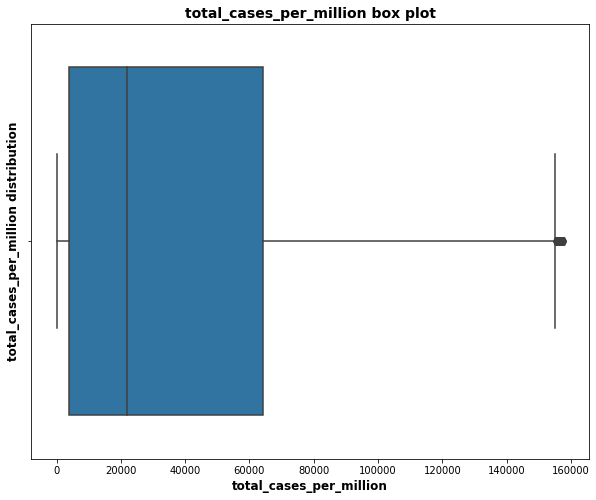

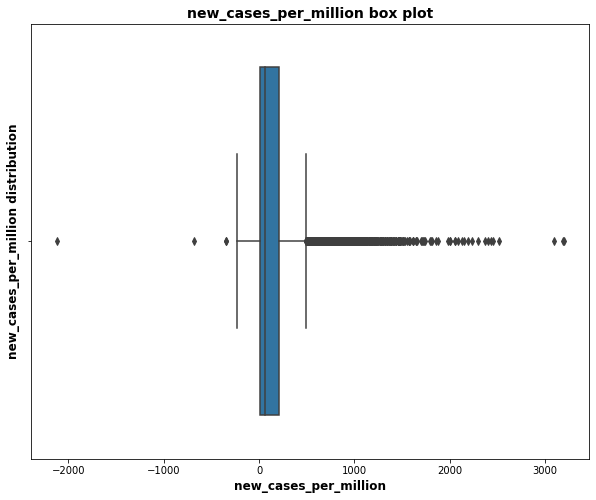

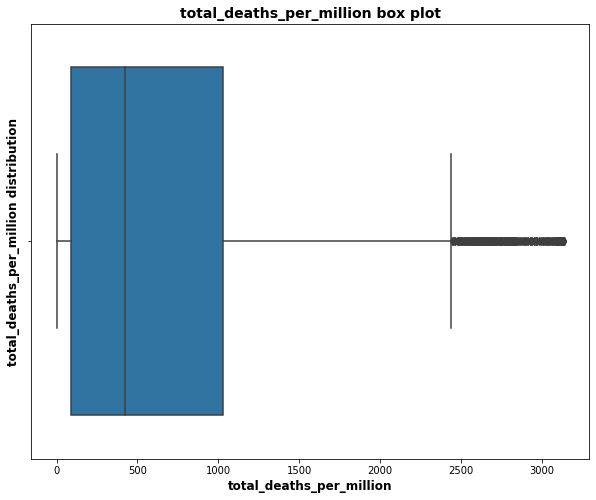

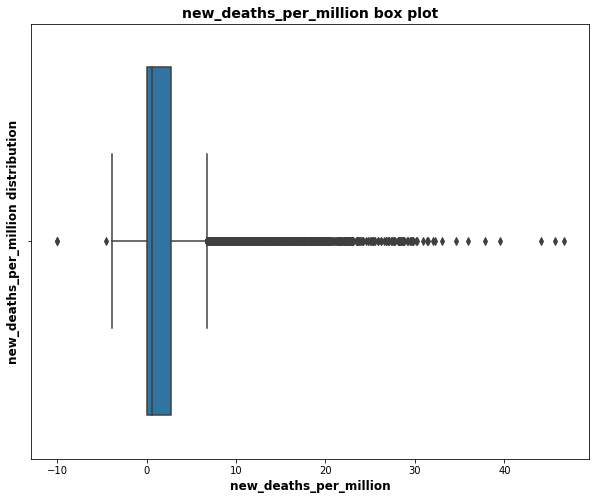

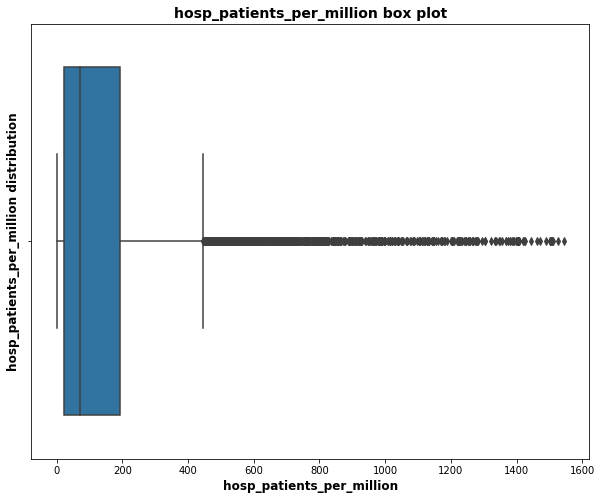

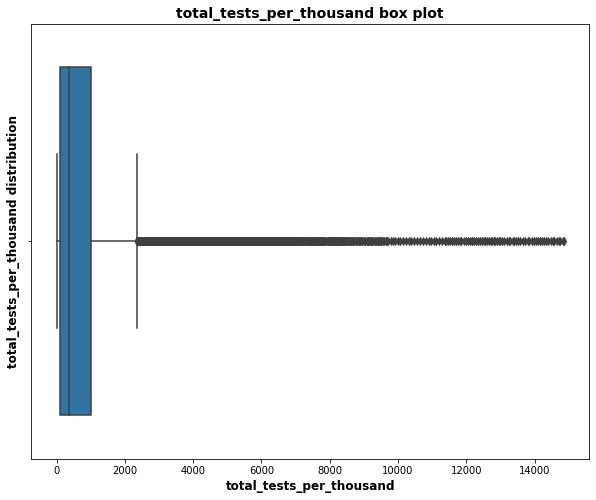

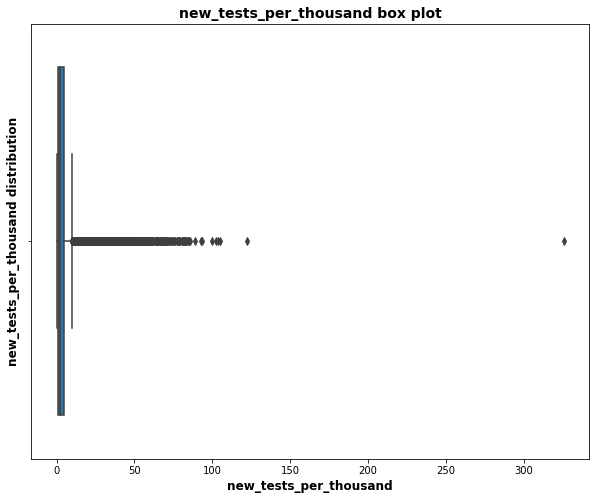

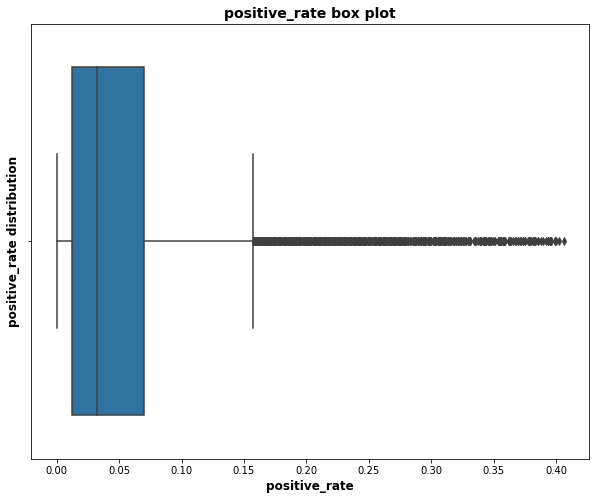

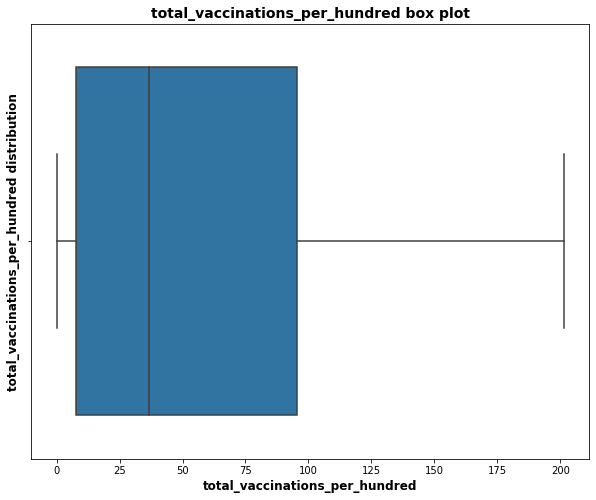

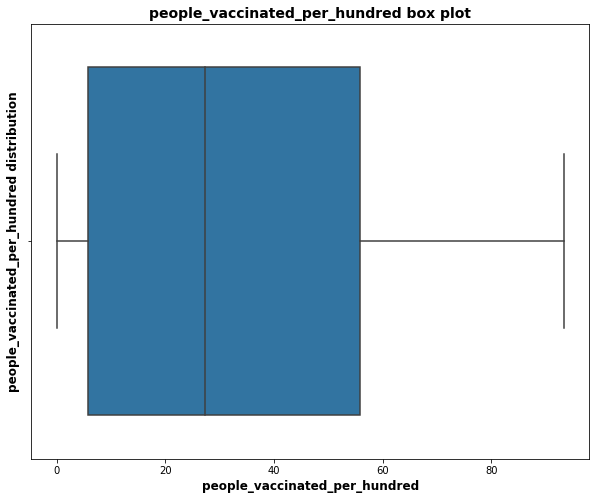

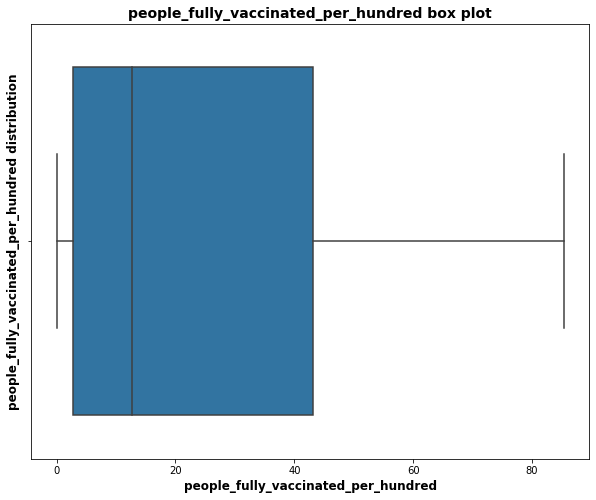

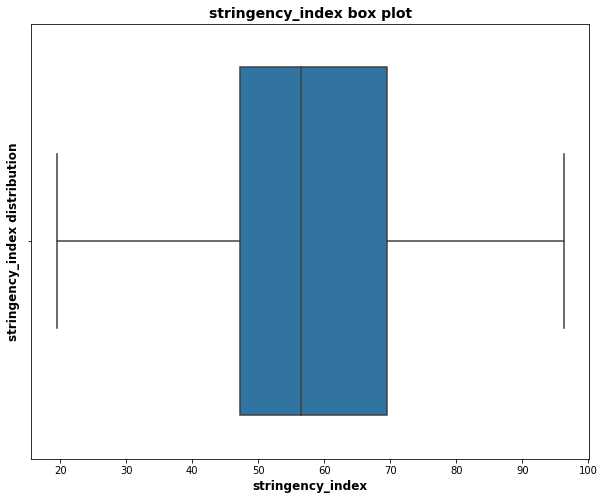

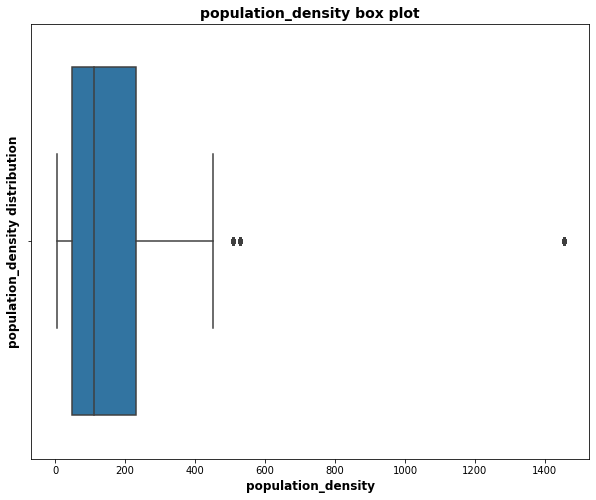

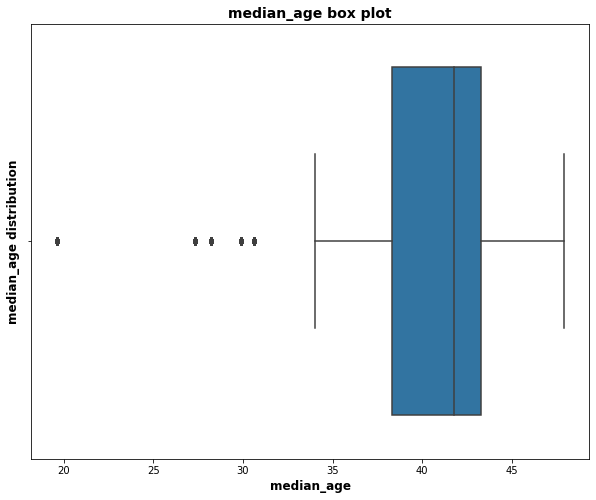

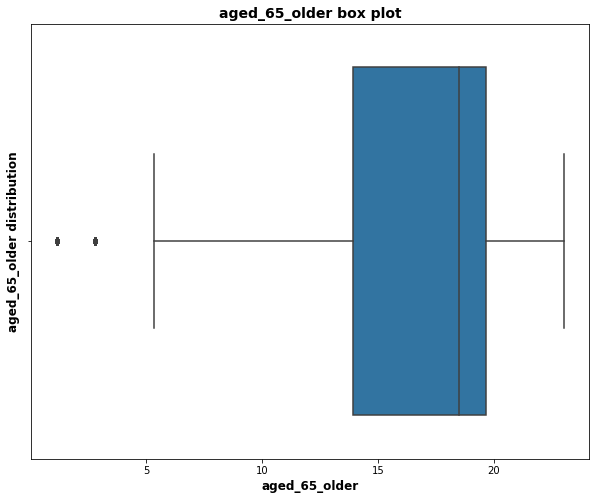

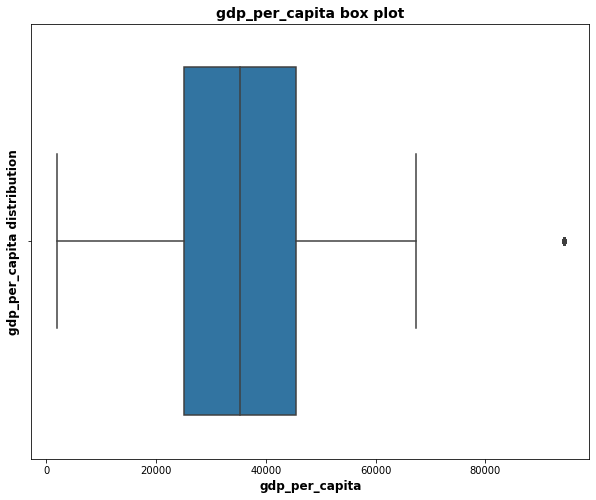

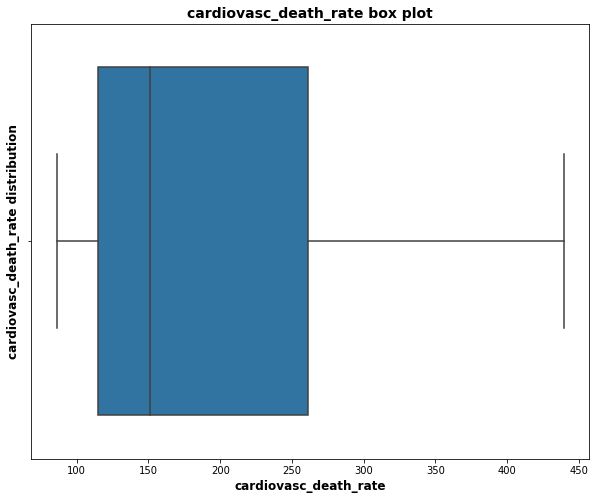

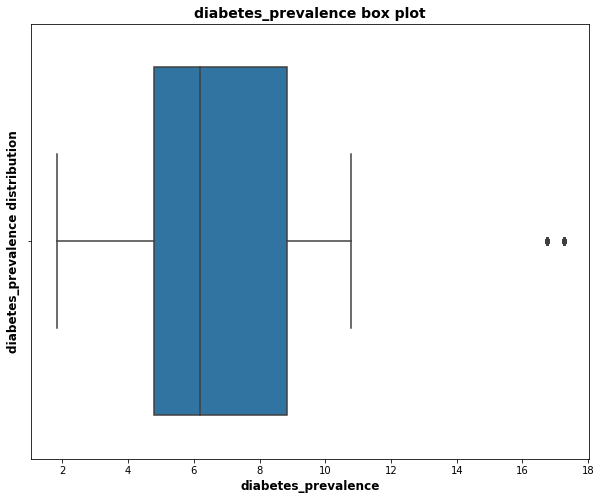

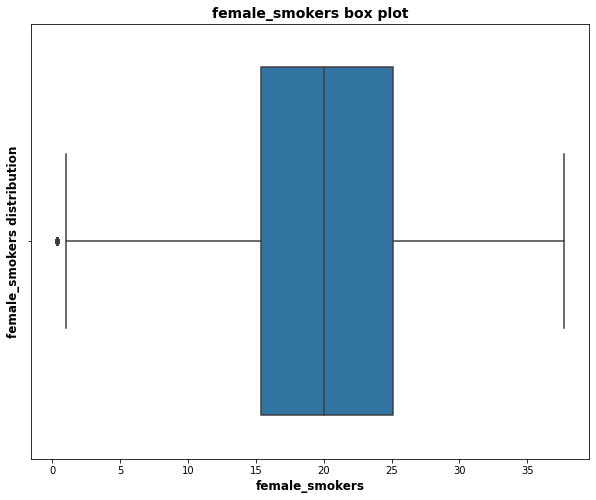

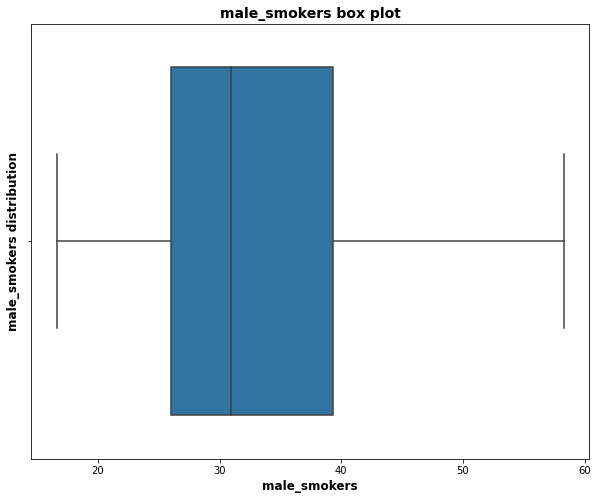

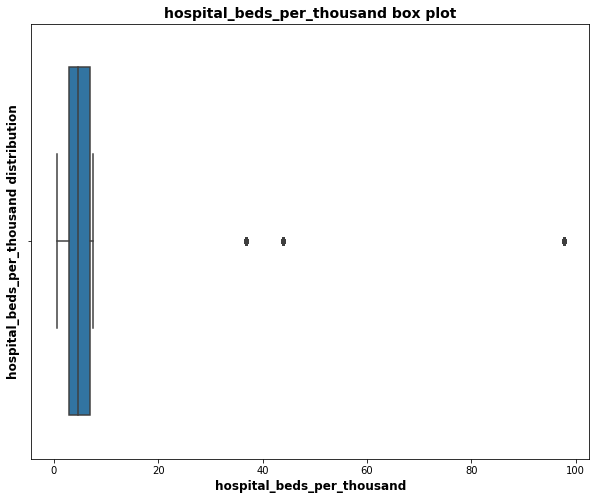

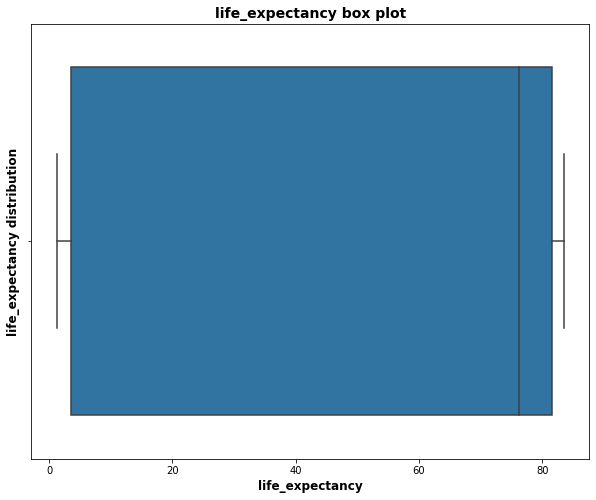

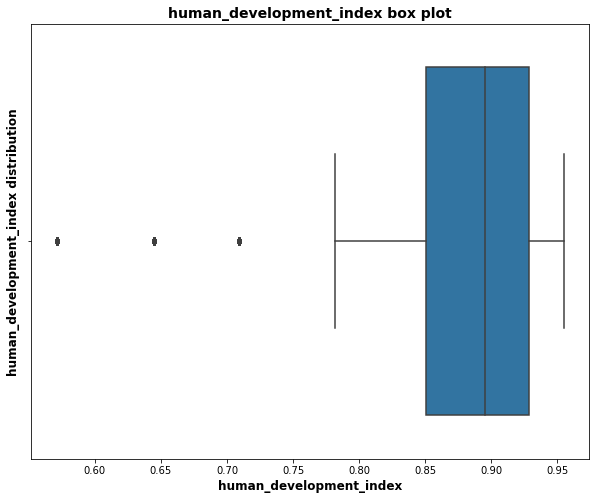

In [46]:
for var in continuous:
  plt.subplots(figsize=(10,8))
  sns.boxplot(x=df2[var])
  plt.xlabel(var,size=12,fontweight='bold')
  plt.ylabel(var+' distribution',size=12,fontweight='bold')
  plt.title(var+' box plot',size=14,fontweight='bold')
  plt.show()

###Histogram

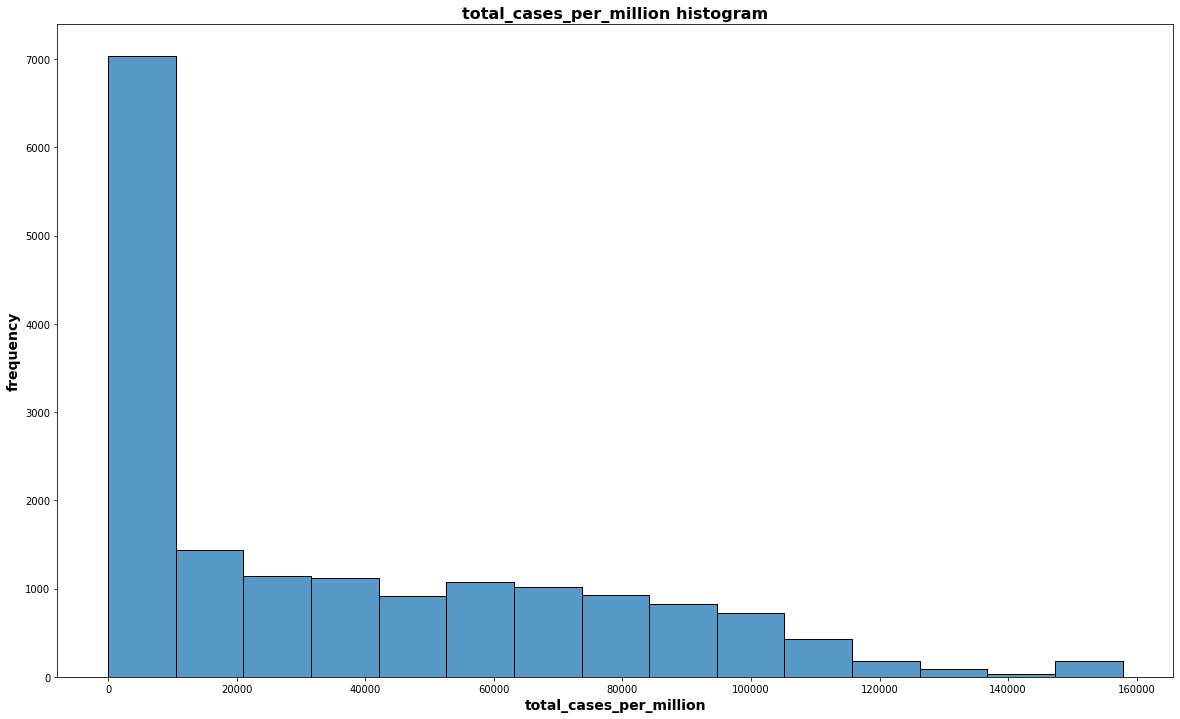

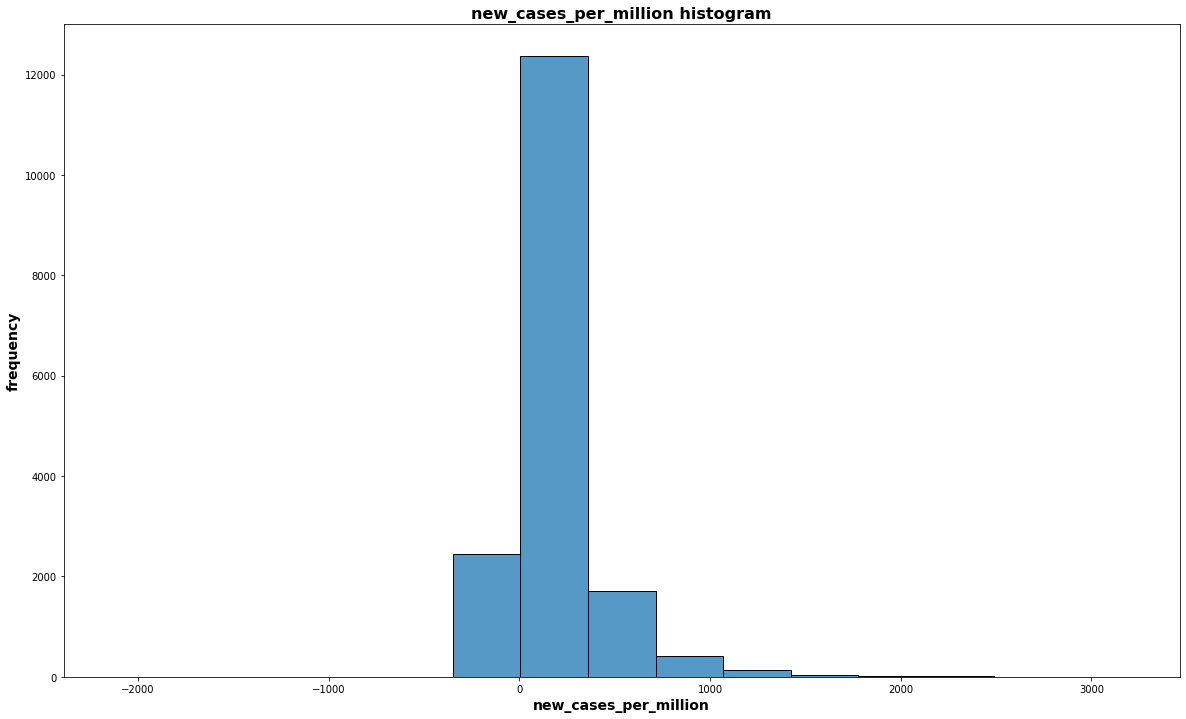

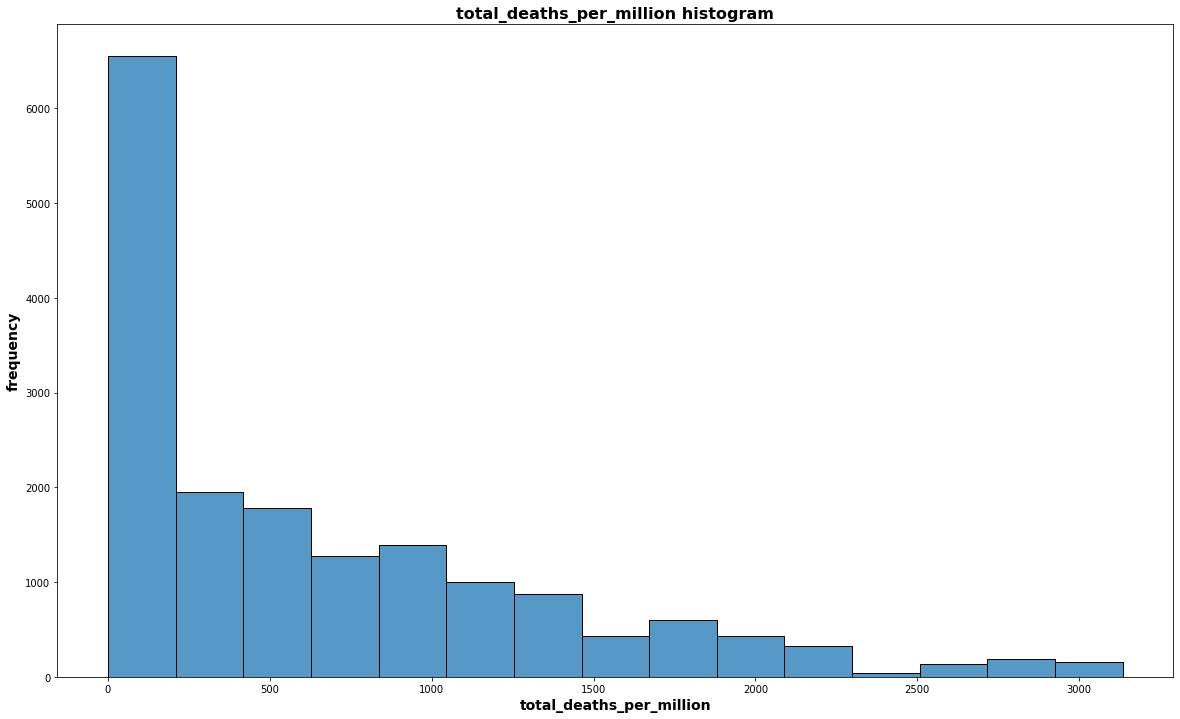

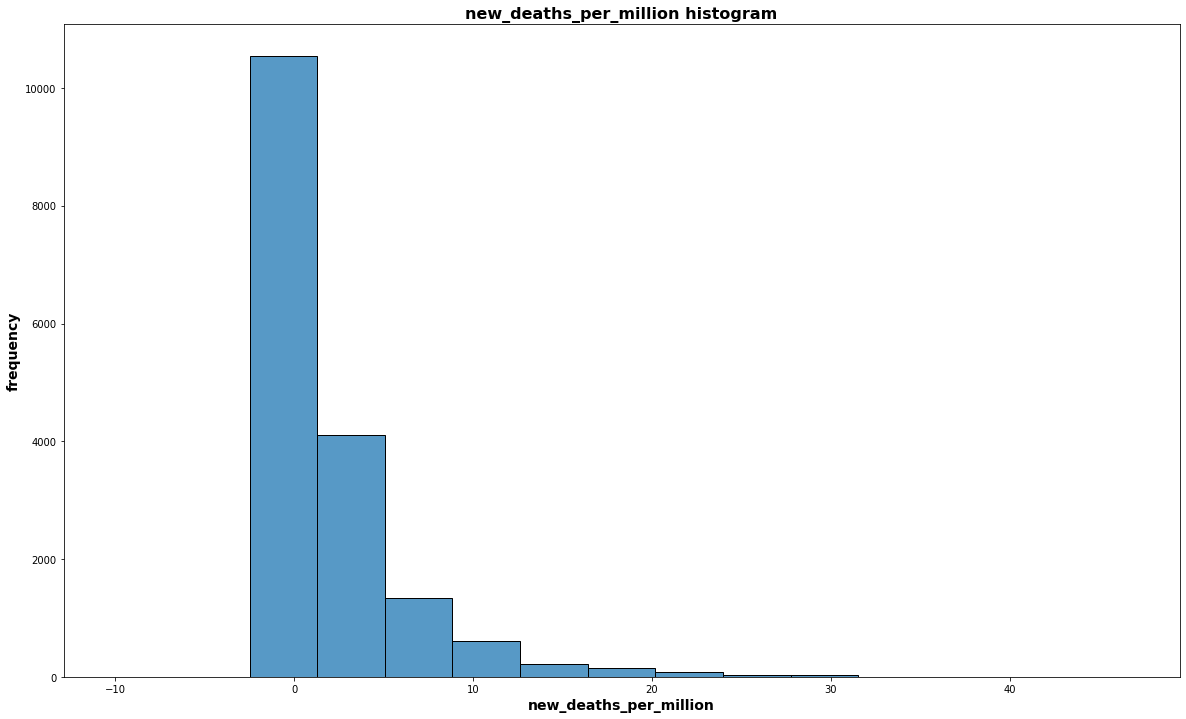

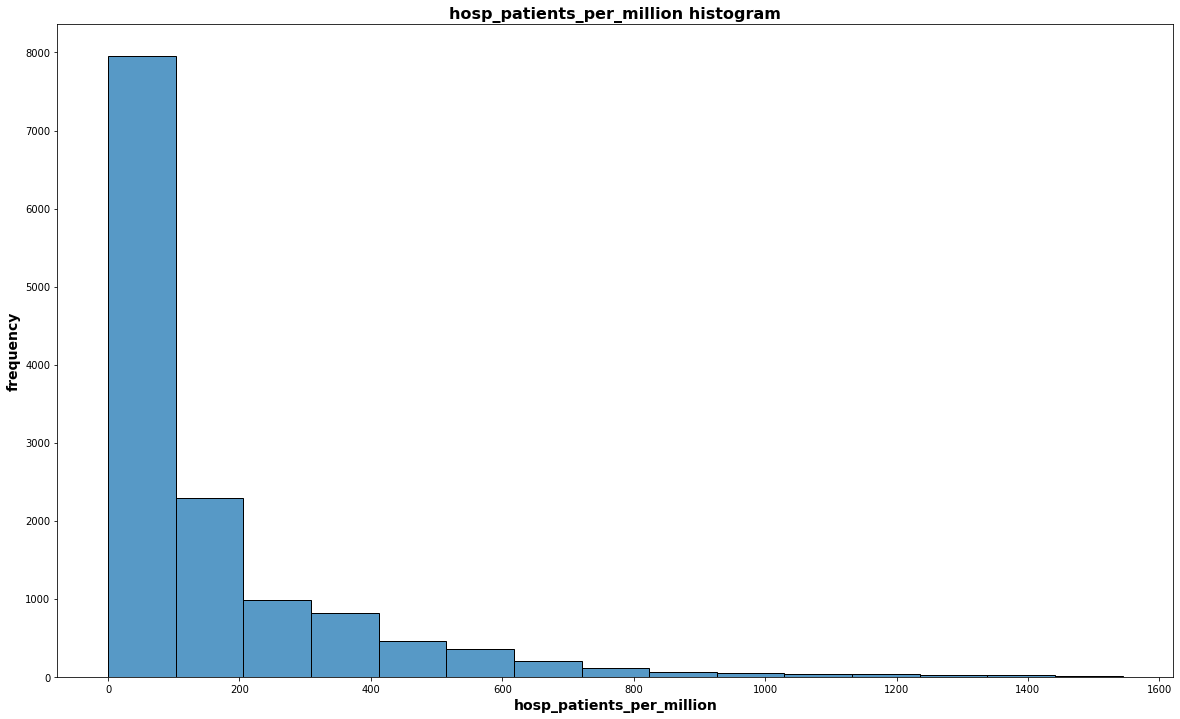

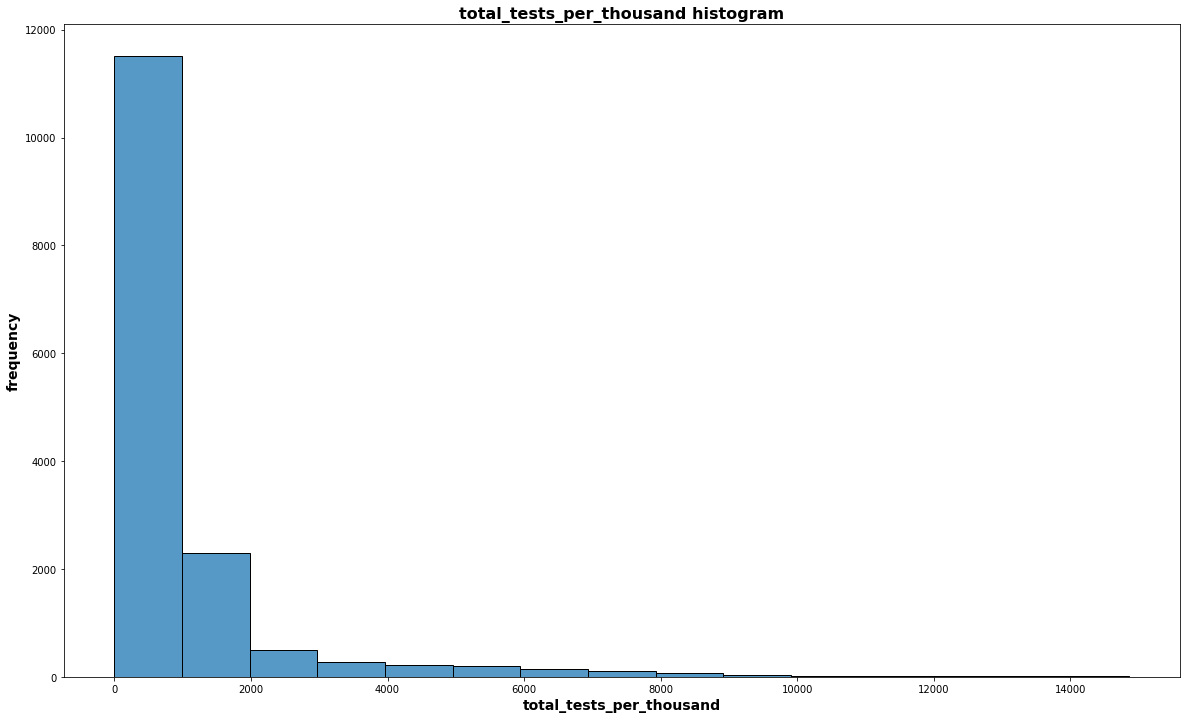

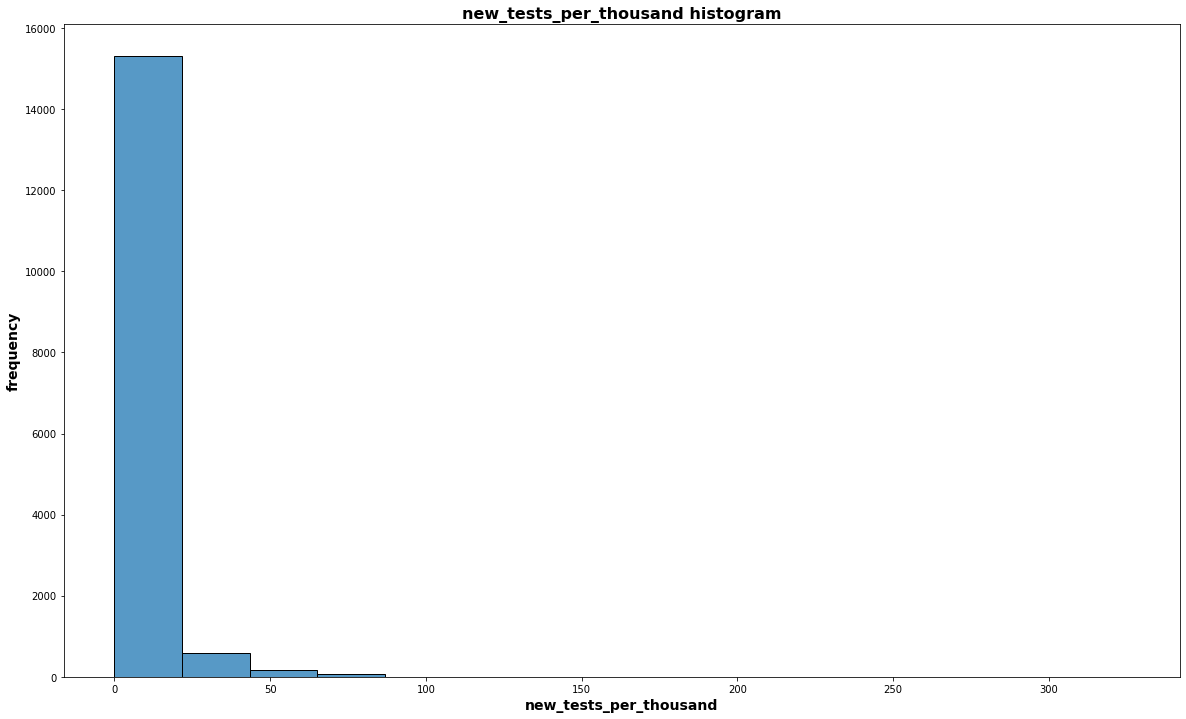

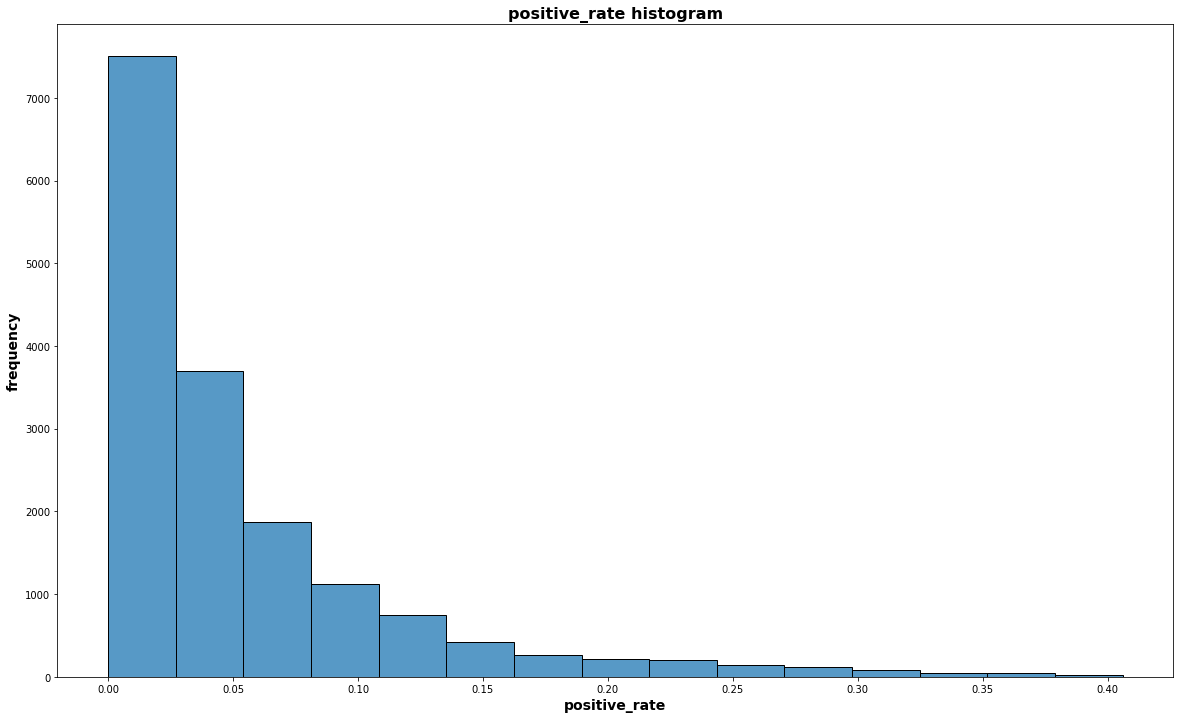

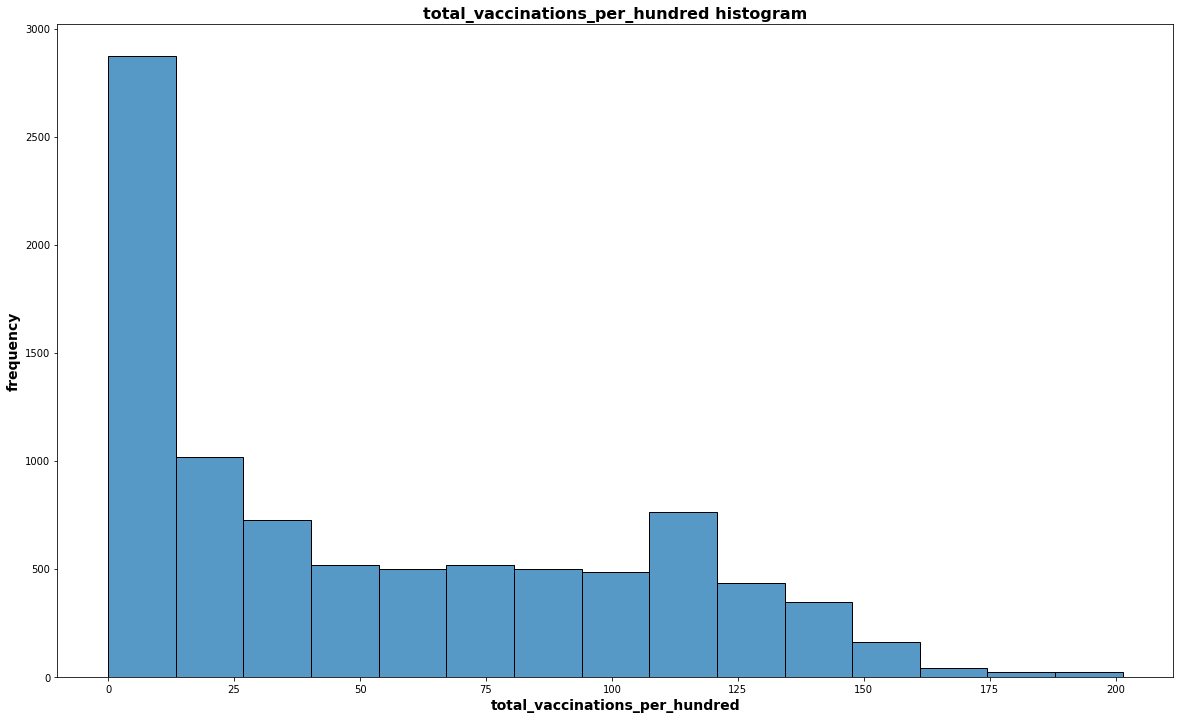

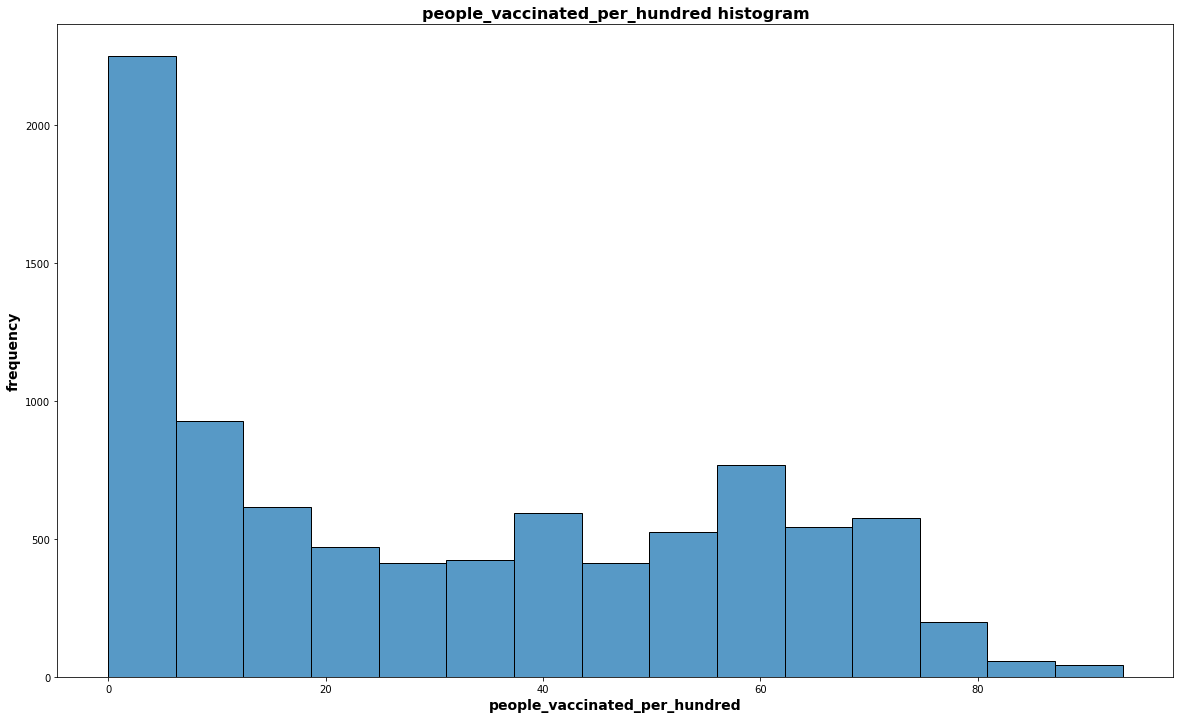

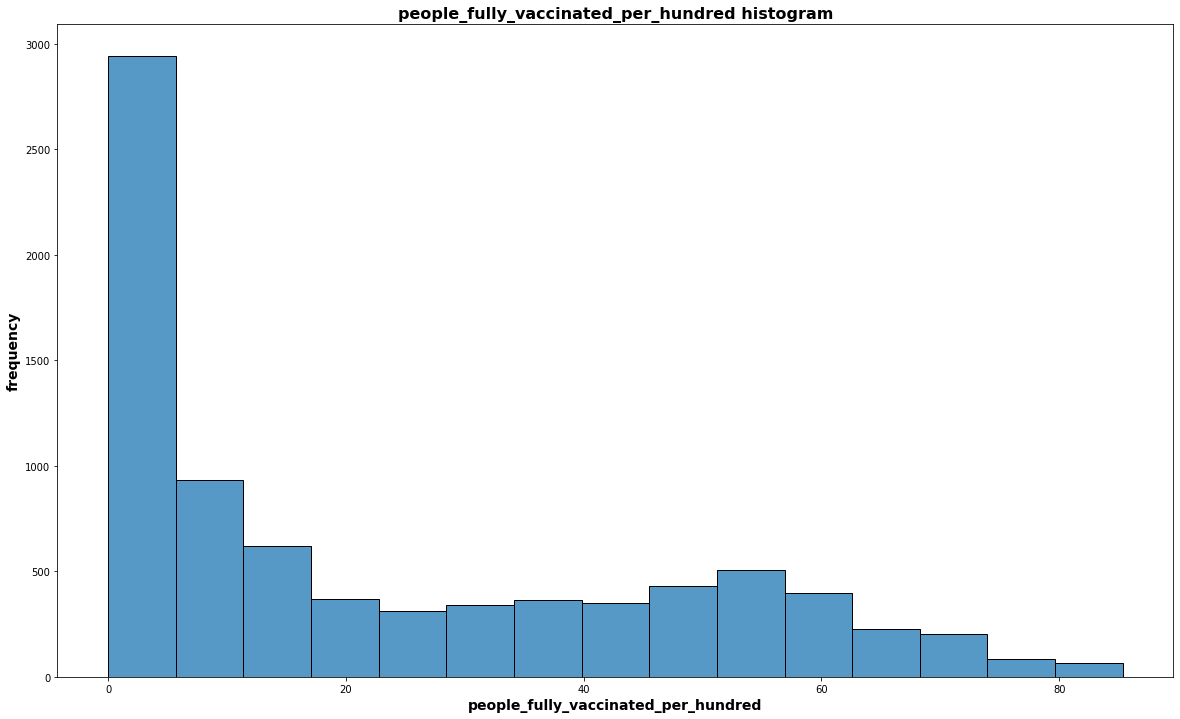

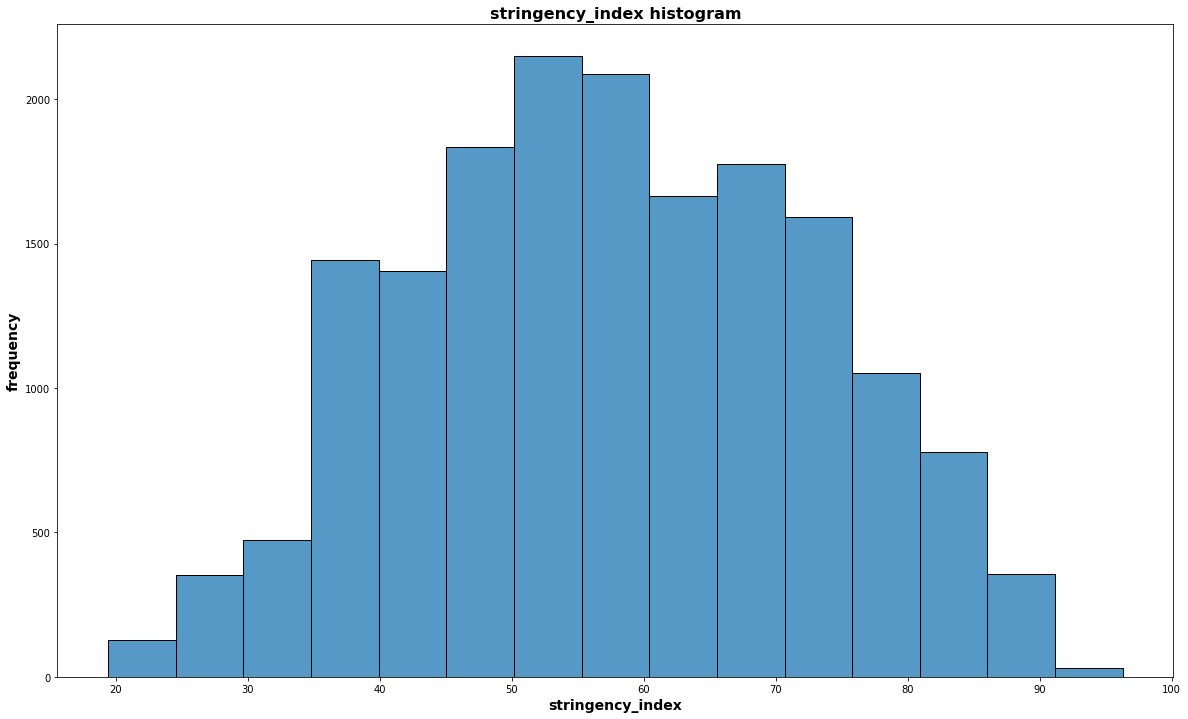

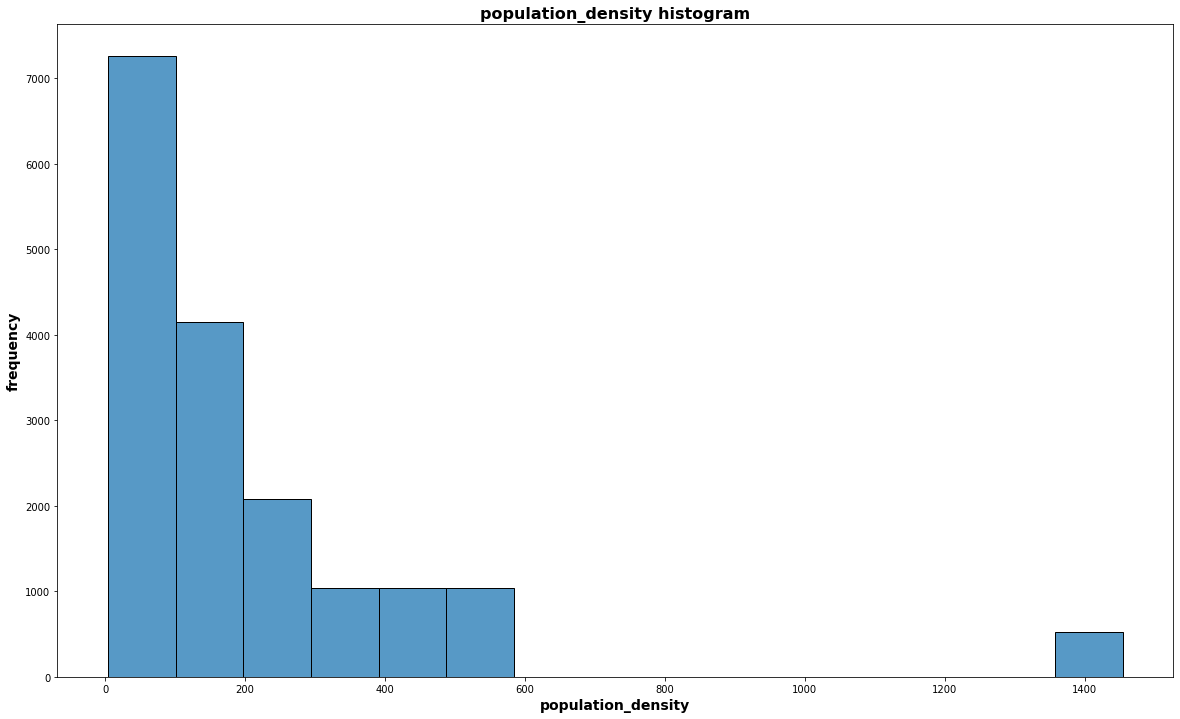

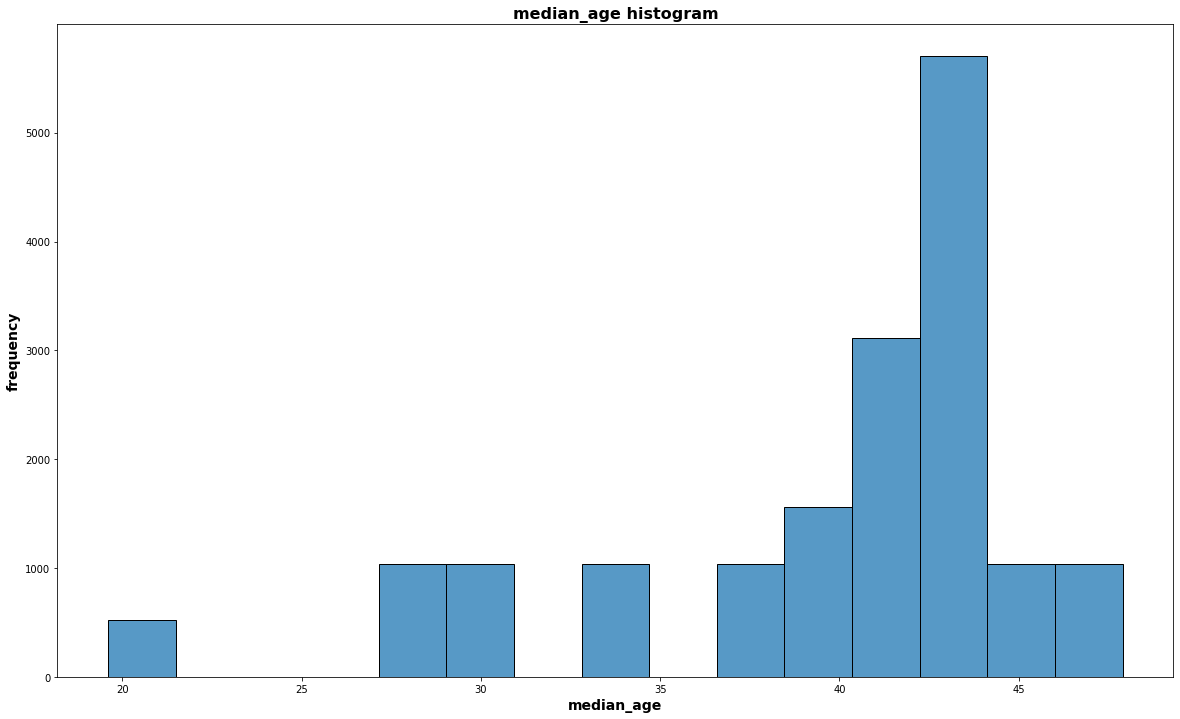

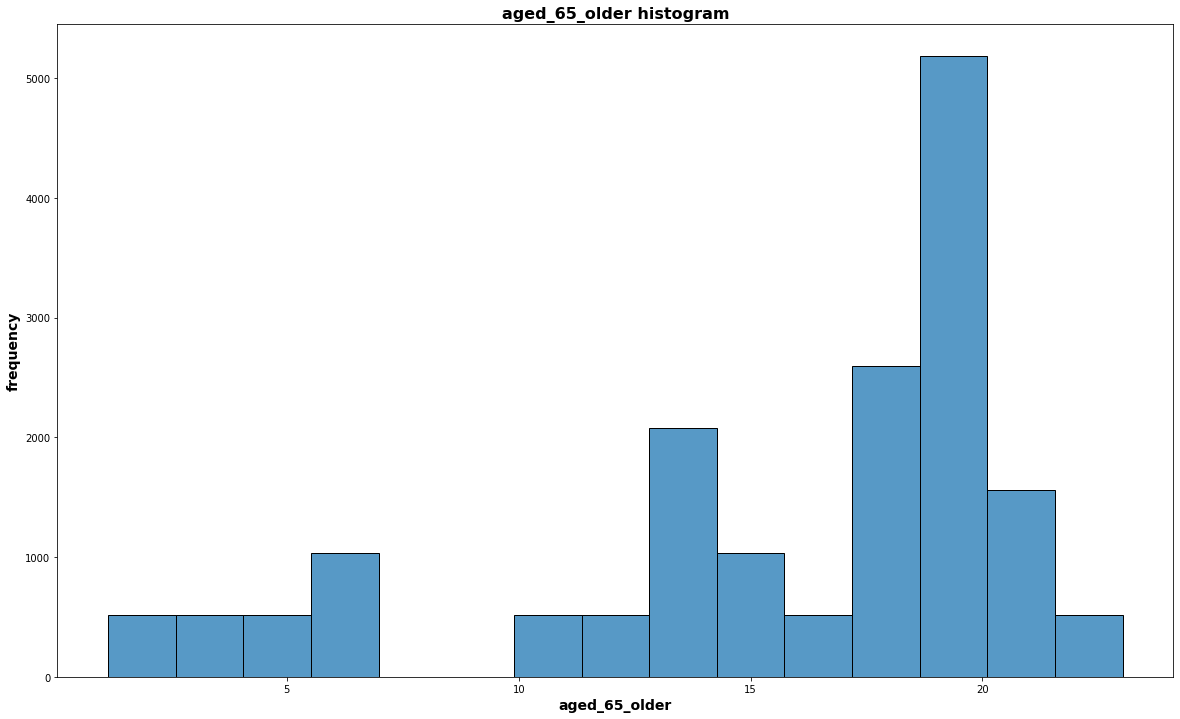

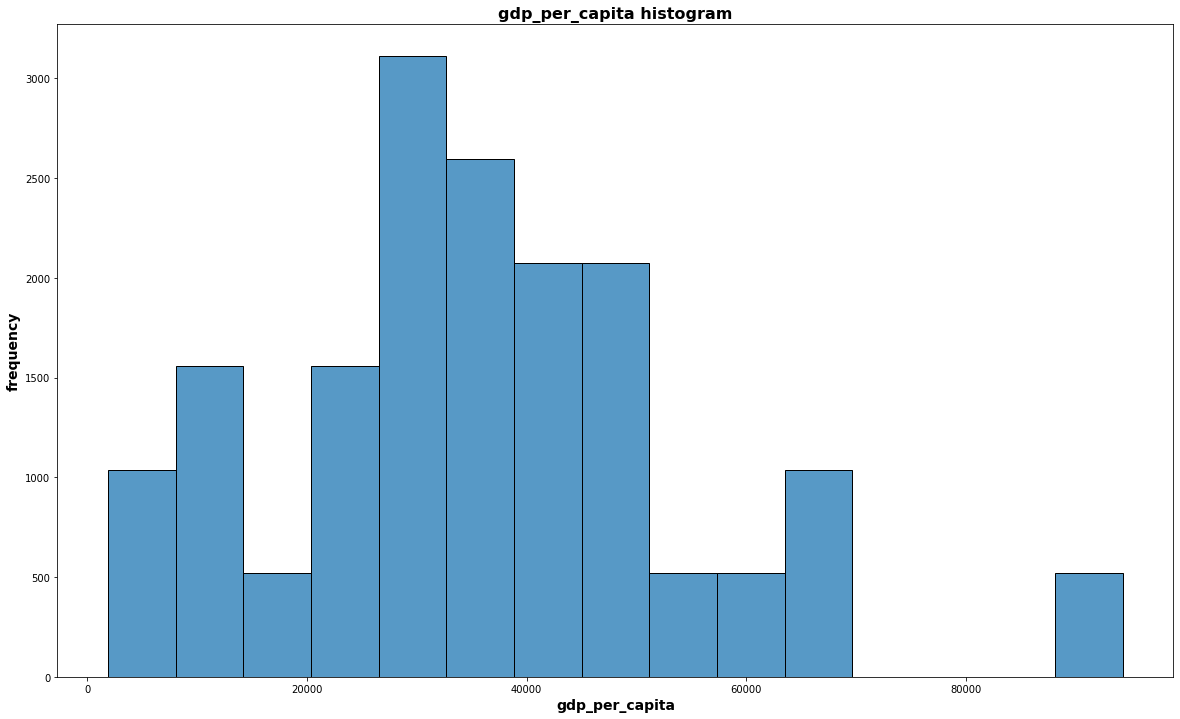

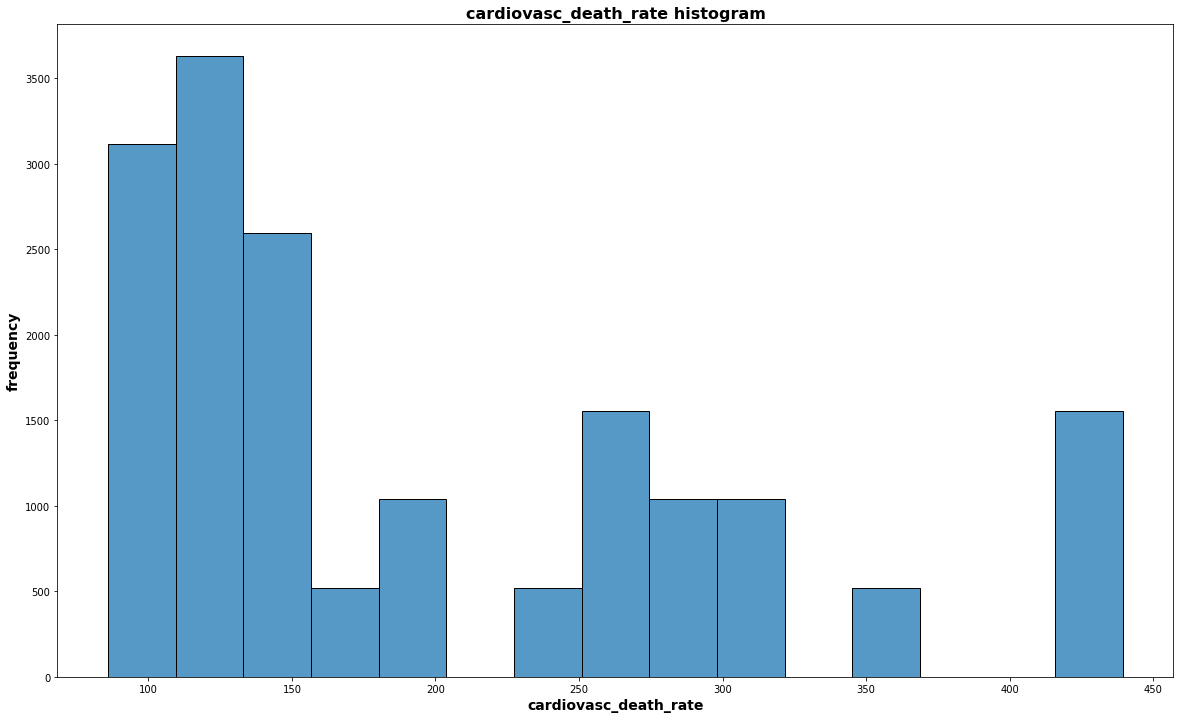

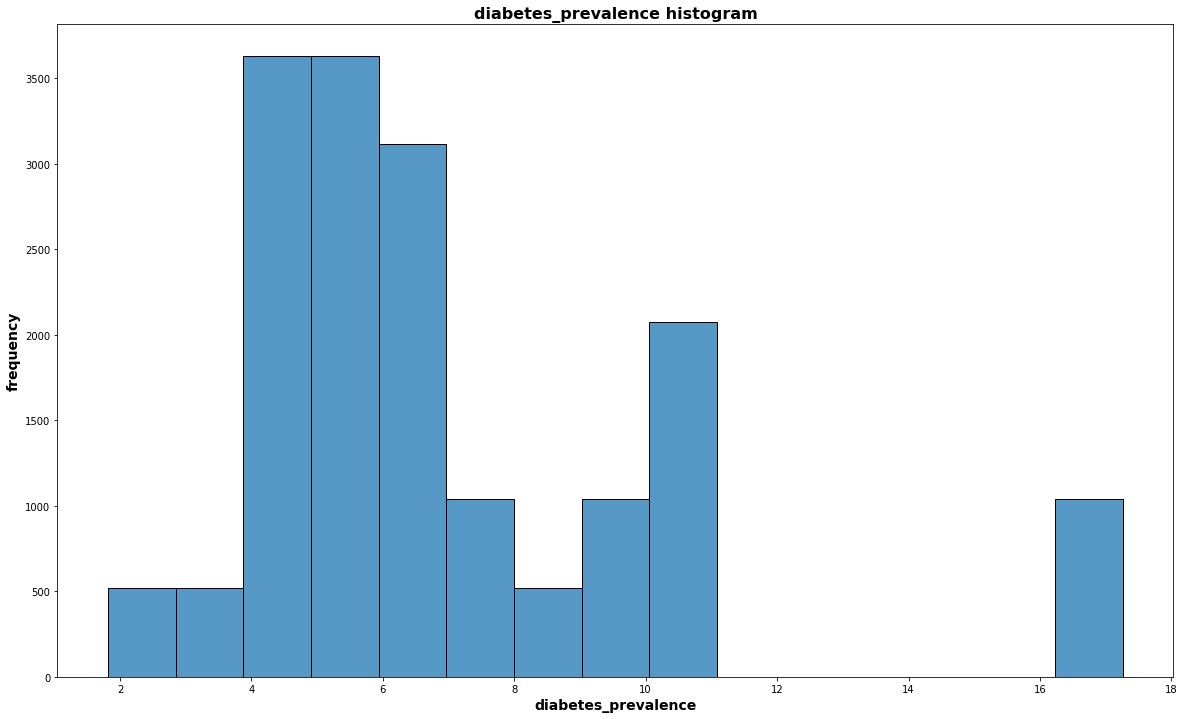

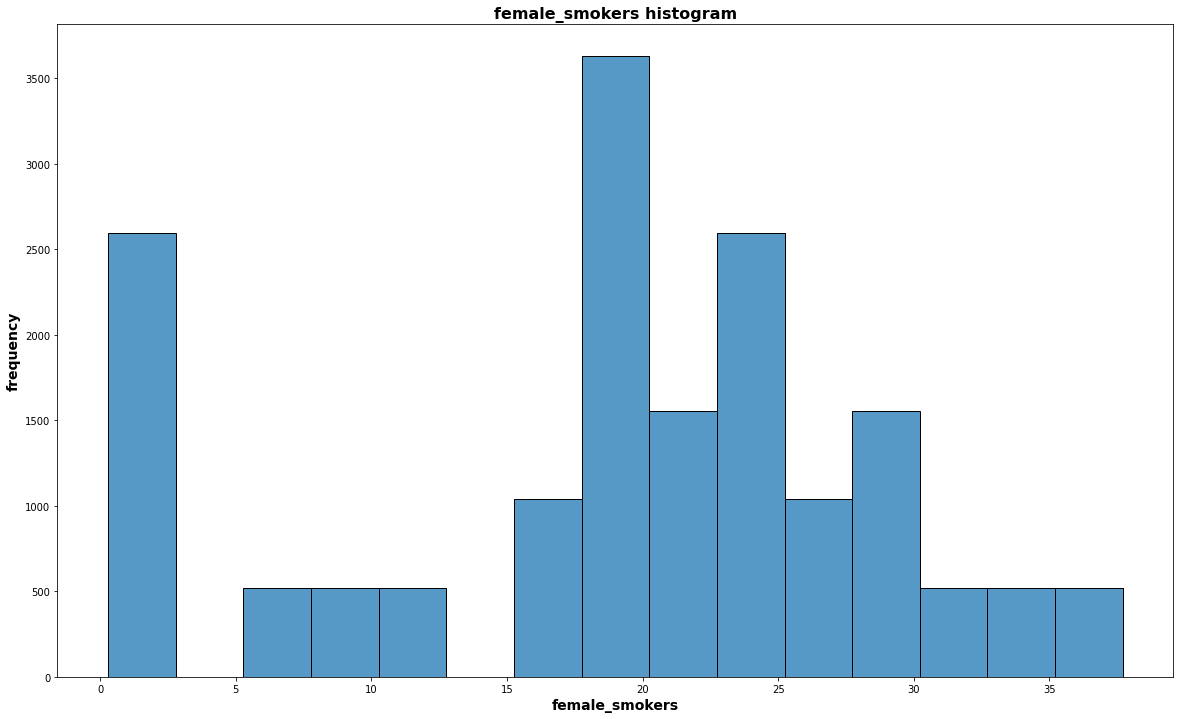

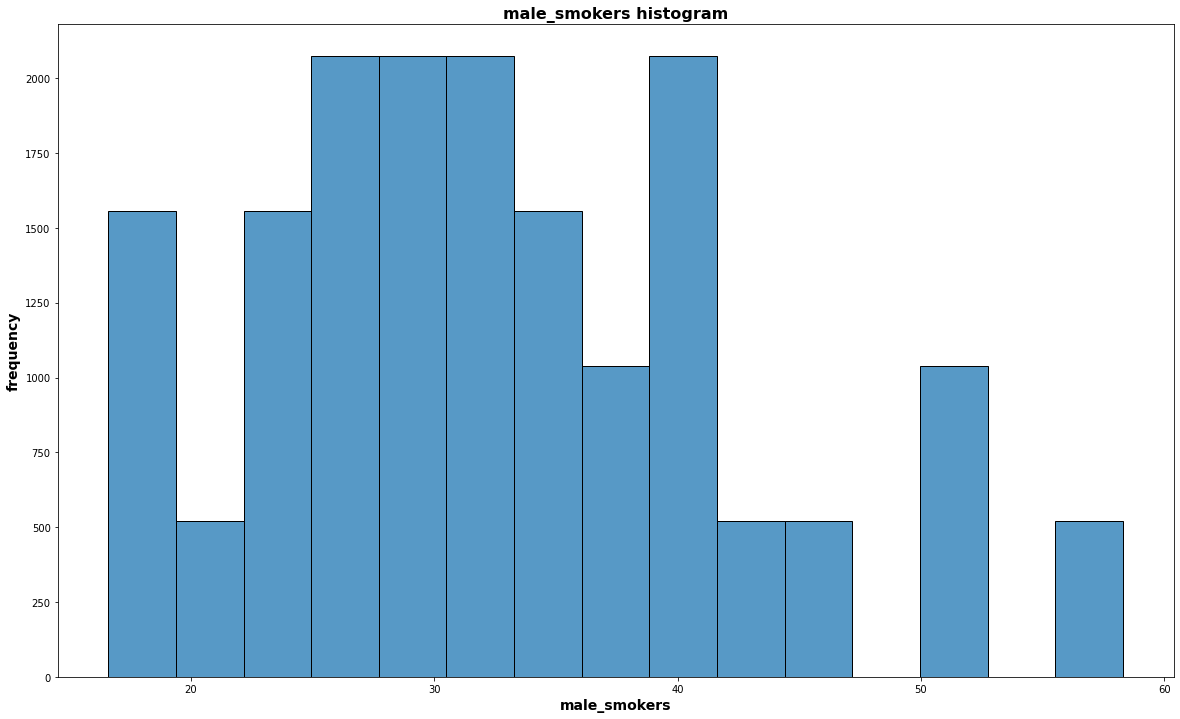

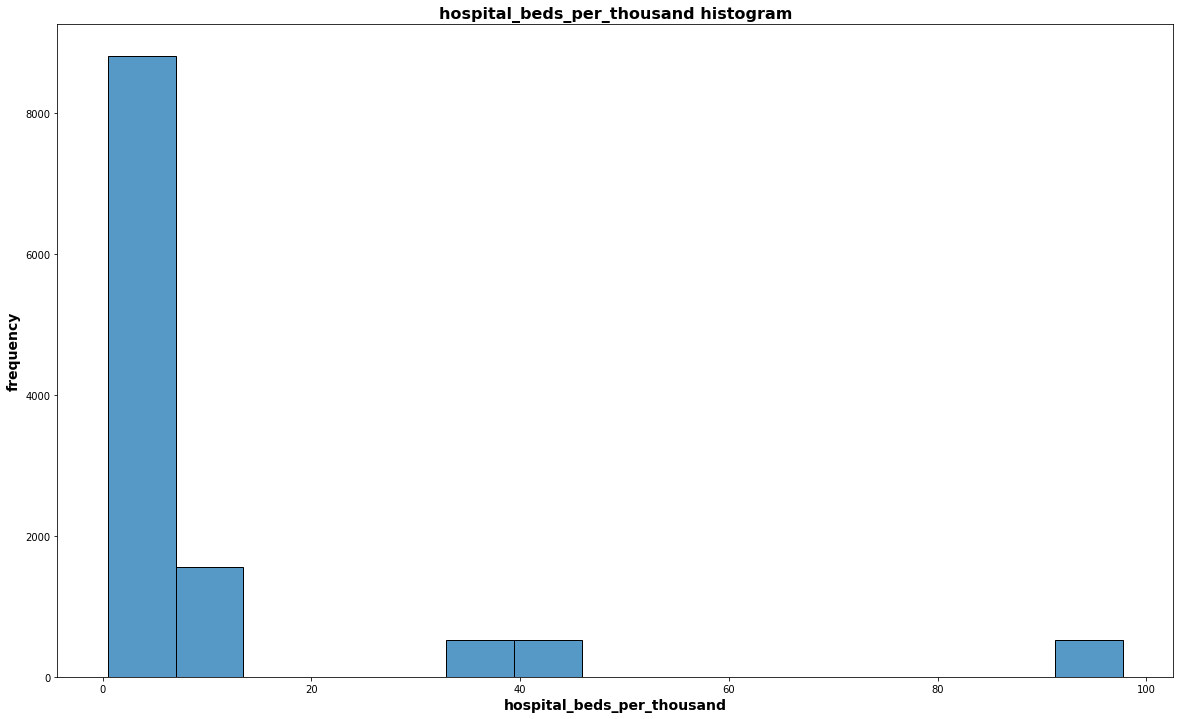

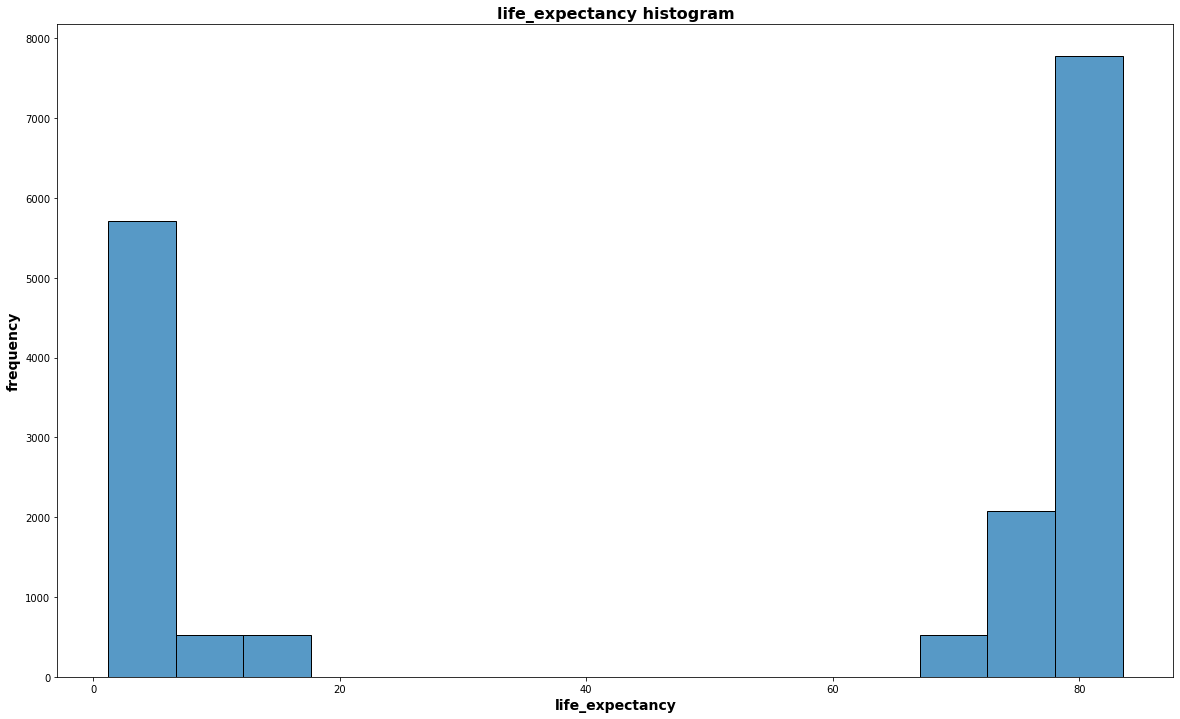

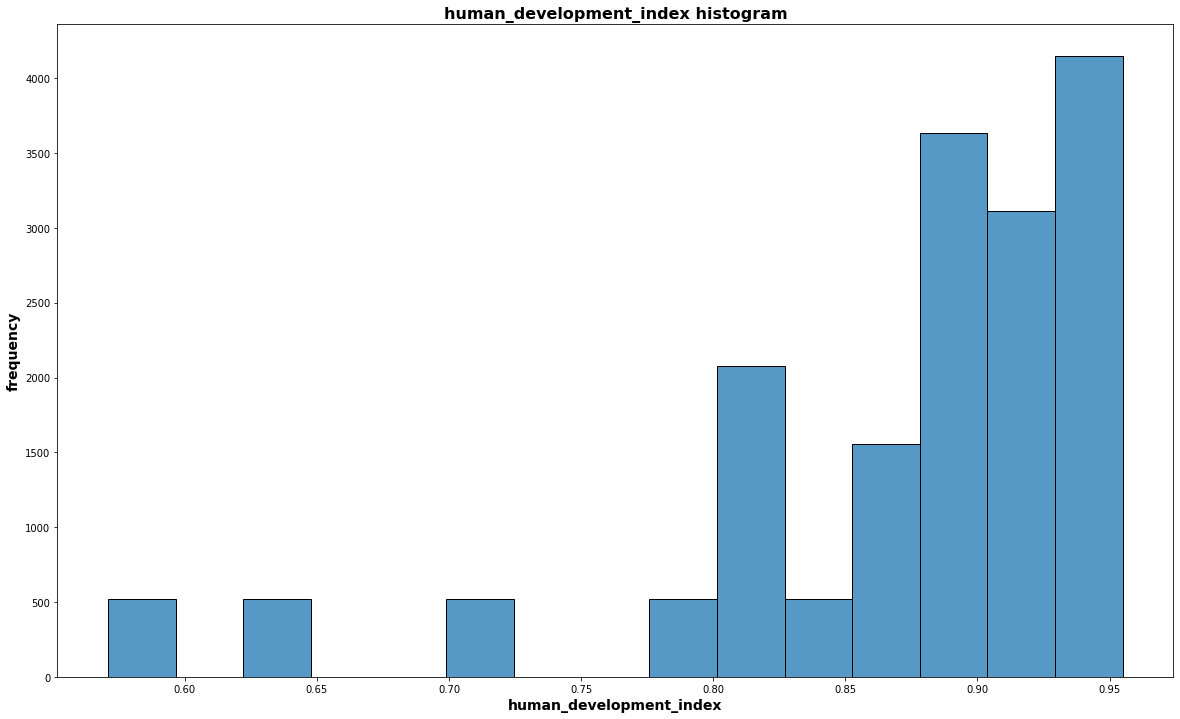

In [47]:
for var in continuous:
  plt.subplots(figsize=(20,12))
  sns.histplot(df2[var],bins=15)
  plt.xlabel(var,size=14,fontweight='bold')
  plt.ylabel('frequency',size=14,fontweight='bold')
  plt.title(var+' histogram',size=16,fontweight='bold')
  plt.show()

##Pie charts

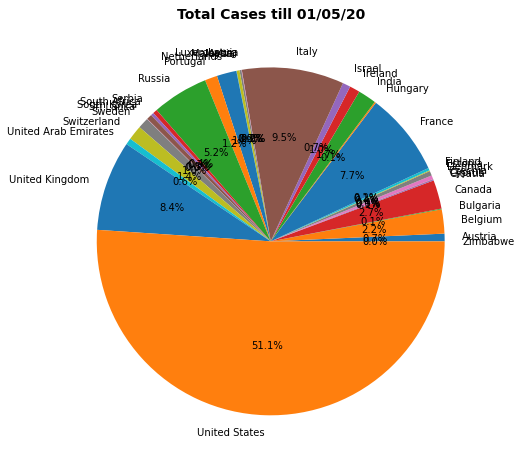

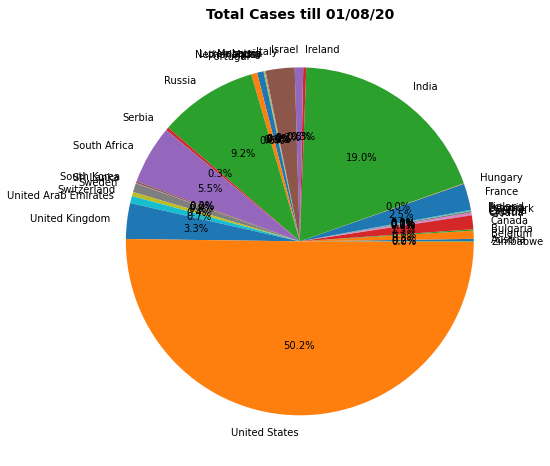

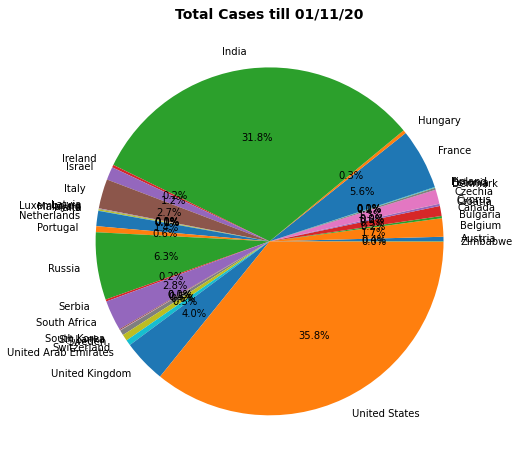

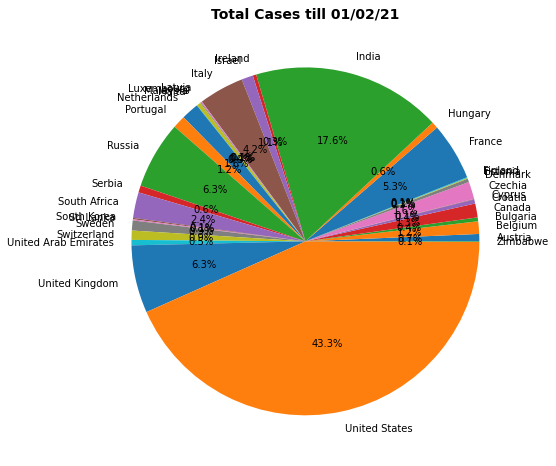

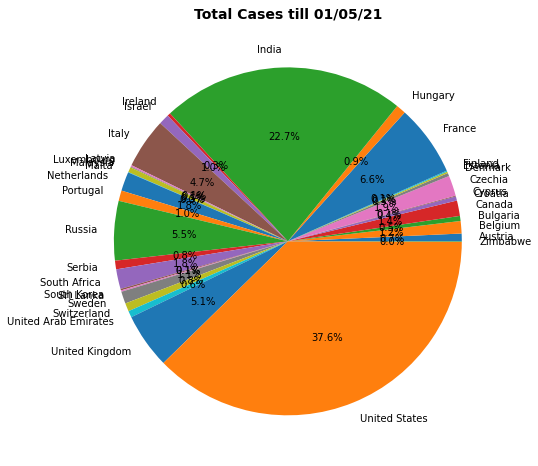

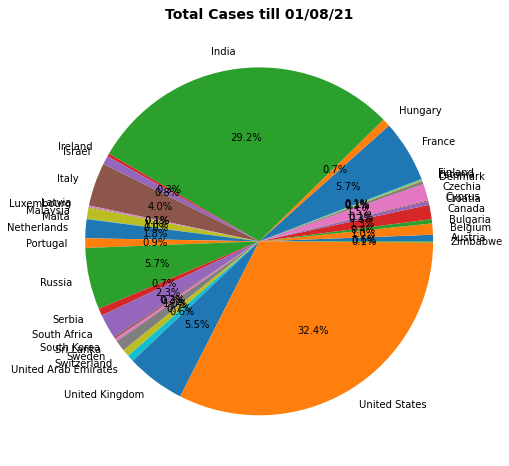

In [56]:
for date in ['01/05/20','01/08/20','01/11/20','01/02/21','01/05/21','01/08/21']:
  plt.subplots(figsize=(10,8))
  idx = np.argwhere(np.array(df2['date'],ndmin=1)==date)
  data,labels = [],[]
  for i in range(len(idx)):
    data.append(df2['total_cases'][idx[i][0]])
    labels.append(df2['location'][idx[i][0]])
  plt.pie(data,labels=labels,autopct='%.1f%%')
  plt.title(f'Total Cases till {date}',fontweight='bold',size=14)
  plt.show()

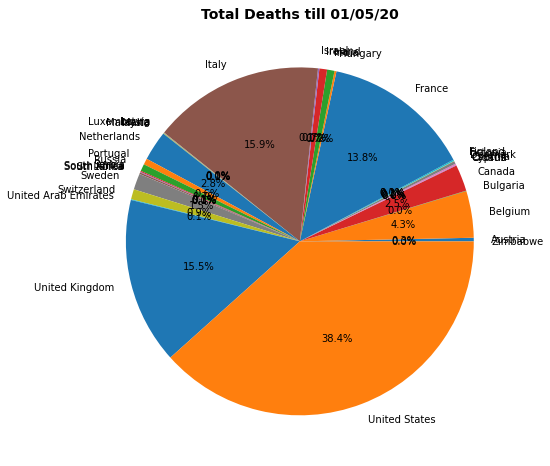

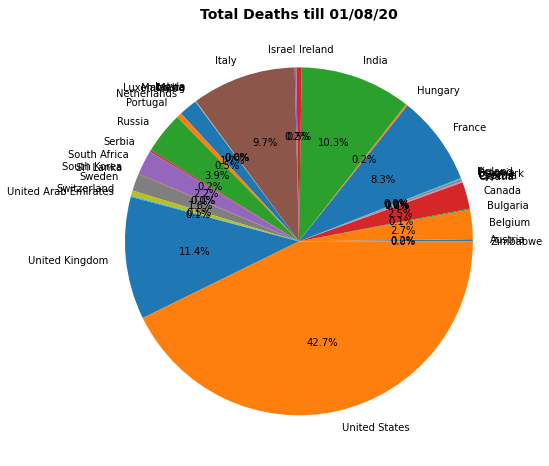

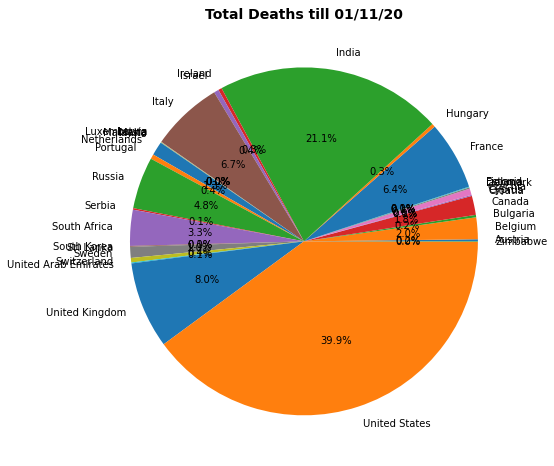

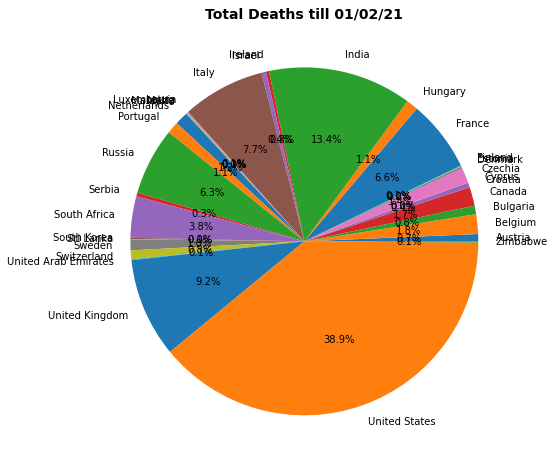

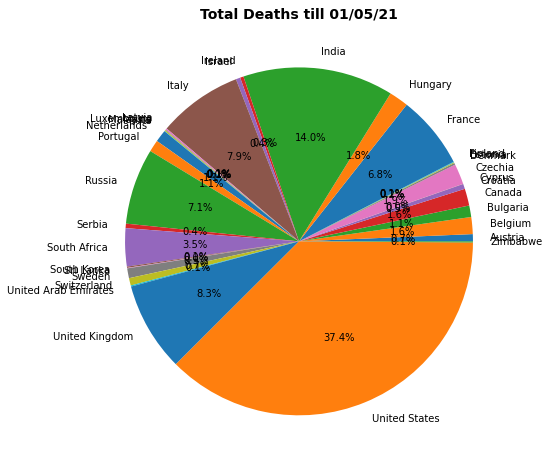

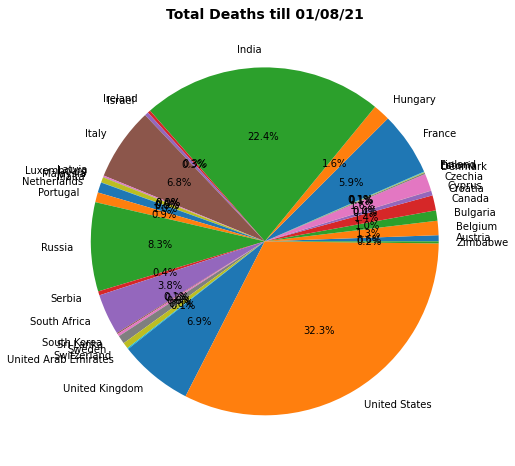

In [57]:
for date in ['01/05/20','01/08/20','01/11/20','01/02/21','01/05/21','01/08/21']:
  plt.subplots(figsize=(10,8))
  idx = np.argwhere(np.array(df2['date'],ndmin=1)==date)
  data,labels = [],[]
  for i in range(len(idx)):
    data.append(df2['total_deaths'][idx[i][0]])
    labels.append(df2['location'][idx[i][0]])
  plt.pie(data,labels=labels,autopct='%.1f%%')
  plt.title(f'Total Deaths till {date}',fontweight='bold',size=14)
  plt.show()

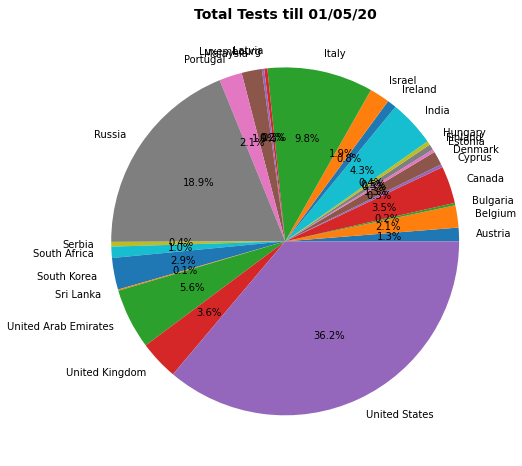

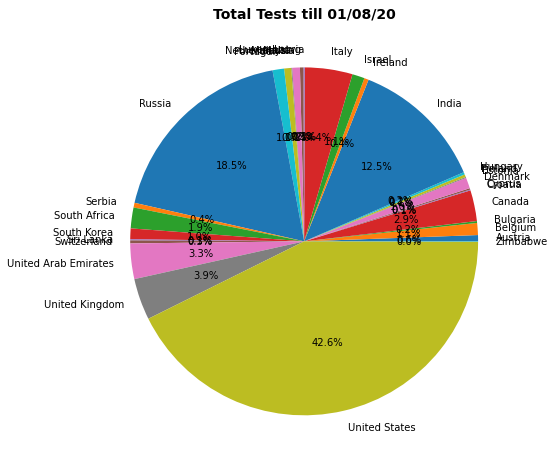

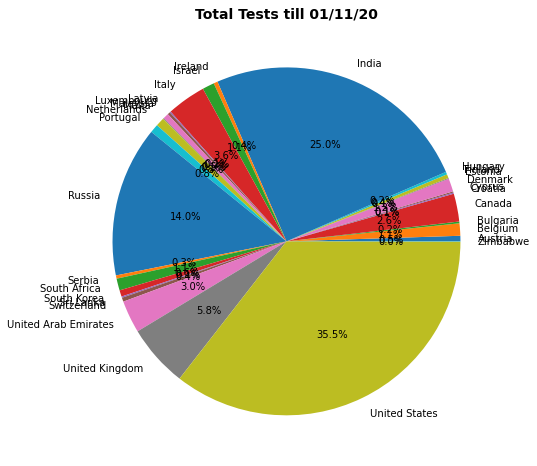

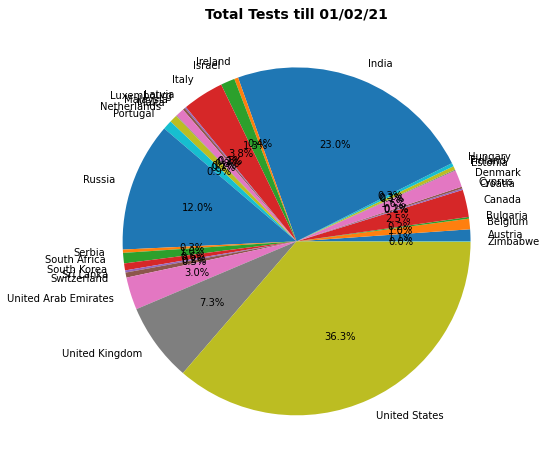

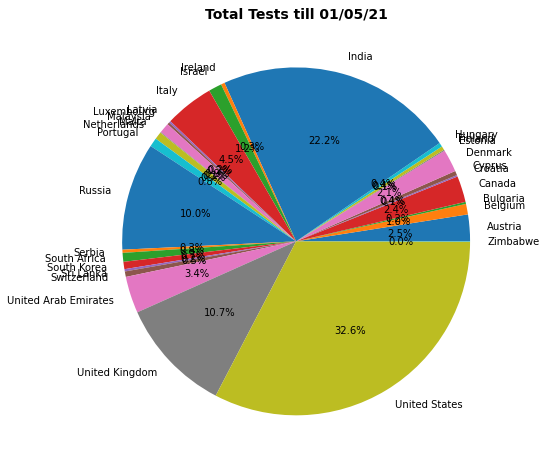

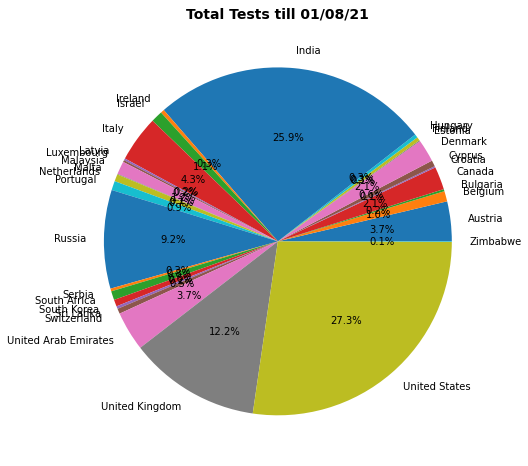

In [58]:
for date in ['01/05/20','01/08/20','01/11/20','01/02/21','01/05/21','01/08/21']:
  plt.subplots(figsize=(10,8))
  idx = np.argwhere(np.array(df2['date'],ndmin=1)==date)
  data,labels = [],[]
  for i in range(len(idx)):
    if(df2['total_tests'][idx[i][0]]<np.inf):
      data.append(df2['total_tests'][idx[i][0]])
      labels.append(df2['location'][idx[i][0]])
  plt.pie(data,labels=labels,autopct='%.1f%%')
  plt.title(f'Total Tests till {date}',fontweight='bold',size=14)
  plt.show()

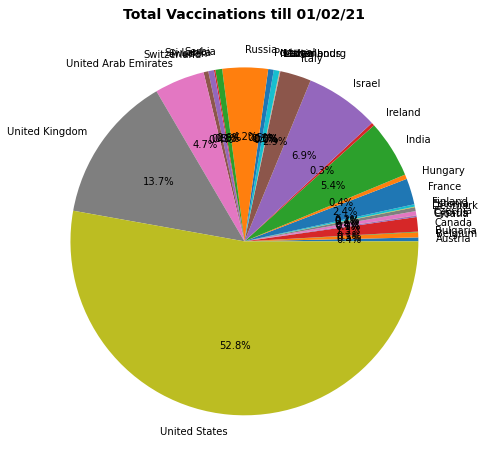

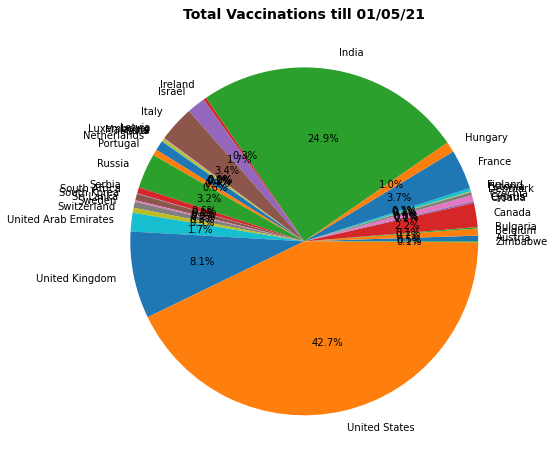

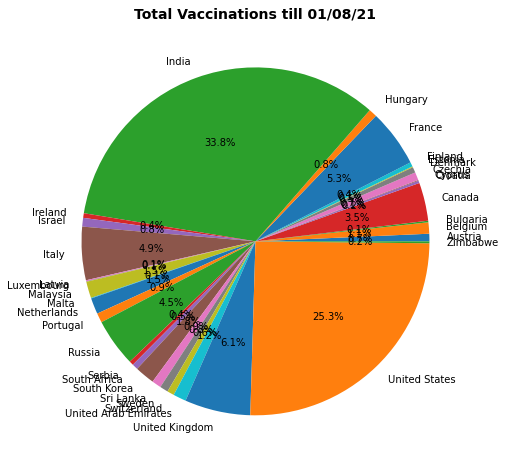

In [59]:
for date in ['01/02/21','01/05/21','01/08/21']:
  plt.subplots(figsize=(10,8))
  idx = np.argwhere(np.array(df2['date'],ndmin=1)==date)
  data,labels = [],[]
  for i in range(len(idx)):
    if(df2['total_vaccinations'][idx[i][0]]<np.inf):
      data.append(df2['total_vaccinations'][idx[i][0]])
      labels.append(df2['location'][idx[i][0]])
  plt.pie(data,labels=labels,autopct='%.1f%%')
  plt.title(f'Total Vaccinations till {date}',fontweight='bold',size=14)
  plt.show()

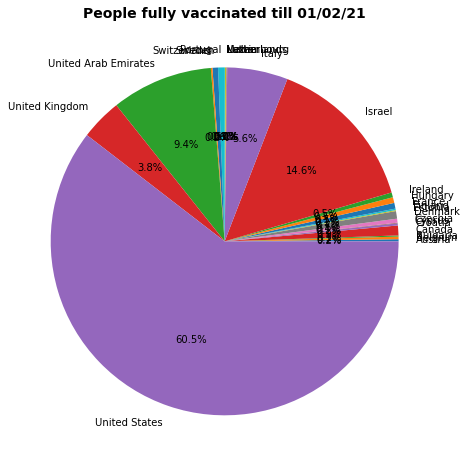

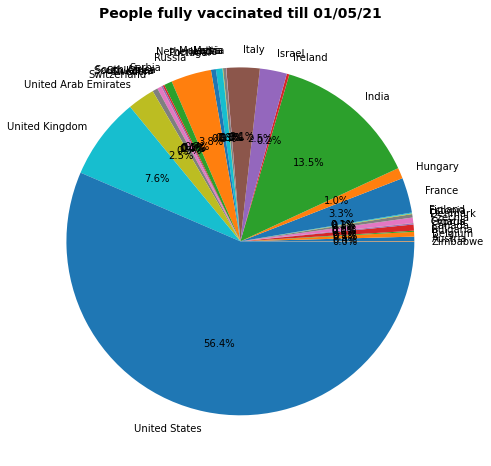

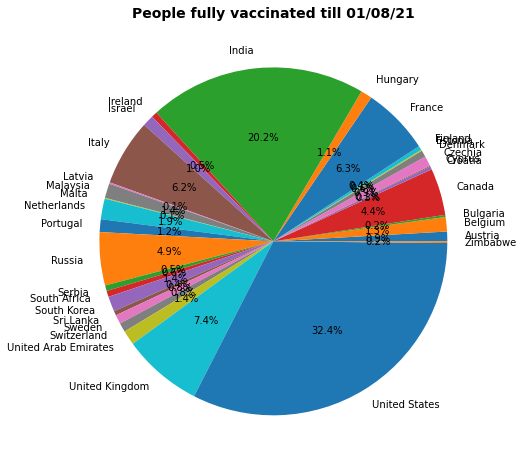

In [60]:
for date in ['01/02/21','01/05/21','01/08/21']:
  plt.subplots(figsize=(10,8))
  idx = np.argwhere(np.array(df2['date'],ndmin=1)==date)
  data,labels = [],[]
  for i in range(len(idx)):
    if(df2['people_fully_vaccinated'][idx[i][0]]<np.inf):
      data.append(df2['people_fully_vaccinated'][idx[i][0]])
      labels.append(df2['location'][idx[i][0]])
  plt.pie(data,labels=labels,autopct='%.1f%%')
  plt.title(f'People fully vaccinated till {date}',fontweight='bold',size=14)
  plt.show()

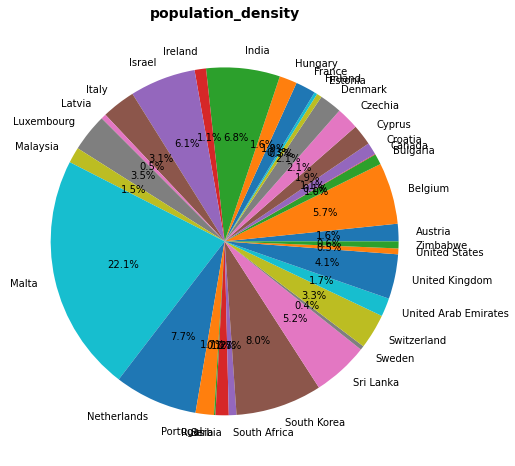

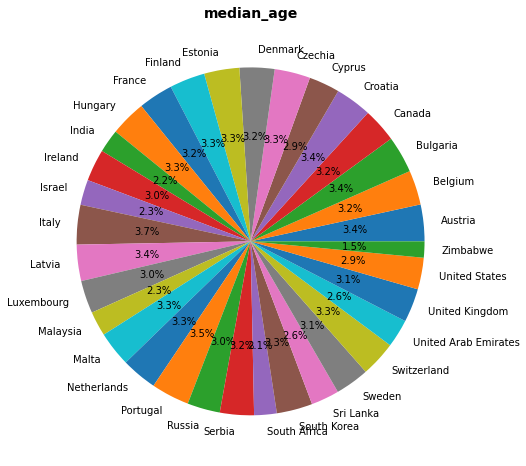

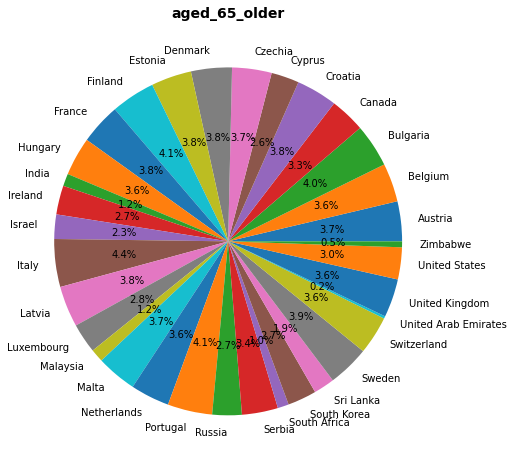

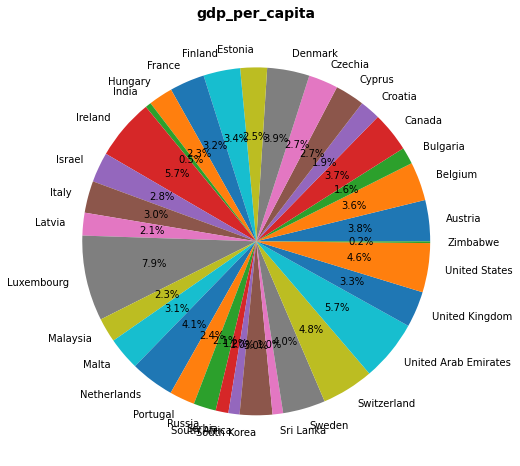

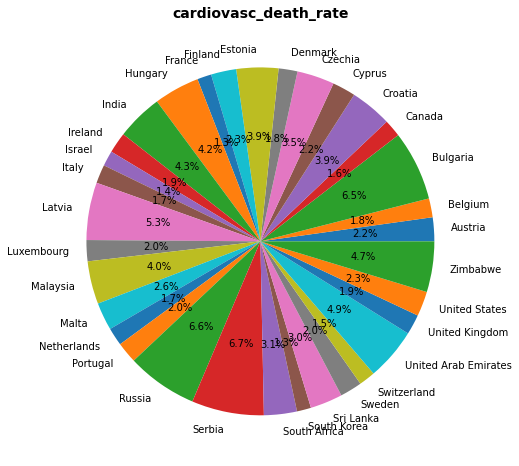

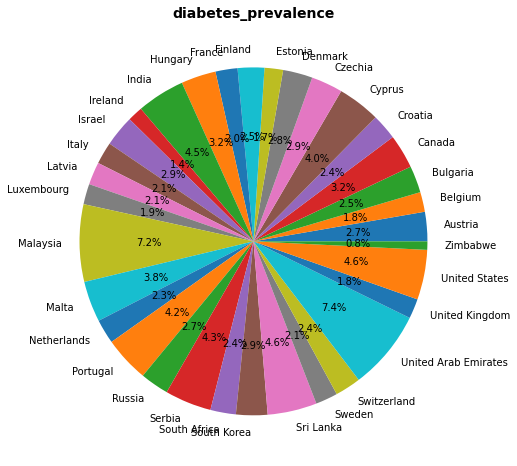

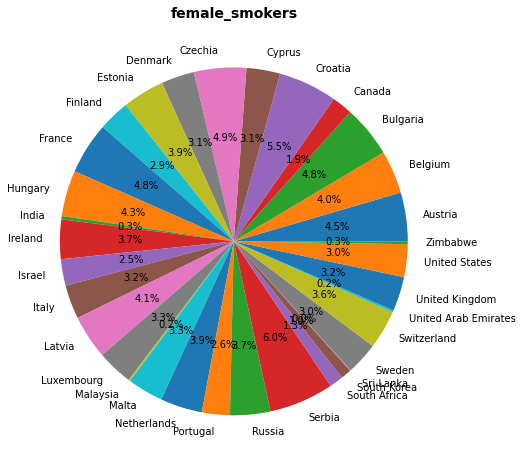

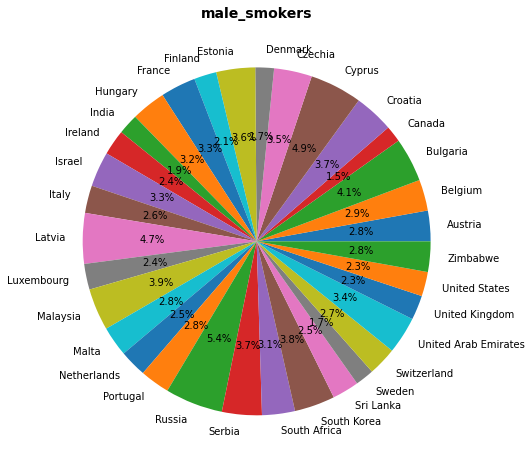

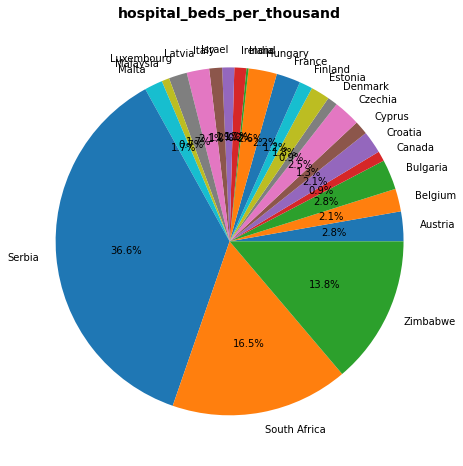

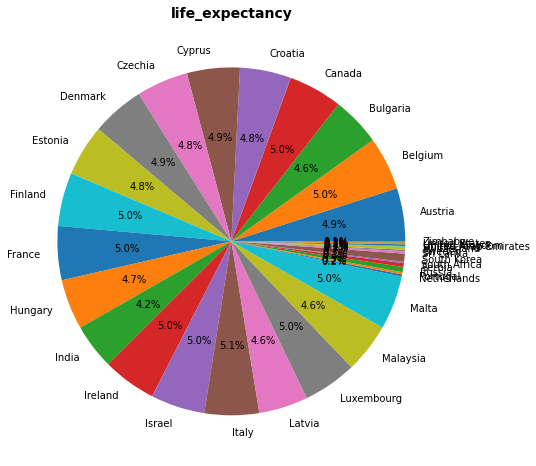

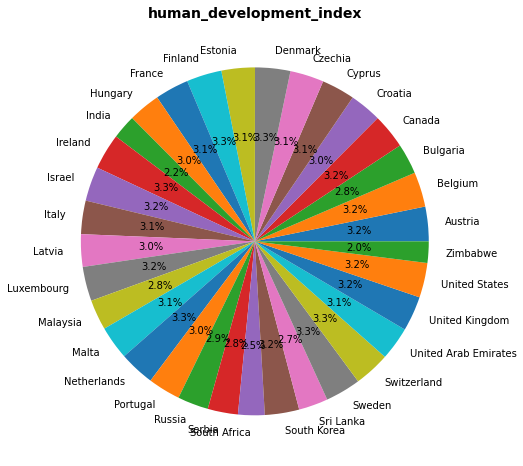

In [61]:
for var in ['population_density', 'median_age', 'aged_65_older', 'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']:
  plt.subplots(figsize=(10,8))
  idx = np.argwhere(np.array(df2['date'],ndmin=1)=='01/05/20')
  data,labels = [],[]
  for i in range(len(idx)):
    if(df2[var][idx[i][0]]<np.inf):
      data.append(df2[var][idx[i][0]])
      labels.append(df2['location'][idx[i][0]])
  plt.pie(data,labels=labels,autopct='%.1f%%')
  plt.title(f'{var}',fontweight='bold',size=14)
  plt.show()

#Descriptive Analysis

## Linechart

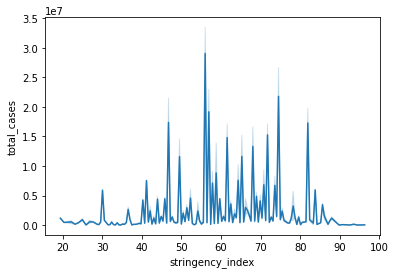

In [48]:
sns.lineplot(
    x=df2.stringency_index	, y=df2['total_cases']
)
plt.show()

stringency_index and total_cases are not linearly related as we would have expected.Lower stringency has lower number of cases as expected ,but the dip at the higher value is maybe due to herd immunity keeping other factor constant.

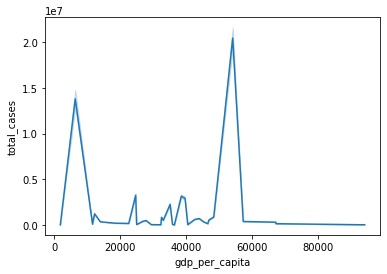

In [49]:
sns.lineplot(
    x=df2.gdp_per_capita	, y=df2['total_cases']
)
plt.show()

Increase in GDP should have decreased the number of cases but there is a peaks in countries like USA despite having high gdp

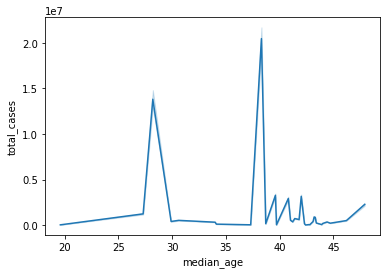

In [50]:
sns.lineplot(
    x=df2.median_age	, y=df2['total_cases']
)
plt.show()

People with age lying around the peaks have a greater covid  risk factor 

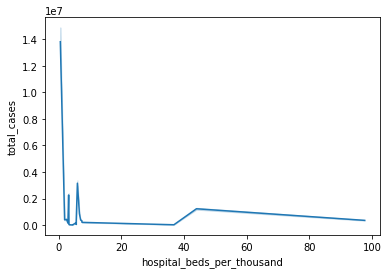

In [51]:
sns.lineplot(
    x=df2.hospital_beds_per_thousand	, y=df2['total_cases']
)
plt.show()

Number of deaths decrease with increase in number of hospital beds.

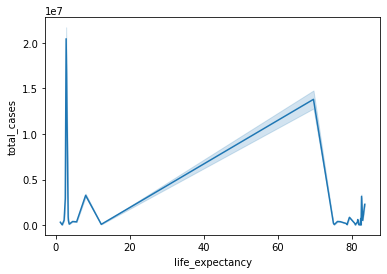

In [53]:
sns.lineplot(
    x=df2.life_expectancy	, y=df2['total_cases']
)
plt.show()

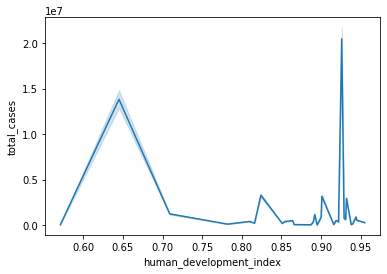

In [54]:
sns.lineplot(
    x=df2.human_development_index	, y=df2['total_cases']
)
plt.show()

Countries with lower HDI have greater risk of covid deaths than with higher HDI. For countries like USA despitebeing  high in HDI have high death rate due to other factors.

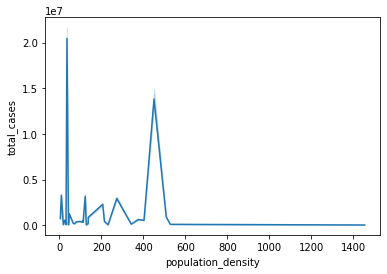

In [55]:
sns.lineplot(
    x=df2.population_density	, y=df2['total_cases']
)
plt.show()

Population density is below 600 for all the countries. Countries with higher or lower population are equally affected. 

##Double Bar graph

In [ ]:
data_smokers = df2[['location','female_smokers','male_smokers']]
data_smokers.set_index('location', inplace=True)
data_smokers['female_smokers'] = data_smokers['female_smokers'].astype(float)
data_smokers['male_smokers'] = data_smokers['male_smokers'].astype(float)

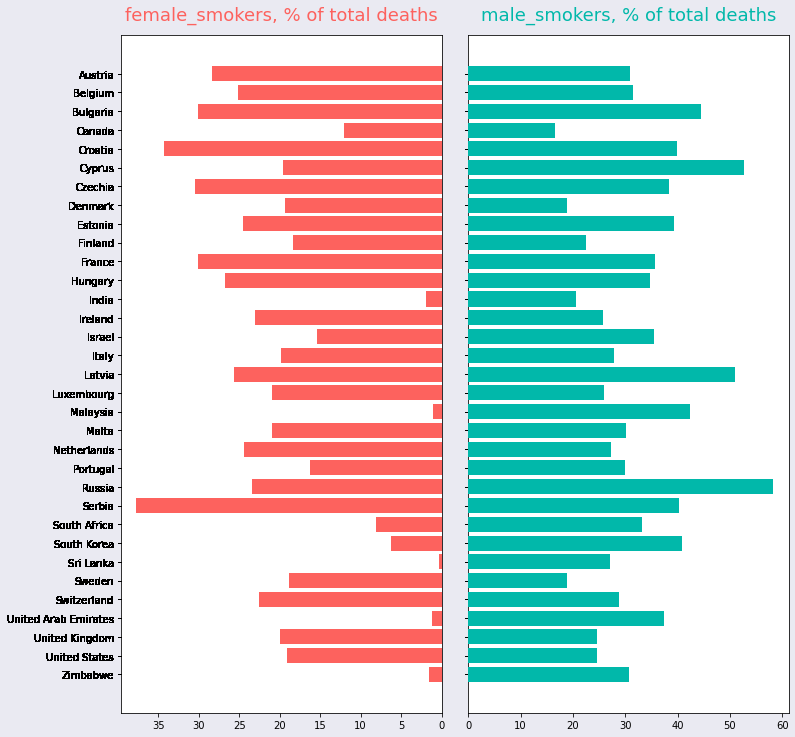

In [86]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = data_smokers.index
column0 = data_smokers['female_smokers']
column1 = data_smokers['male_smokers']
title0 = 'female_smokers, % of total deaths'
title1 = 'male_smokers, % of total deaths'
        
fig, axes = plt.subplots(figsize=(10,10), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

        
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
    
        
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()

        
axes[0].set(yticks=data_smokers.index, yticklabels=data_smokers.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black') # tick color

In general in countries like Russia,Zimbabwe , UAE etc percentage of male smokers is greater than that of female smokers in the total covid deaths.In Russia the percentage reaches a whooping 60 percentage pf total deaths.

##Bubble Plot

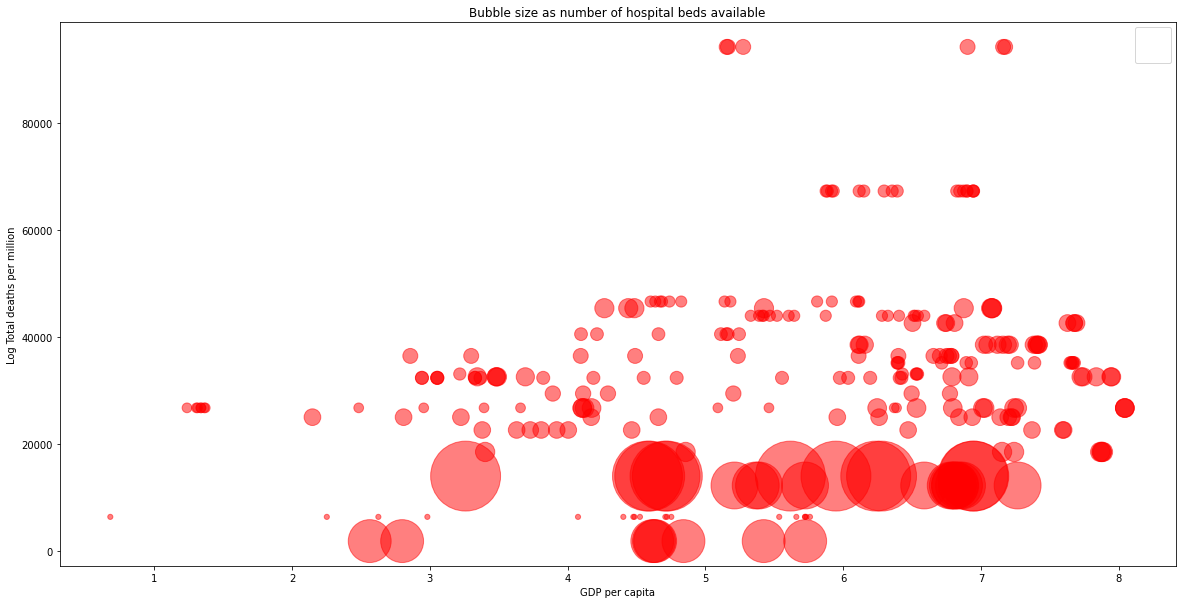

In [89]:
ax = plt.figure(figsize=(20,10))
df7 = df2.copy()
# dropping nan valued rows in HDI column
df7 = df7.dropna(subset=['gdp_per_capita'])
# randominzing dataset to pick some samples instead of using whole data
df7 = df7.reindex(np.random.permutation(df7.index))
# Picking 400 datapoints for better visualization
df7 = df7.iloc[:400,:].copy()
df7 = df7.reset_index(drop=True)

y = df7['gdp_per_capita']
# transforming poulation of log-population due to diverse data
x = np.log(df7['total_deaths_per_million'])
z = (df7['hospital_beds_per_thousand'])
# multiping z values(bubble sizes) for clear distiction
ax = plt.scatter(x, y, s = z*50, c="red",alpha=0.5)
plt.legend(*ax.legend_elements("sizes", num=5),ncol=3, frameon=True, 
handlelength=2, borderpad = 1.8,
handletextpad=1)
plt.xlabel('GDP per capita')
plt.ylabel('Log Total deaths per million')
plt.title('Bubble size as number of hospital beds available')
plt.show()

As the size of bubble increases(number of beds increases) there is a decrease in the Number of deaths.Some countries despite having high
Gdp have lower number of beds (the income is not distributed uniformly)


##Heatmap

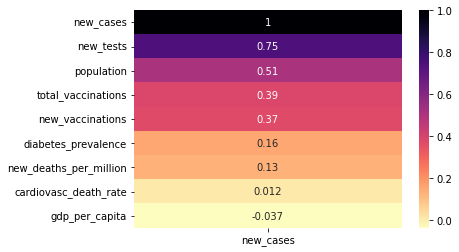

In [65]:
df6 = df2.copy()
df6 = df6[['new_cases','new_deaths_per_million','new_tests','new_vaccinations',
           'total_vaccinations','population',
           'gdp_per_capita','cardiovasc_death_rate','diabetes_prevalence']]
# checking correaltoins between df6 columns
subjective_corr = df6.corr()
# Selecting correlations of only units_sold column with others and sorting in decreasing order
sns.heatmap(subjective_corr[['new_cases']].sort_values(by=['new_cases'],ascending=False),
            cmap='magma_r',annot=True);

Single correlation function of new cases with other variables. All the variables are positively correlated except gdp that is gdp increase number of new cases decrease.  

##Log plot

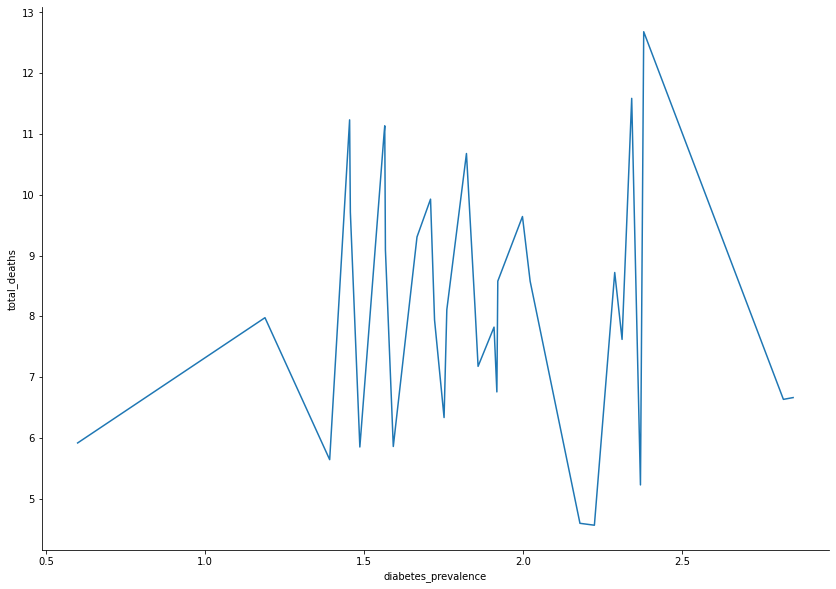

In [66]:
#Choosing two colors for two lines
palette = sns.cubehelix_palette(light=0.6, n_colors=2)
ax = sns.relplot(x=np.log(df2.diabetes_prevalence), y=np.log(df2.total_deaths),
             palette =palette,
            
            kind="line",height=8.27, aspect=11.7/8.27,ci=None)
plt.show()

Total deaths and diabetes are not linearly related

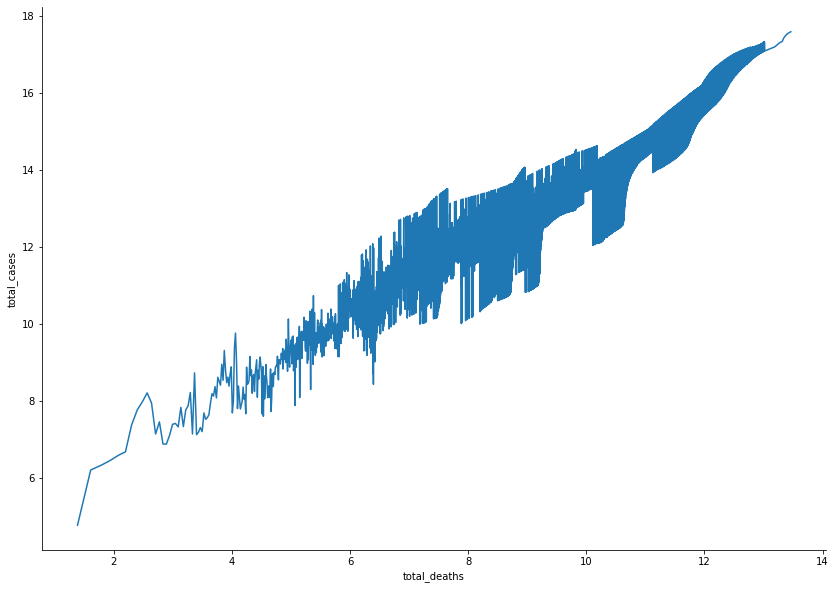

In [68]:
palette = sns.cubehelix_palette(light=0.6, n_colors=2)
ax = sns.relplot(x=np.log(df2.total_deaths), y=np.log(df2.total_cases),
             palette =palette,
            
            kind="line",height=8.27, aspect=11.7/8.27,ci=None)
plt.show()

Total deaths varies more or less linerly wih total_cases.

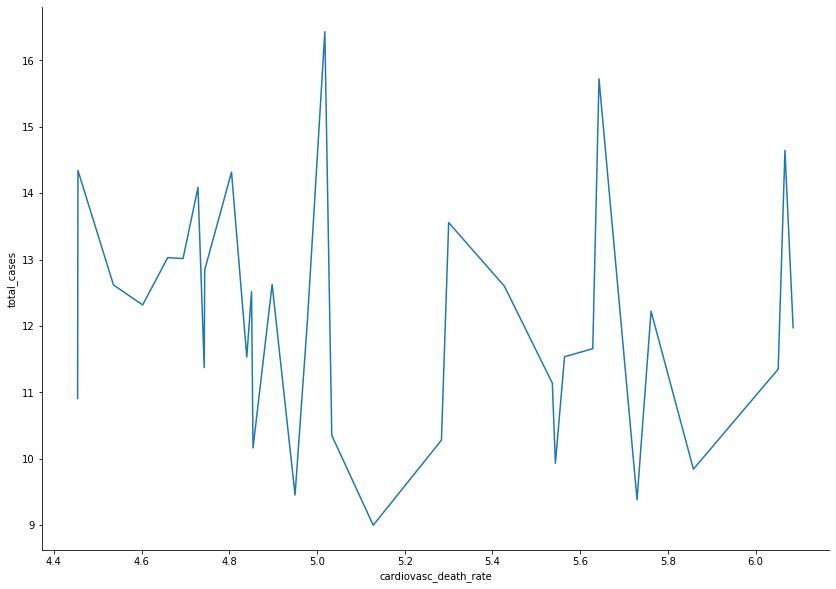

In [69]:
palette = sns.cubehelix_palette(light=0.6, n_colors=2)
# pLotting log plots for both as both are diverse data
ax = sns.relplot(x=np.log(df2.cardiovasc_death_rate), y=np.log(df2.total_cases),
             palette =palette,
            
            kind="line",height=8.27, aspect=11.7/8.27,ci=None)
plt.show()

Cardiovasc_death_rate are also not linealy related to each other.

##Heatmap

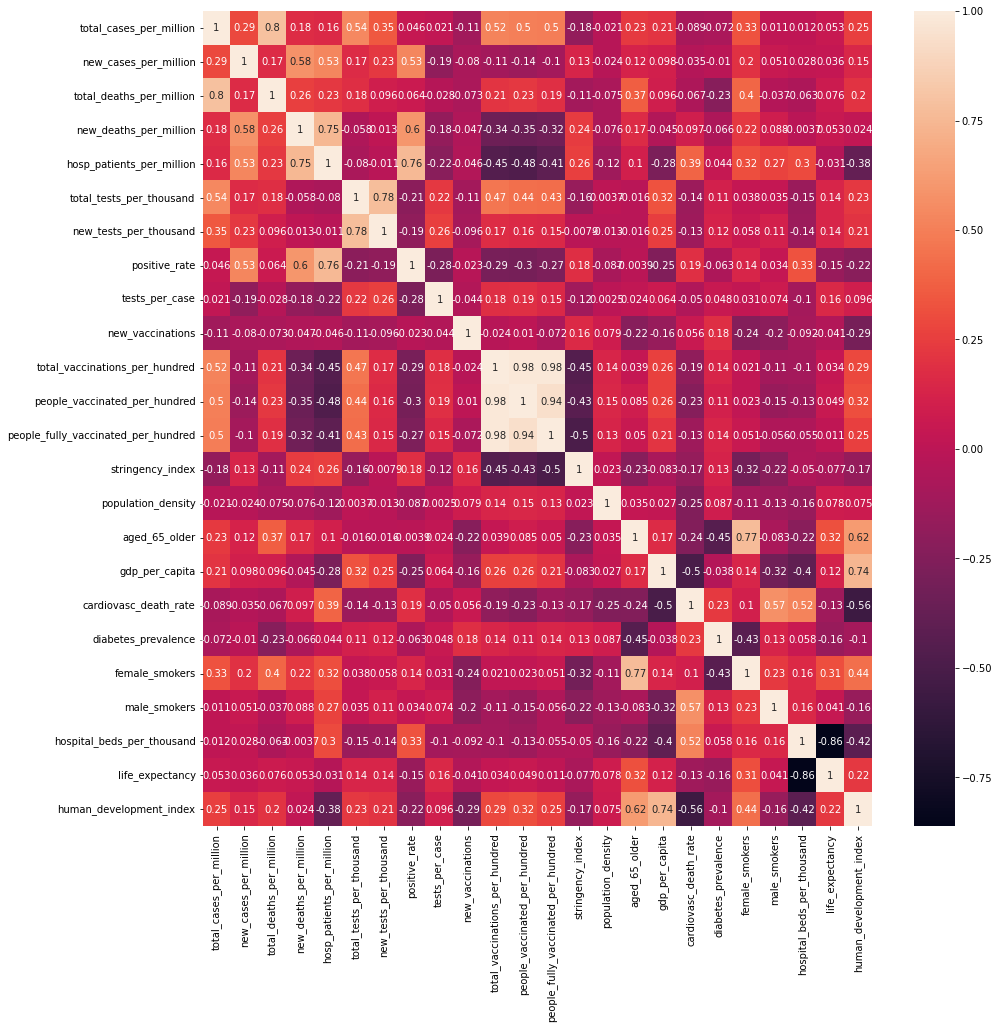

In [72]:
df3=df2.drop(columns=['iso_code','continent','location','date','total_cases','new_cases','total_deaths','new_deaths','hosp_patients','new_tests','total_tests','total_vaccinations','people_vaccinated','people_fully_vaccinated','population','median_age'])
plt.figure(figsize=(15,15))
sns.heatmap(df3.corr(),annot=True)

In [73]:
df4 = df2[['date', 'location', 'people_vaccinated_per_hundred', 'new_deaths','new_cases']].copy()
df4['new_cases'] = (df4['new_cases'] / 100).round(2)

##Lineplots with vaccination line

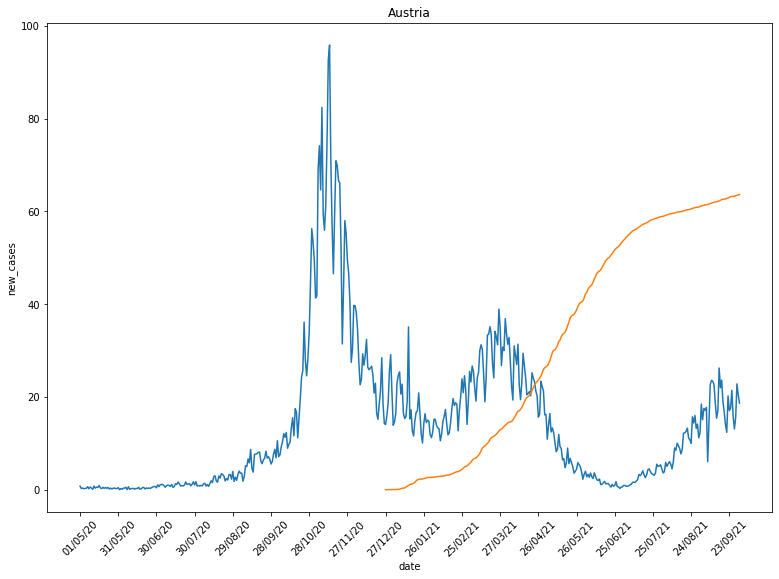

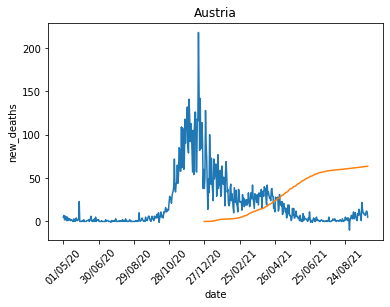

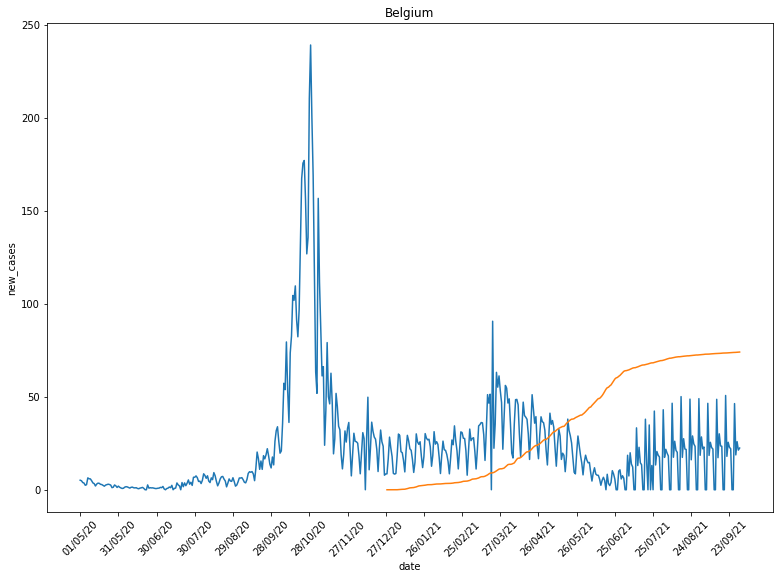

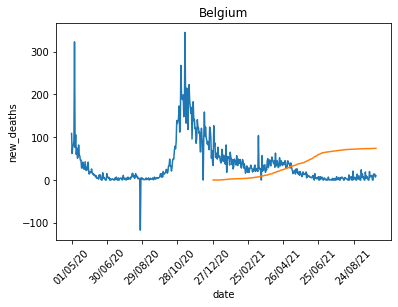

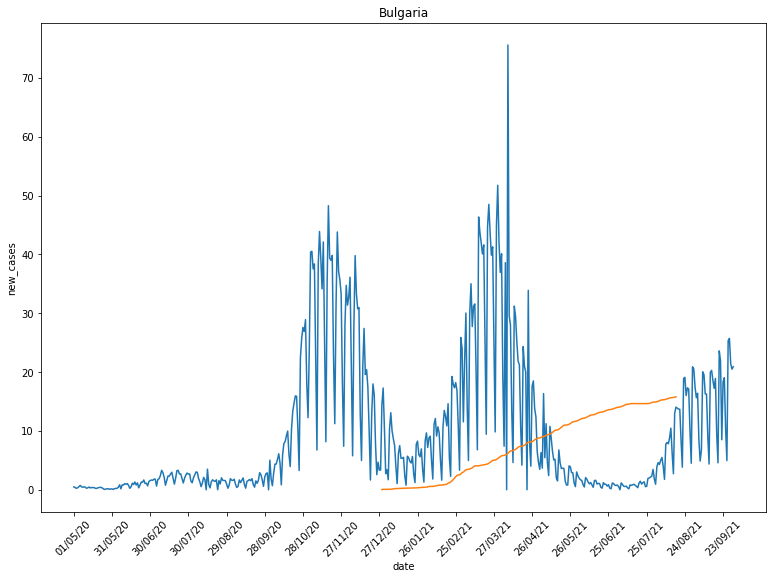

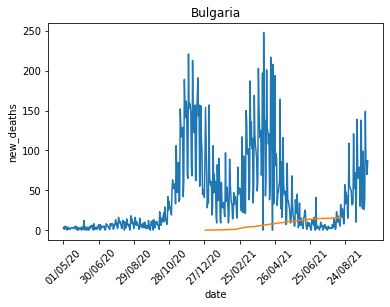

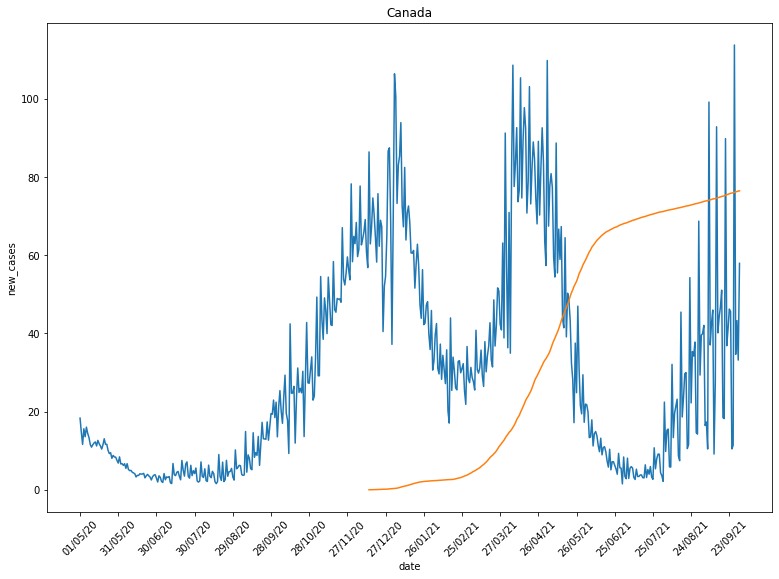

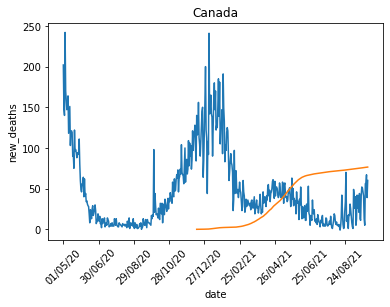

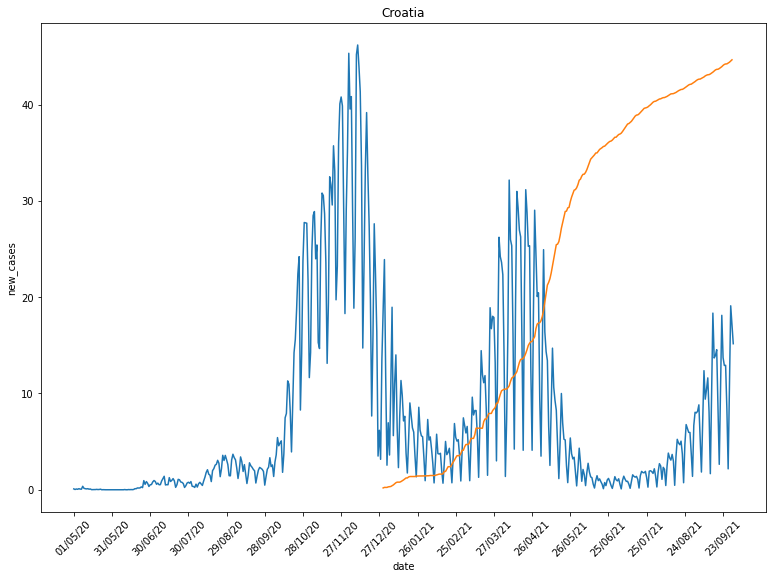

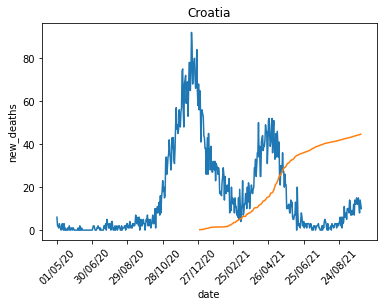

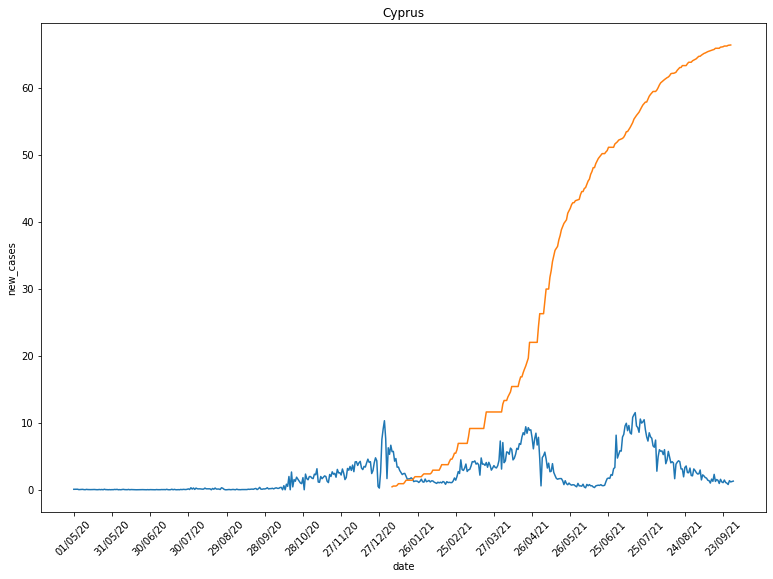

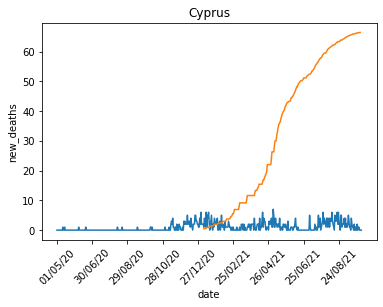

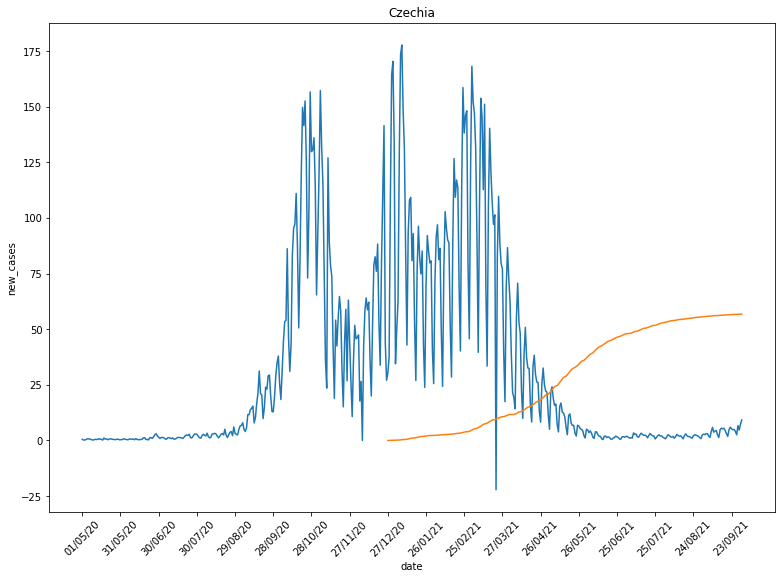

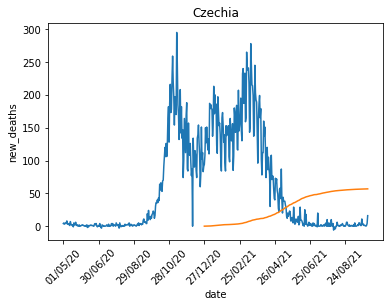

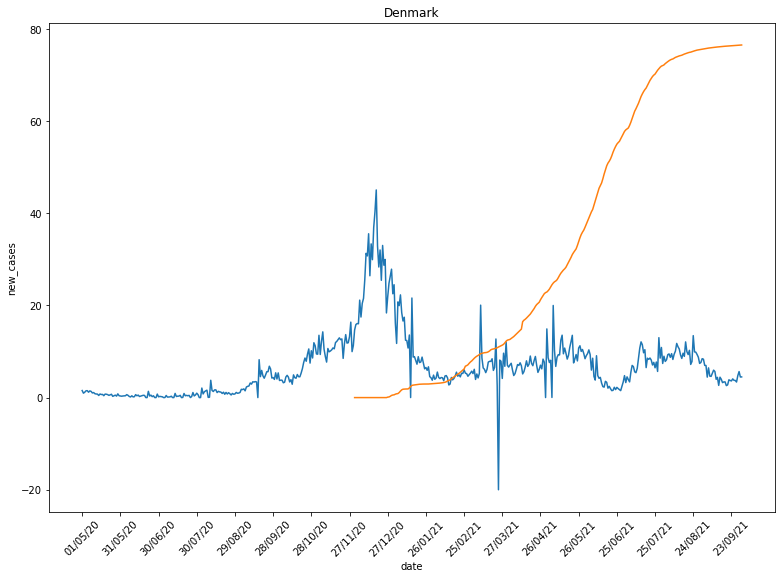

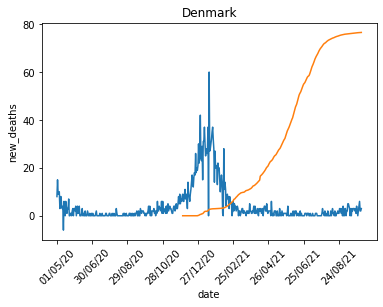

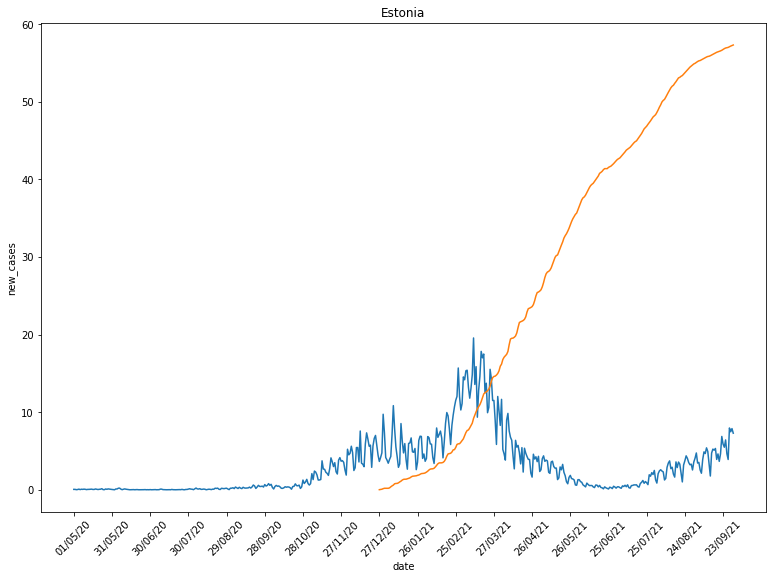

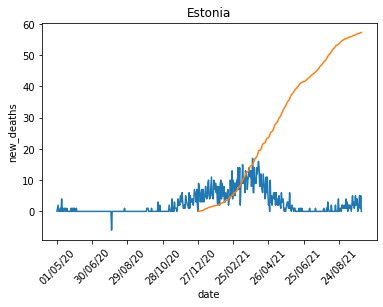

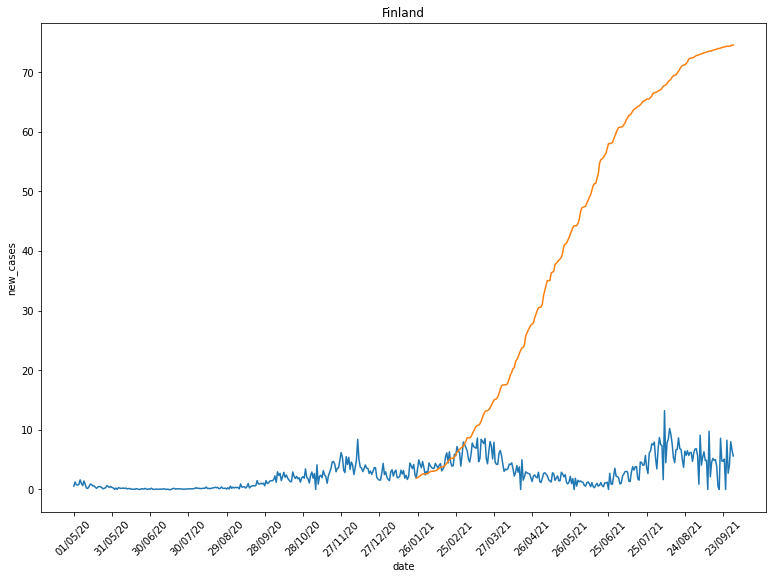

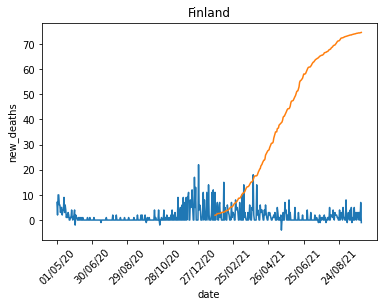

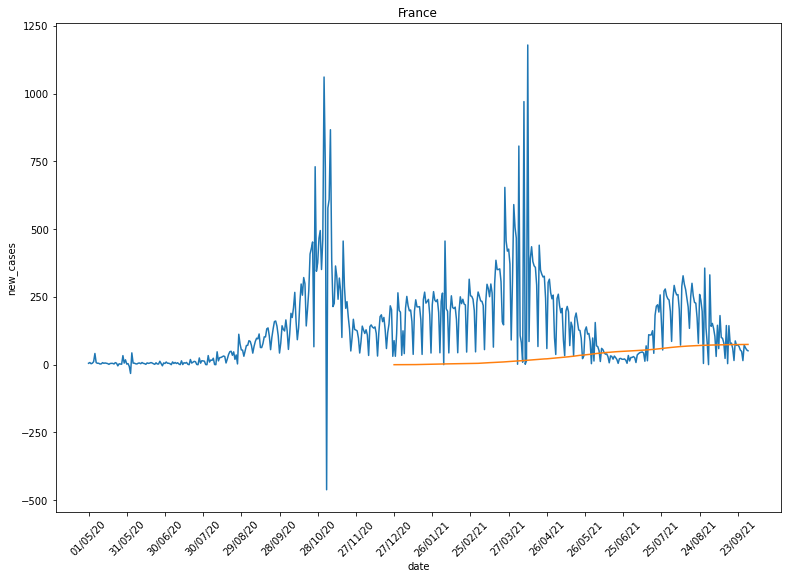

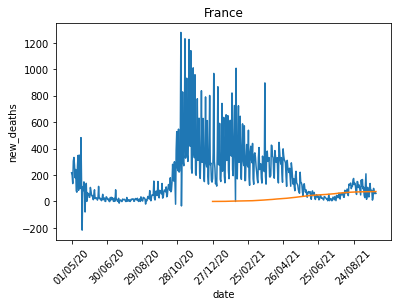

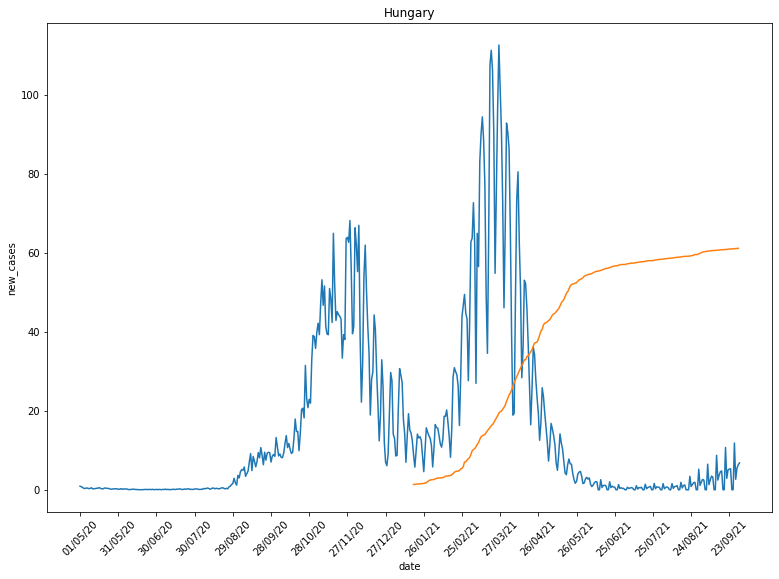

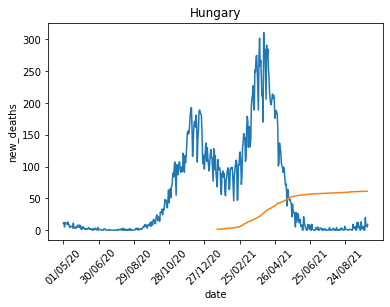

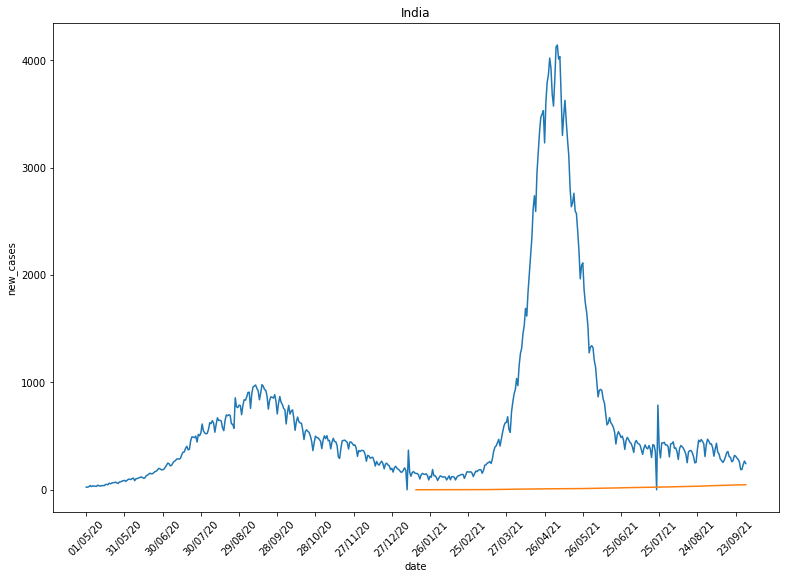

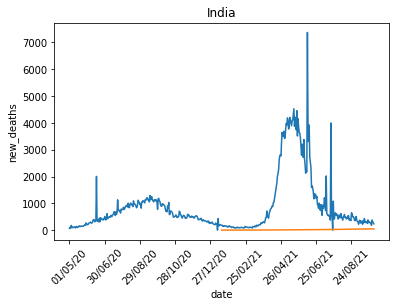

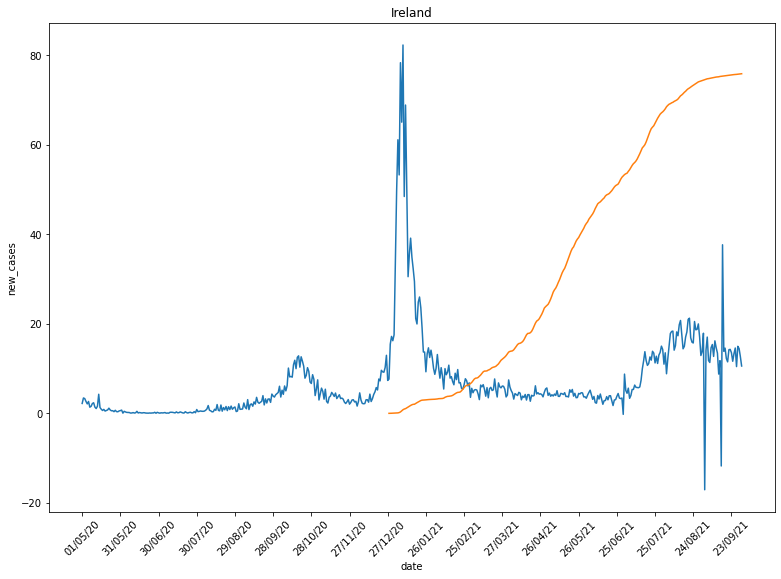

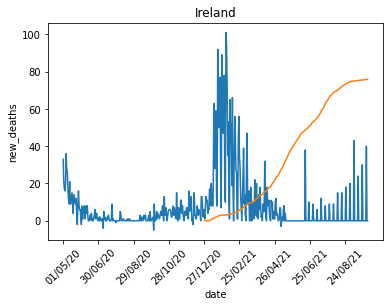

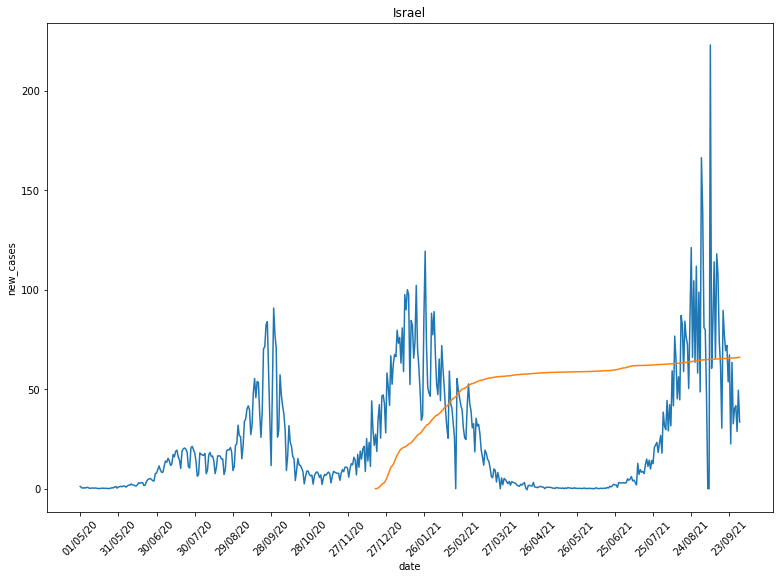

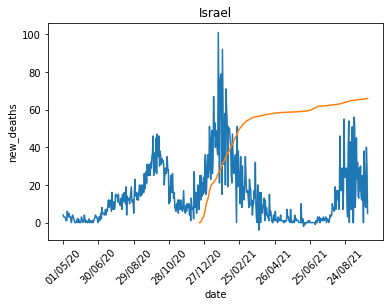

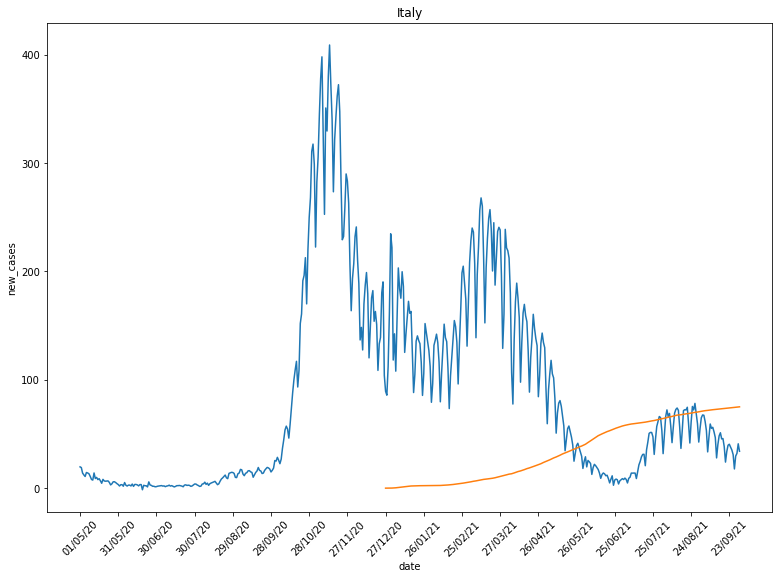

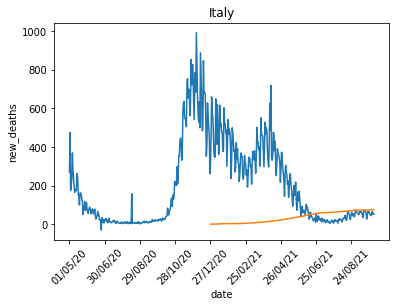

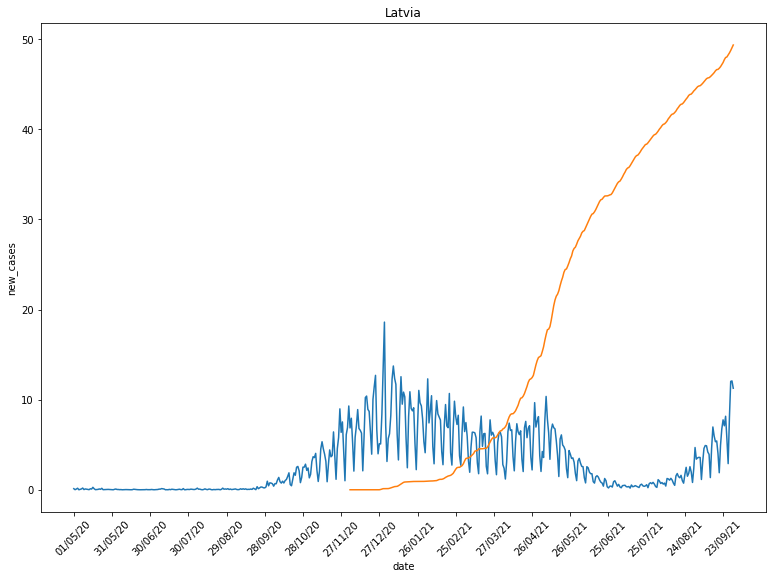

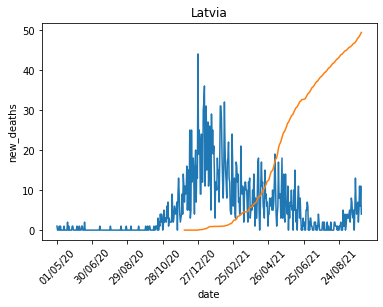

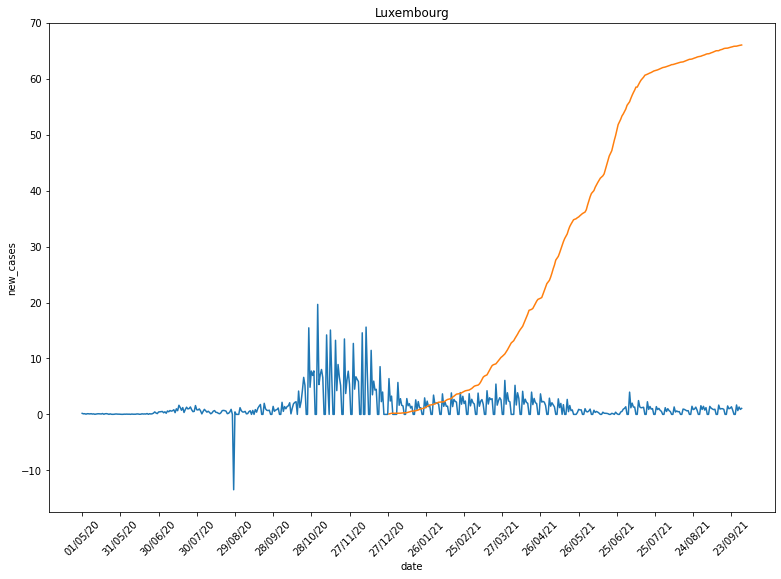

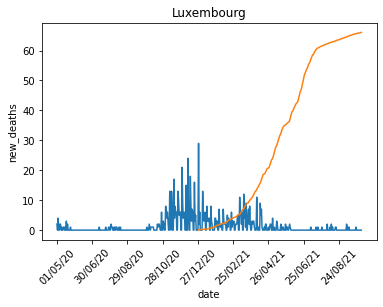

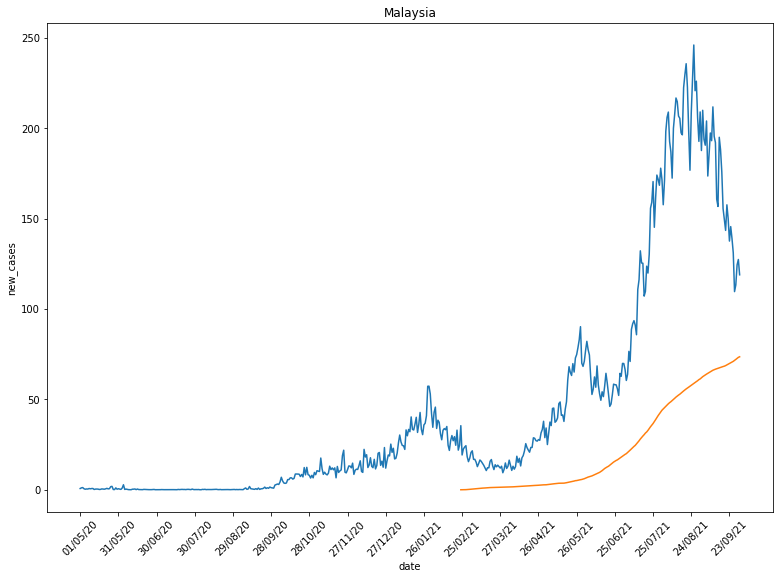

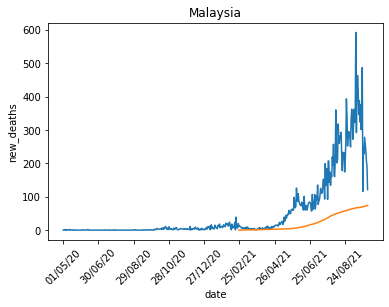

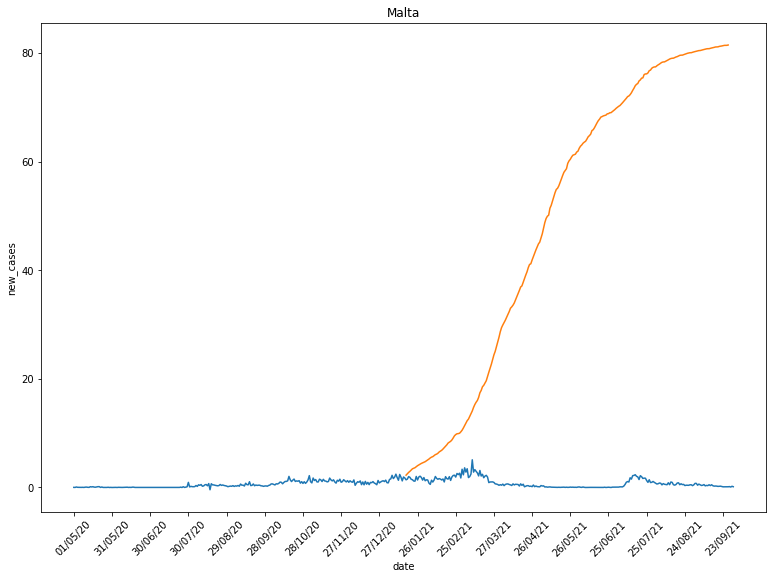

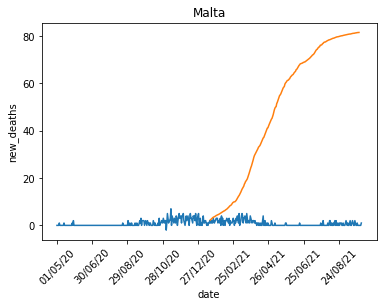

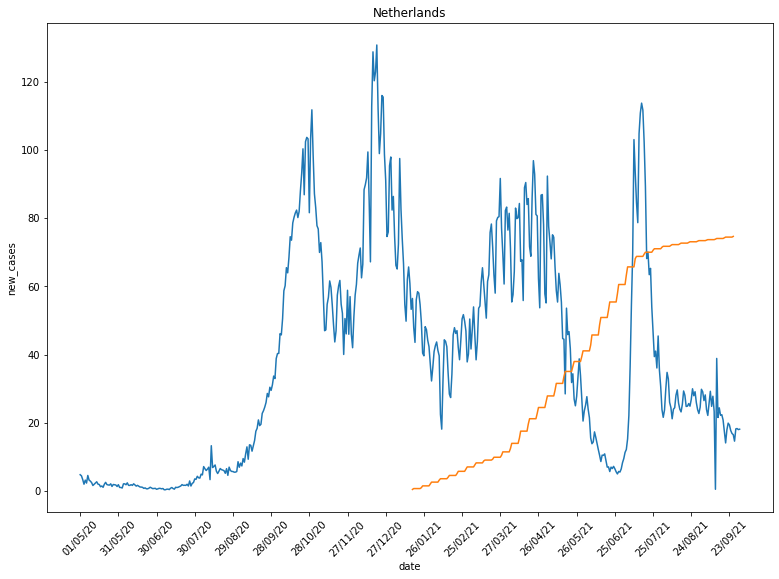

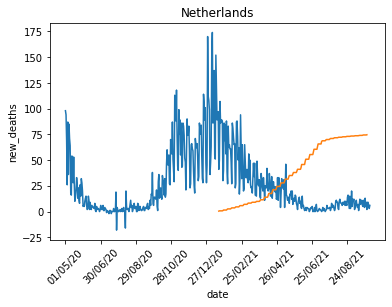

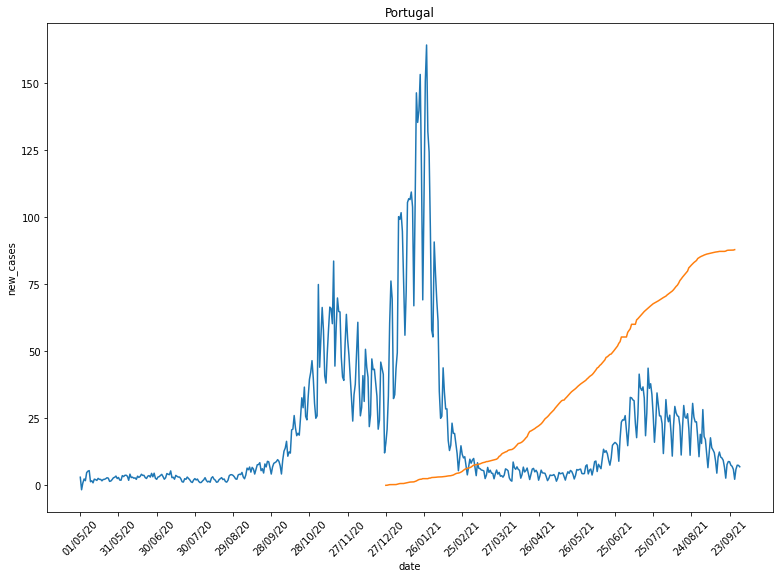

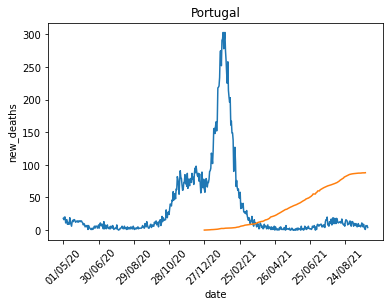

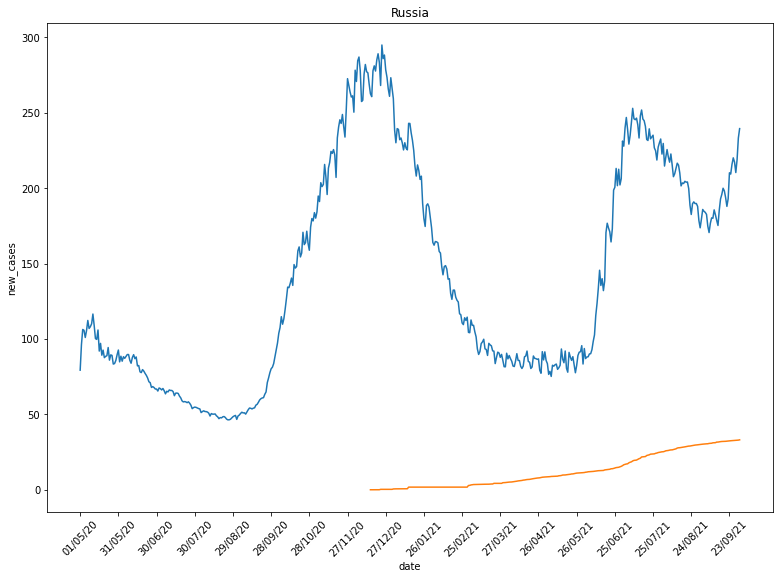

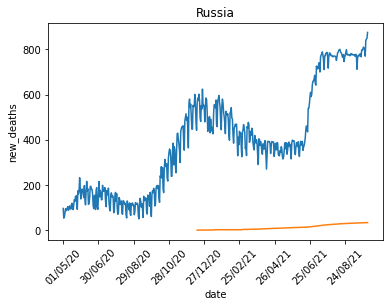

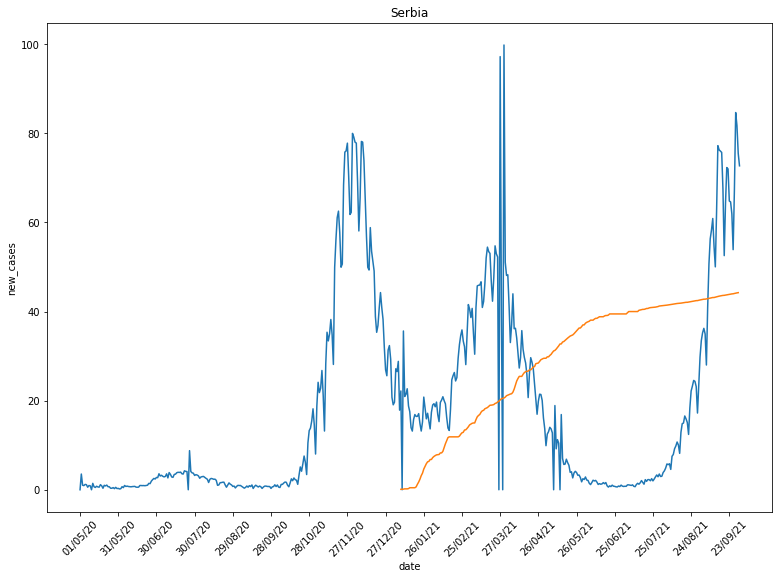

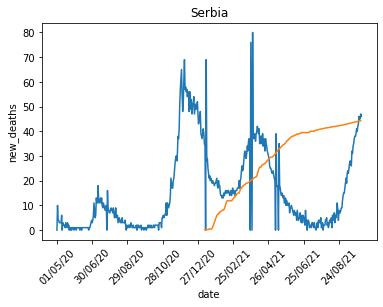

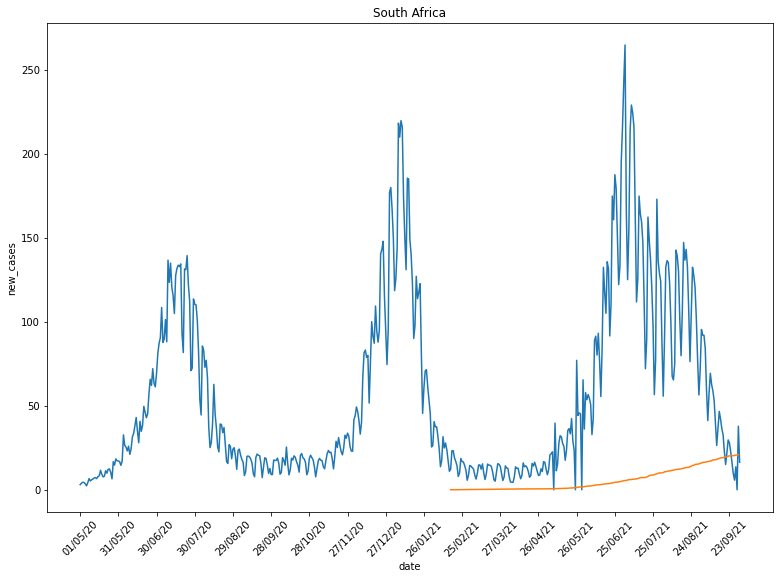

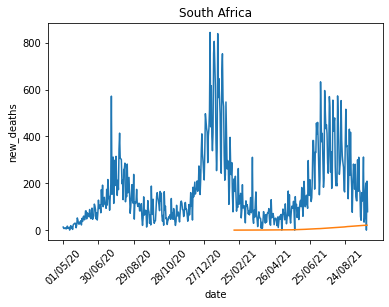

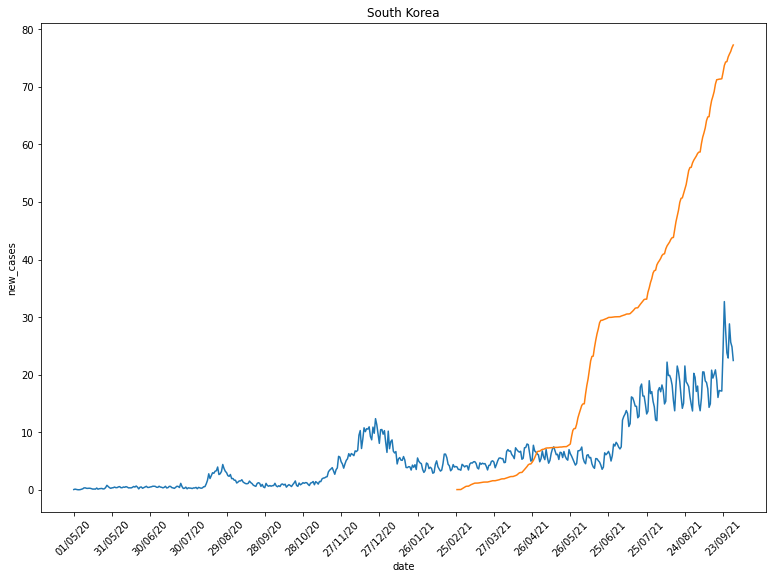

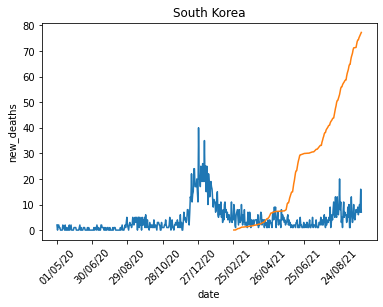

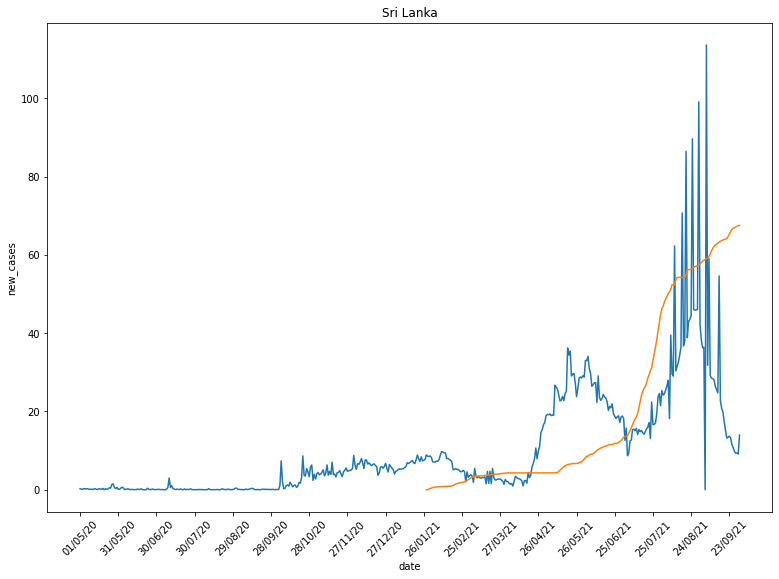

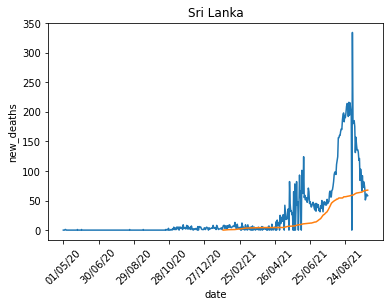

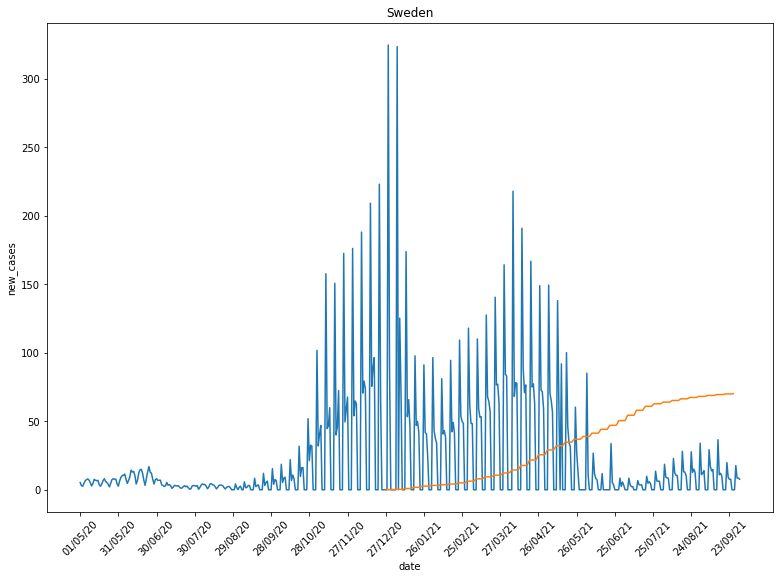

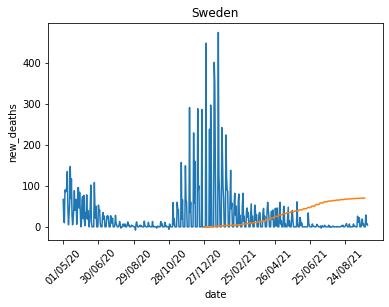

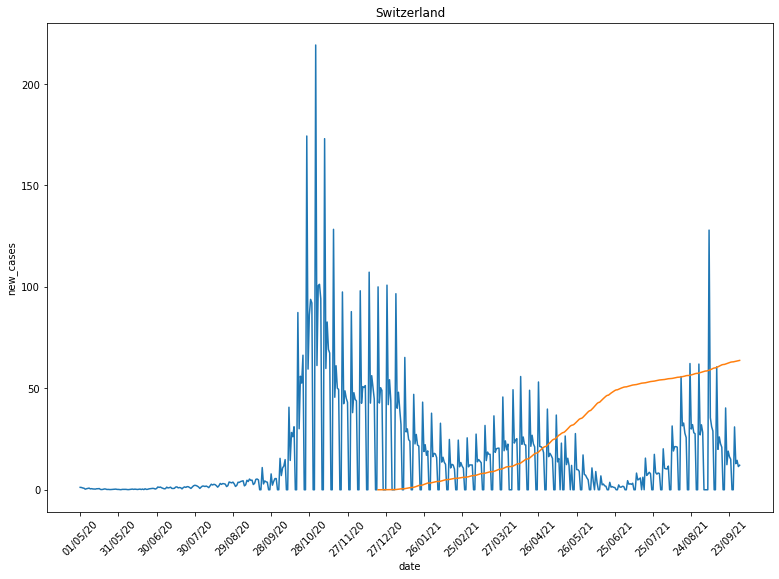

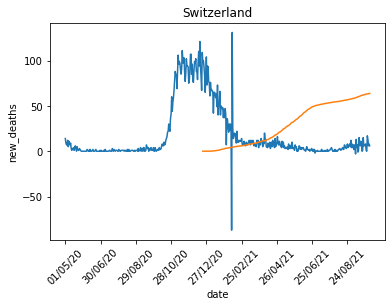

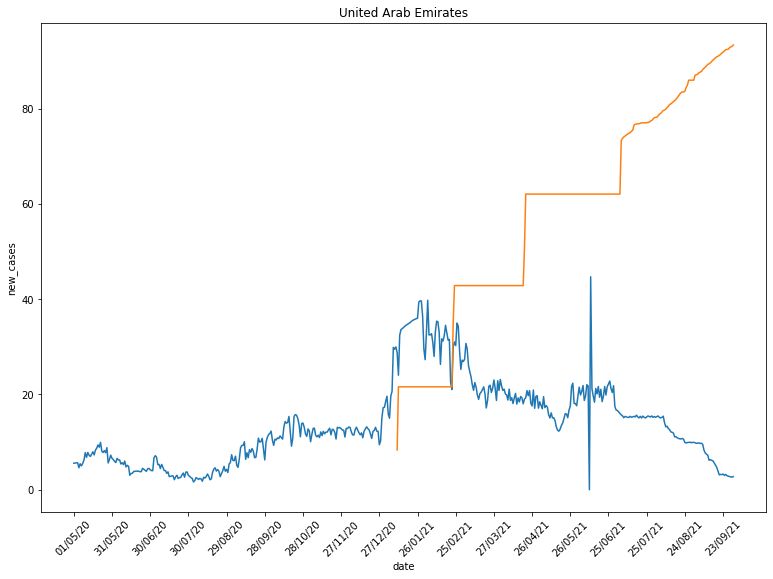

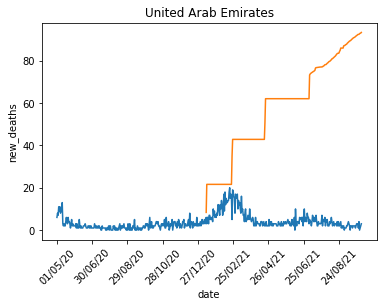

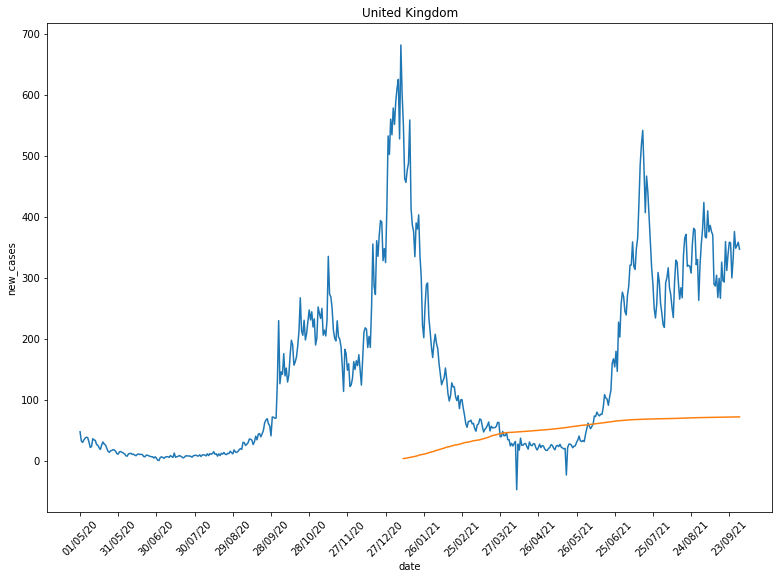

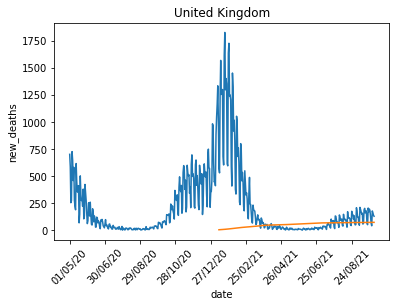

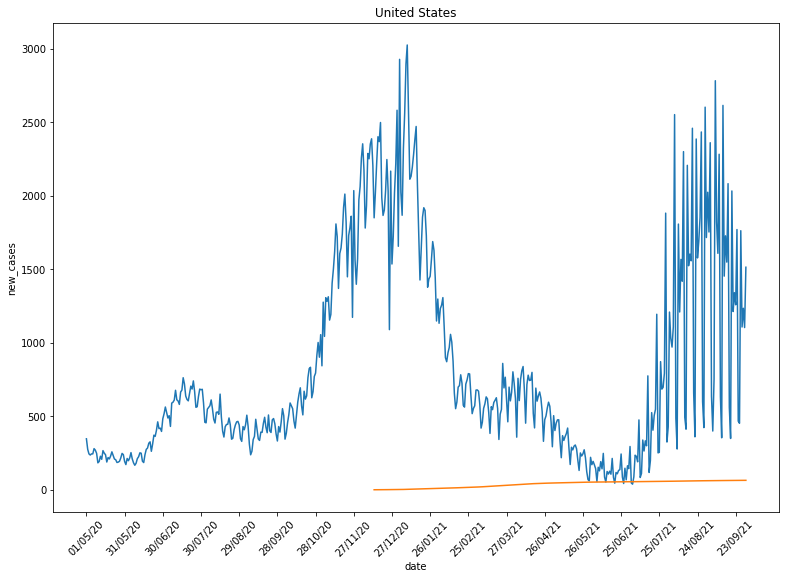

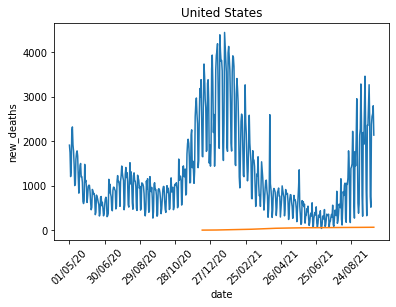

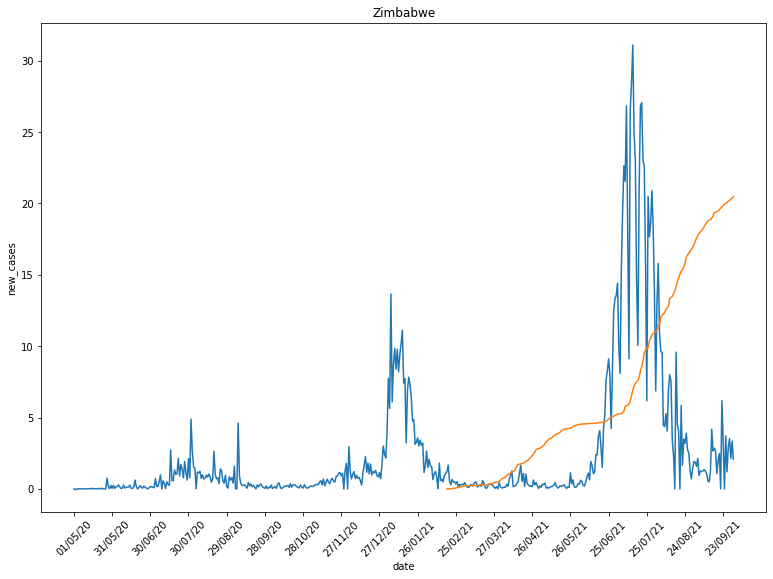

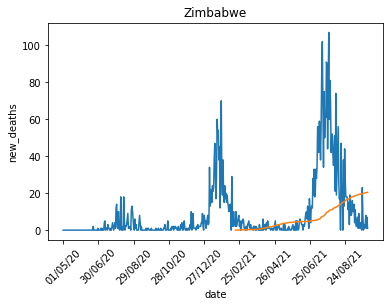

In [84]:
for location, df_location in df4.groupby('location'):
    df_location.reset_index(inplace=True)
    plt.figure(figsize=(13,9))
    sns.lineplot( x='date', y='new_cases', data=df_location).set(title=location)
    sns.lineplot( x='date', y='people_vaccinated_per_hundred', data=df_location).set(title=location)
    plt.xticks(df_location['date'][::30])
    plt.xticks(rotation=45)
    plt.show()
    sns.lineplot( x='date', y='new_deaths', data=df_location).set(title=location)
    sns.lineplot( x='date', y='people_vaccinated_per_hundred', data=df_location).set(title=location)
    plt.xticks(df_location['date'][::60])
    plt.xticks(rotation=45)
    plt.show()
   

The orange curve corresponds to people vaccinated per hundred.

In most of the countries, there is a decrease in the number of cases and the number of deaths as vaccination increases

#Predictive Analysis

In [75]:
ds=df2[['location','new_cases_per_million', 'people_vaccinated_per_hundred','hospital_beds_per_thousand','human_development_index', 'stringency_index','aged_65_older','male_smokers','female_smokers']].copy()
dss=ds.dropna()
dss.reset_index(inplace=True)
ds1=dss.drop(columns='index')
display(ds1)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     


location  new_cases_per_million  ...  male_smokers  female_smokers
0      Austria                155.699  ...          30.9            28.4
1      Austria                176.046  ...          30.9            28.4
2      Austria                206.567  ...          30.9            28.4
3      Austria                281.984  ...          30.9            28.4
4      Austria                322.125  ...          30.9            28.4
...        ...                    ...  ...           ...             ...
6143  Zimbabwe                 19.480  ...          30.7             1.6
6144  Zimbabwe                 23.390  ...          30.7             1.6
6145  Zimbabwe                 14.113  ...          30.7             1.6
6146  Zimbabwe                 22.197  ...          30.7             1.6
6147  Zimbabwe                 13.782  ...          30.7             1.6

[6148 rows x 9 columns]

In [76]:
features=ds1[['people_vaccinated_per_hundred','hospital_beds_per_thousand','human_development_index', 'stringency_index','aged_65_older','male_smokers','female_smokers']]
label=ds1[['new_cases_per_million']]
display(label)
display(features)

new_cases_per_million
0                   155.699
1                   176.046
2                   206.567
3                   281.984
4                   322.125
...                     ...
6143                 19.480
6144                 23.390
6145                 14.113
6146                 22.197
6147                 13.782

[6148 rows x 1 columns]

people_vaccinated_per_hundred  ...  female_smokers
0                              0.01  ...            28.4
1                              0.02  ...            28.4
2                              0.04  ...            28.4
3                              0.06  ...            28.4
4                              0.06  ...            28.4
...                             ...  ...             ...
6143                          20.15  ...             1.6
6144                          20.21  ...             1.6
6145                          20.29  ...             1.6
6146                          20.37  ...             1.6
6147                          20.46  ...             1.6

[6148 rows x 7 columns]

In [77]:
#splitting data into training, testing and validation
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=1)
features_test, features_val, label_test, label_val = train_test_split(features_test, label_test, test_size=0.5, random_state=1)

In [78]:
#I am going with forest regressor and Decision Tree, since it works well with large sample and small no. of features
from sklearn.model_selection import GridSearchCV
#gridsearch on the validation data to get best hyperparameters, basically it runs a loop for all different hyperparameters in range.
from sklearn.tree import DecisionTreeRegressor
param_grid={'criterion':['mse'],
           'max_depth':range(3,10),
           'min_samples_leaf':range(3,10),
           'min_samples_split':range(2,10)}
gr = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=5,n_jobs=-1) #5 fold cross validation, n_jobs=-1 means using all processors
gr.fit(features_val, label_val)
gr.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


{'criterion': 'mse',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [79]:
#fitting with best hyperparameter 
dtr=DecisionTreeRegressor(criterion='mse',max_depth=8,min_samples_leaf=3,min_samples_split=3)

In [80]:
#gridsearch on the validatiion data to get best hyperparameters
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,20,30,40,50],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5) #5 fold cross validation, n_jobs=-1 means using all processors
grid.fit(features_val, label_val)
grid.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [81]:
#fitting with best hyperparameter 
rfr=RandomForestRegressor(bootstrap= True, max_features= 'log2', min_samples_split= 2, n_estimators= 50)

In [82]:
#getting performance of each model on the validation data set with best hyperparameters and parameters
from sklearn.metrics import r2_score, mean_squared_error
def performance(framework):
    framework.fit(features_train,label_train)
    label_pred_val = framework.predict(features_val)
    val_rmse = np.sqrt(mean_squared_error(label_val,label_pred_val))
    val_r2 = r2_score(label_val,label_pred_val)
    print("R2 score:", val_r2)
    print("RMSE:", val_rmse)

print('Decision Tree:')
performance(dtr)
print('\n')
print('Random Forest:')
performance(rfr)

Decision Tree:
R2 score: 0.638451790687502
RMSE: 134.95896438495643


Random Forest:


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score: 0.7827060599473922
RMSE: 104.62667816740402


In [83]:
#applying the Random forest model on test data
rfr.fit(features_train,label_train)
label_pred_test = rfr.predict(features_test)
test_rmse = np.sqrt(mean_squared_error(label_test,label_pred_test))
test_r2 = r2_score(label_test,label_pred_test)
print("R2 score:", test_r2)
print("RMSE:", test_rmse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2 score: 0.7686529869819081
RMSE: 121.6065275895254
